In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context('paper')
metrics = ['dc', 'bc', 'cc', 'ec']

# Helper functions

In [3]:
def count_missing_values(df):
    #counting missing observations
    na_df = pd.DataFrame(df.isnull().sum())
    na_df.columns = ['missing_observations']

    na_df['percentage'] = (na_df.missing_observations / df.shape[0]).mul(100).round(2).astype(str)+'%'

    # formatting numeric values with commas
    na_df.missing_observations = na_df.missing_observations.map('{:,}'.format)
    na_df = pd.DataFrame(data=na_df)

    return na_df

# Erdos Renyi Models

In [4]:
path = "../results/ER.csv"
er_df = pd.read_csv(path)
er_df.head()

exp_name  sigma_mean  sigma_variance  uncertainty_mean  \
0  ER_100_0.1_0.1    1.273075        0.228167          4.211336   
1  ER_100_0.1_0.2    1.120781        0.046813          6.669549   
2  ER_100_0.1_0.3    1.158719        0.021449          8.614628   
3  ER_100_0.1_0.4    1.105674        0.009588         11.328204   
4  ER_100_0.1_0.5    1.065640        0.012902         10.883049   

   uncertainty_variance  dc_distance  dc_correlation  dc_mean_change  \
0              2.585826     0.012727        0.370969        0.120000   
1              6.630271     0.022828        0.751359        0.222880   
2              8.299001     0.033333        0.951143        0.340206   
3             12.213797     0.046869        1.000000        0.437736   
4             12.496255     0.048889        1.000000        0.526087   

   bc_distance  bc_correlation  bc_mean_change  cc_distance  cc_correlation  \
0     0.000911        0.033567        0.071453     0.018447       -0.045293   
1     0.001614        0.056406        0.129814     0.034655        0.165773   
2     0.002270        0.125773        0.175977     0.047883        0.209049   
3     0.002486        0.118452        0.206140     0.057177       -0.049781   
4     0.003170       -0.056754        0.238405     0.067808        0.126109   

   cc_mean_change  ec_distance  ec_correlation  ec_mean_change  
0        0.040107     0.002279       -0.077372        0.003874  
1        0.076463     0.001845        0.261194        0.003652  
2        0.107218     0.002814        0.326121        0.010384  
3        0.123995     0.001627        0.247345        0.003353  
4        0.155398     0.001954        0.077144        0.005548

In [5]:
er_df[['model', 'n', 'p', 'r']] = er_df.exp_name.str.split('_', expand=True)
er_df = er_df.drop(['exp_name', 'model'], axis=1)
er_df.head()

sigma_mean  sigma_variance  uncertainty_mean  uncertainty_variance  \
0    1.273075        0.228167          4.211336              2.585826   
1    1.120781        0.046813          6.669549              6.630271   
2    1.158719        0.021449          8.614628              8.299001   
3    1.105674        0.009588         11.328204             12.213797   
4    1.065640        0.012902         10.883049             12.496255   

   dc_distance  dc_correlation  dc_mean_change  bc_distance  bc_correlation  \
0     0.012727        0.370969        0.120000     0.000911        0.033567   
1     0.022828        0.751359        0.222880     0.001614        0.056406   
2     0.033333        0.951143        0.340206     0.002270        0.125773   
3     0.046869        1.000000        0.437736     0.002486        0.118452   
4     0.048889        1.000000        0.526087     0.003170       -0.056754   

   bc_mean_change  cc_distance  cc_correlation  cc_mean_change  ec_distance  \
0        0.071453     0.018447       -0.045293        0.040107     0.002279   
1        0.129814     0.034655        0.165773        0.076463     0.001845   
2        0.175977     0.047883        0.209049        0.107218     0.002814   
3        0.206140     0.057177       -0.049781        0.123995     0.001627   
4        0.238405     0.067808        0.126109        0.155398     0.001954   

   ec_correlation  ec_mean_change    n    p    r  
0       -0.077372        0.003874  100  0.1  0.1  
1        0.261194        0.003652  100  0.1  0.2  
2        0.326121        0.010384  100  0.1  0.3  
3        0.247345        0.003353  100  0.1  0.4  
4        0.077144        0.005548  100  0.1  0.5

In [6]:
er_df.n = er_df.n.astype(int)
er_df.p = er_df.p.astype(float)
er_df.r = er_df.r.astype(float)
er_df.bc_mean_change = er_df.bc_mean_change.astype(float)
er_df.dtypes

sigma_mean              float64
sigma_variance          float64
uncertainty_mean        float64
uncertainty_variance    float64
dc_distance             float64
dc_correlation          float64
dc_mean_change          float64
bc_distance             float64
bc_correlation          float64
bc_mean_change          float64
cc_distance             float64
cc_correlation          float64
cc_mean_change          float64
ec_distance             float64
ec_correlation          float64
ec_mean_change          float64
n                         int64
p                       float64
r                       float64
dtype: object

In [7]:
count_missing_values(er_df)

missing_observations percentage
sigma_mean                              0       0.0%
sigma_variance                          0       0.0%
uncertainty_mean                        0       0.0%
uncertainty_variance                    0       0.0%
dc_distance                             0       0.0%
dc_correlation                          0       0.0%
dc_mean_change                          0       0.0%
bc_distance                             0       0.0%
bc_correlation                          0       0.0%
bc_mean_change                        100      10.0%
cc_distance                             0       0.0%
cc_correlation                          0       0.0%
cc_mean_change                          0       0.0%
ec_distance                             0       0.0%
ec_correlation                          0       0.0%
ec_mean_change                          0       0.0%
n                                       0       0.0%
p                                       0       0.0%
r                                       0       0.0%

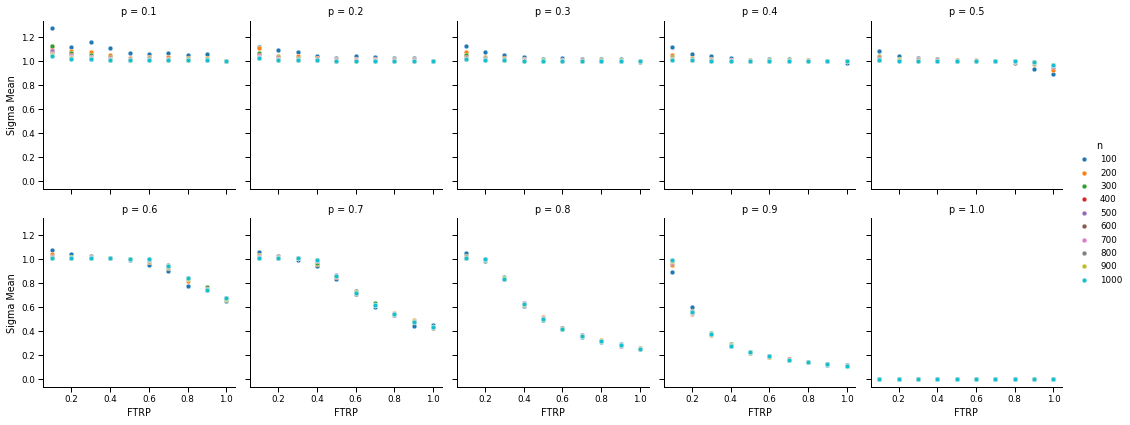

In [8]:
# SIGMA MEAN
g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "sigma_mean")
g.set_axis_labels("FTRP", "Sigma Mean")
g.add_legend()
plt.savefig('images/er/sigma_mean.pdf', dpi=300, transparent=False);

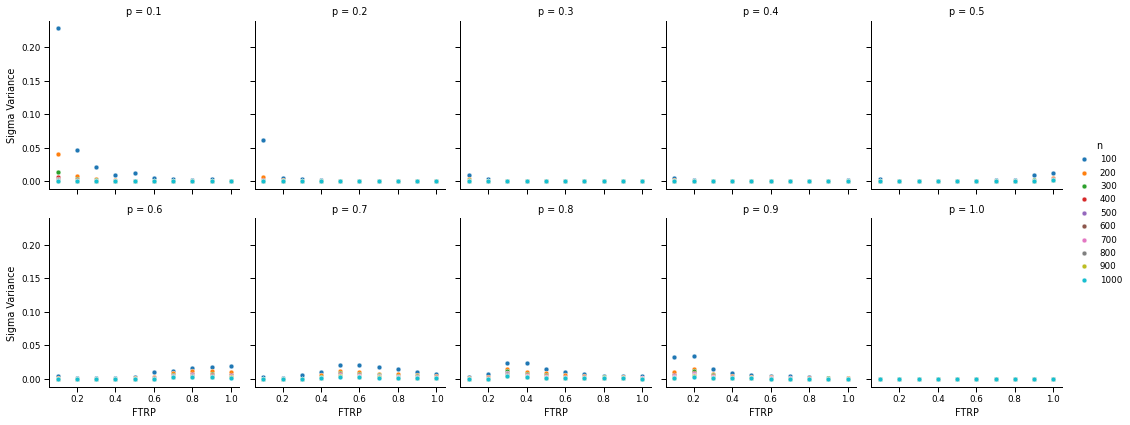

In [9]:
# SIGMA VARIANCE
g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "sigma_variance")
g.set_axis_labels("FTRP", "Sigma Variance")
g.add_legend()
plt.savefig('images/er/sigma_variance.pdf', dpi=300, transparent=False);

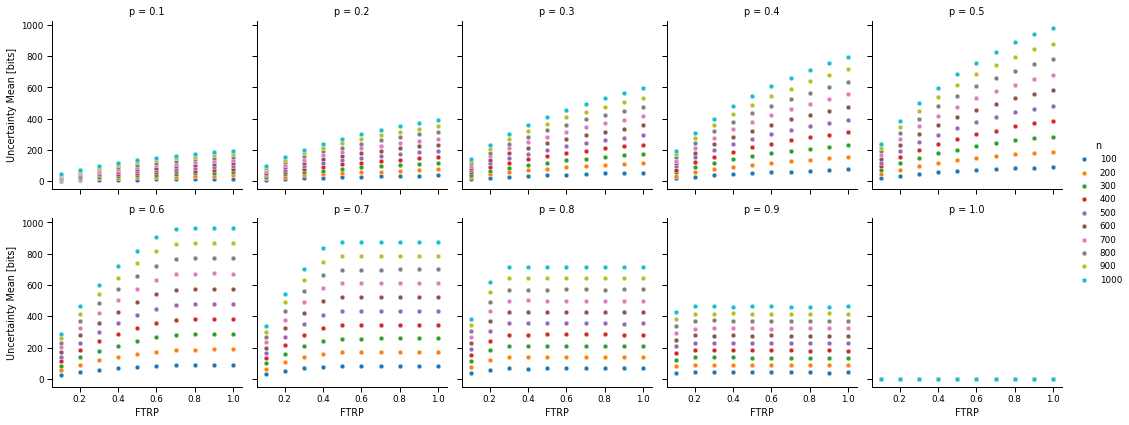

In [10]:
# UNCERTAINTY MEAN
g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "uncertainty_mean")
g.set_axis_labels("FTRP", "Uncertainty Mean [bits]")
g.add_legend()
plt.savefig('images/er/uncertainty_mean.pdf', dpi=300, transparent=False);

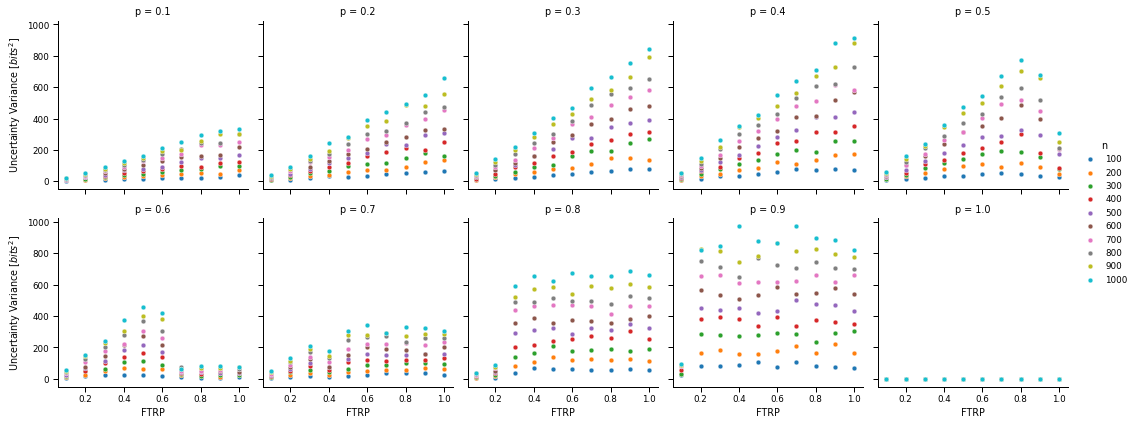

In [11]:
# UNCERTAINTY VARIANCE
g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "uncertainty_variance")
g.set_axis_labels("FTRP", r"Uncertainty Variance [$bits^2$]")
g.add_legend()
plt.savefig('images/er/uncertainty_variance.pdf', dpi=300, transparent=False);

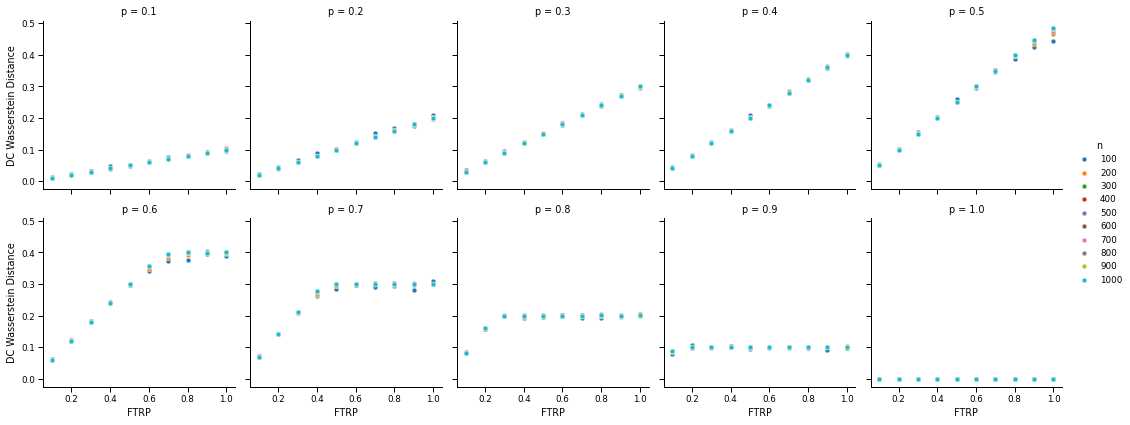

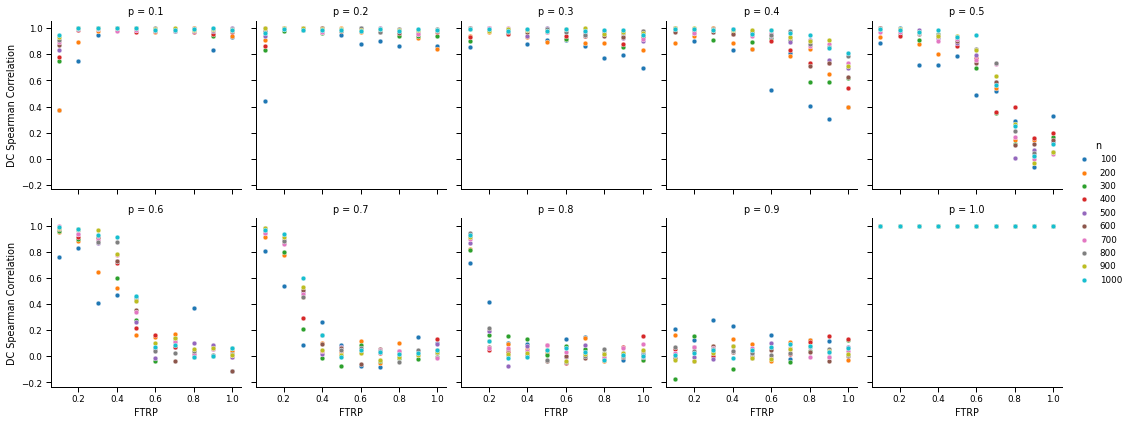

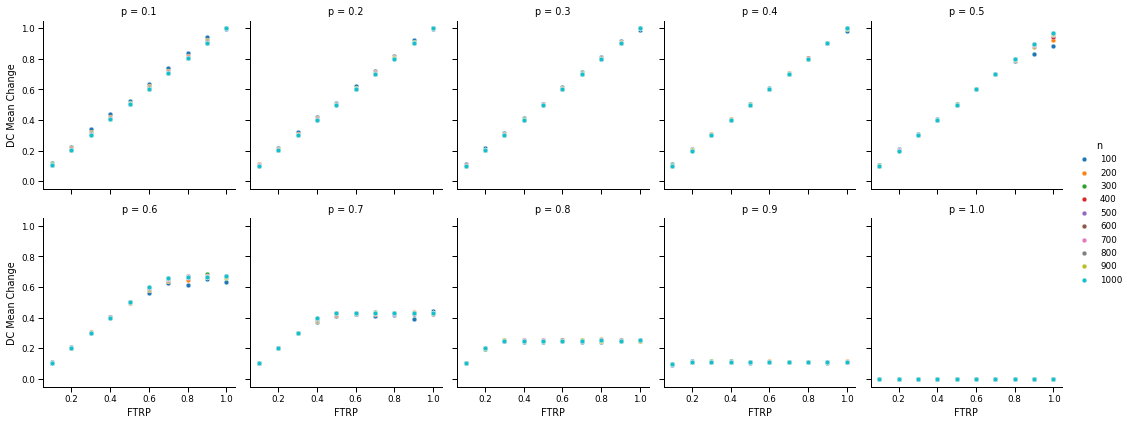

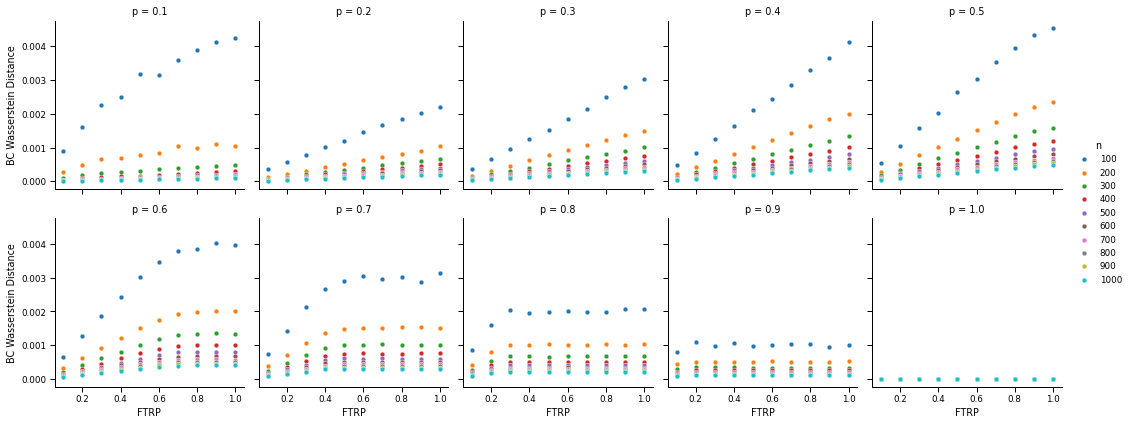

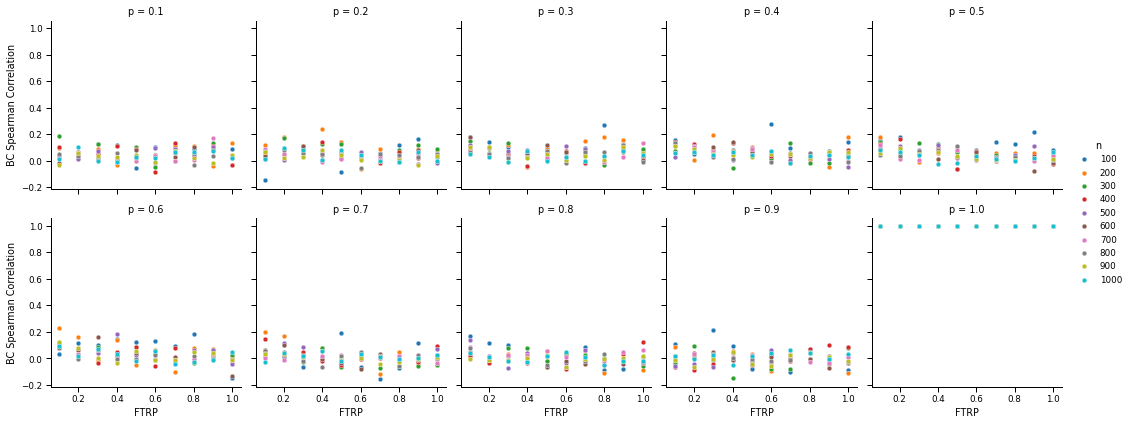

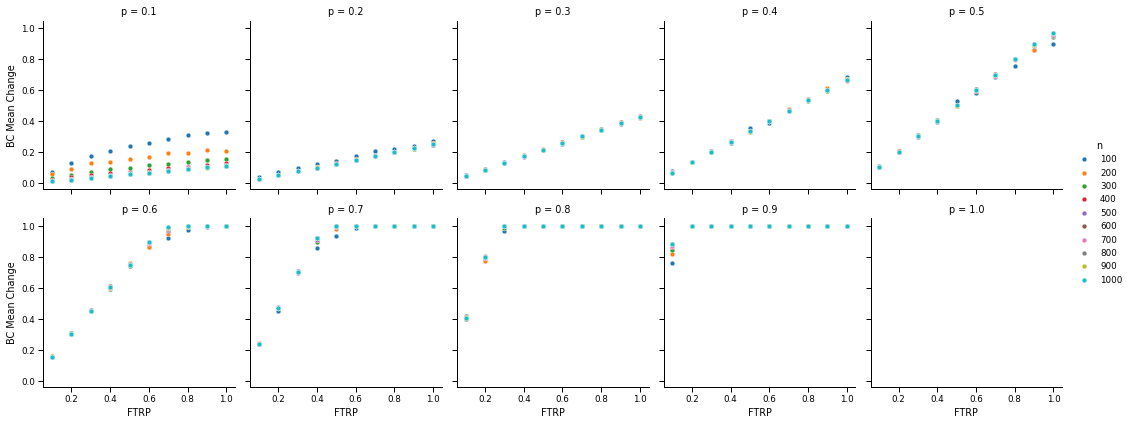

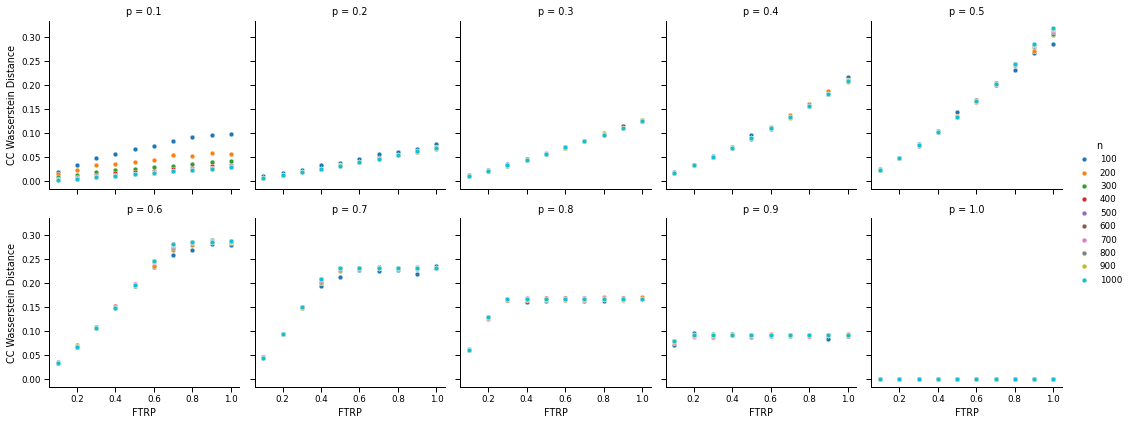

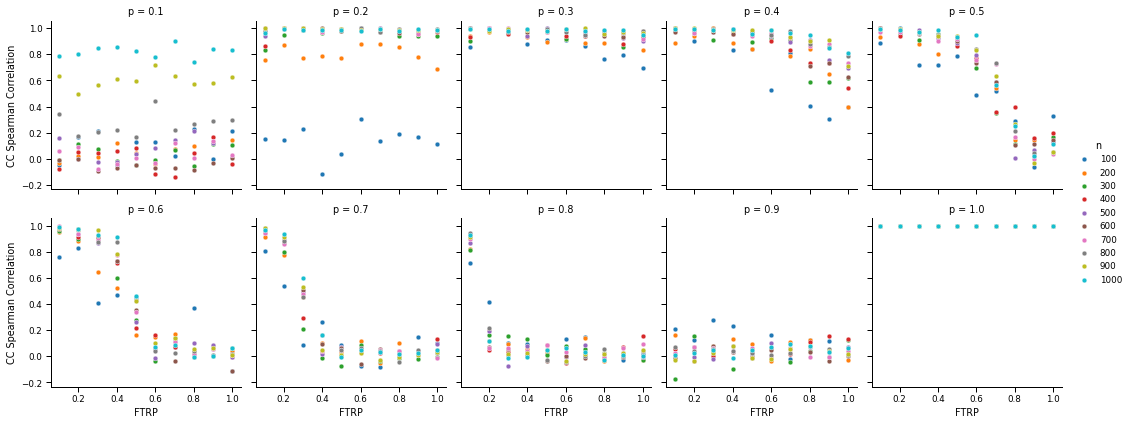

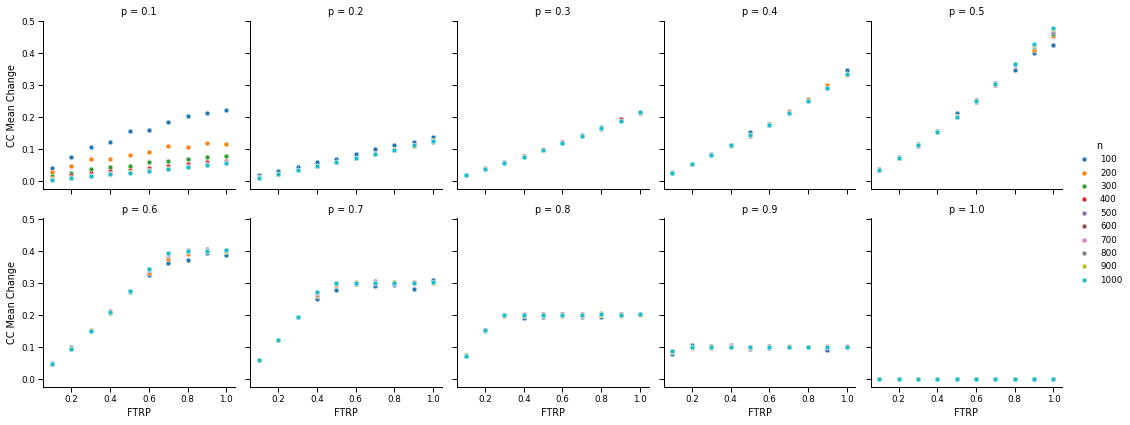

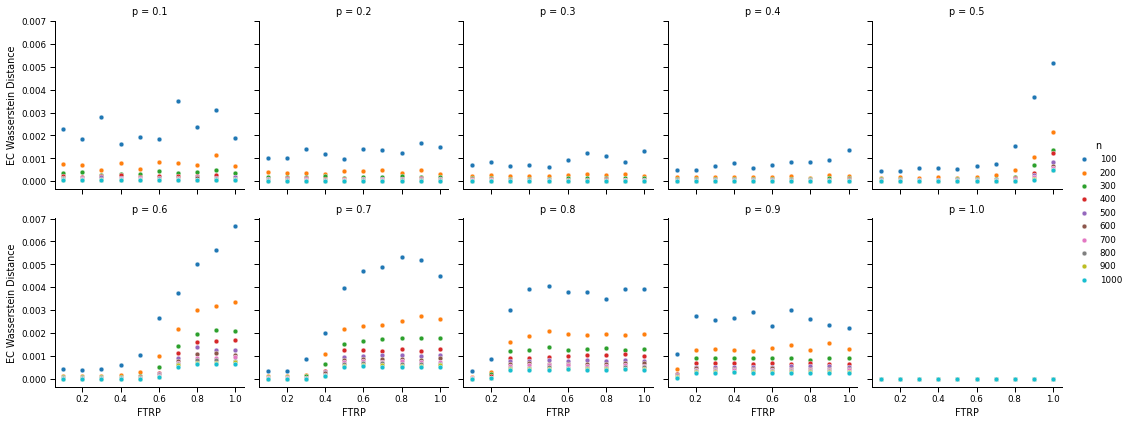

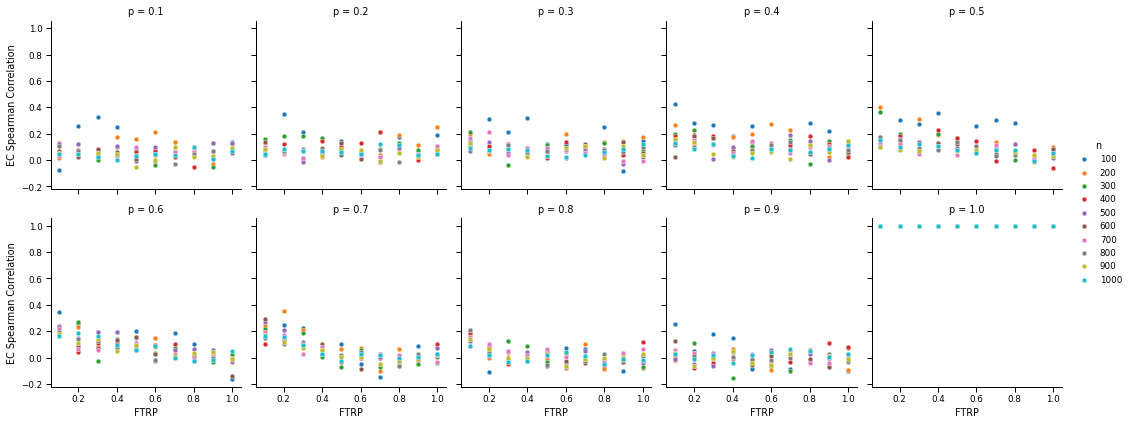

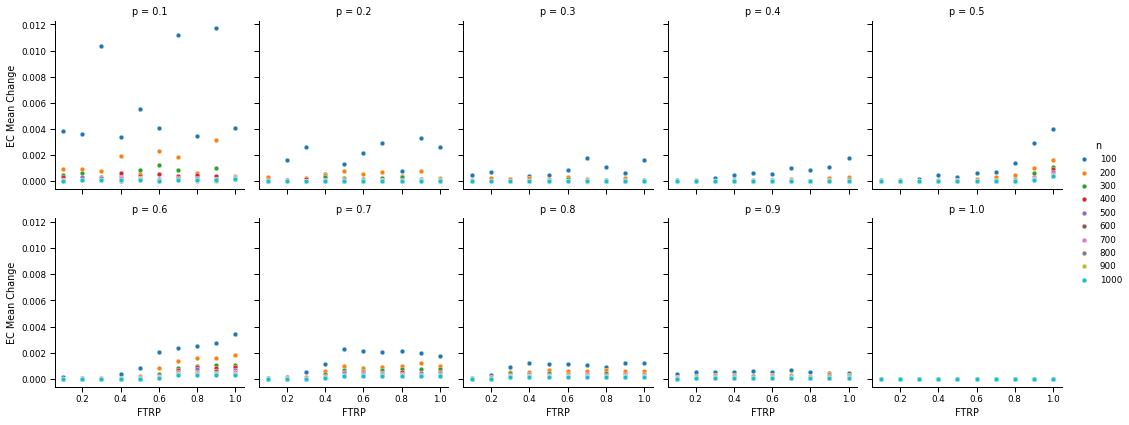

In [12]:
for metric in metrics:

    # Wasserstein distance
    g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
    g.map(sns.scatterplot, "r", f"{metric}_distance")
    g.set_axis_labels("FTRP", f"{metric.upper()} Wasserstein Distance")
    g.add_legend()
    plt.savefig(f'images/er/{metric}_distance.pdf', dpi=300, transparent=False)

    # Spearman Rank correlation
    g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
    g.map(sns.scatterplot, "r", f"{metric}_correlation")
    g.set_axis_labels("FTRP", f"{metric.upper()} Spearman Correlation")
    g.add_legend()
    plt.savefig(f'images/er/{metric}_correlation.pdf', dpi=300, transparent=False)

    # Mean change
    g = sns.FacetGrid(er_df, col='p', hue="n", col_wrap=5)
    g.map(sns.scatterplot, "r", f"{metric}_mean_change")
    g.set_axis_labels("FTRP", f"{metric.upper()} Mean Change")
    g.add_legend()
    plt.savefig(f'images/er/{metric}_mean_change.pdf', dpi=300, transparent=False)

# Watts Strogatz

In [13]:
path = "../results/WS.csv"
ws_df = pd.read_csv(path)
ws_df.head()

exp_name  sigma_mean  sigma_variance  uncertainty_mean  \
0  WS_100_0.1_0.1_0.1    1.130166        0.086915          3.832549   
1  WS_100_0.1_0.1_0.2    1.114291        0.032935          6.562788   
2  WS_100_0.1_0.1_0.3    1.065758        0.017528          8.521728   
3  WS_100_0.1_0.1_0.4    1.041813        0.020806         10.195630   
4  WS_100_0.1_0.1_0.5    1.020677        0.007917         11.686307   

   uncertainty_variance  dc_distance  dc_correlation  dc_mean_change  \
0              1.280084     0.011515        0.850333           0.114   
1              1.676131     0.022626        0.782730           0.224   
2              1.739747     0.032323        0.689229           0.320   
3              2.261177     0.042020        0.579298           0.416   
4              1.856238     0.051515        0.624386           0.510   

   bc_distance  bc_correlation  bc_mean_change  cc_distance  cc_correlation  \
0     0.001785        0.055590        0.086024     0.021265       -0.070603   
1     0.003093        0.108503        0.163709     0.042569        0.099502   
2     0.003227       -0.195452        0.174656     0.044885       -0.050825   
3     0.003778        0.077084        0.214872     0.058044        0.006157   
4     0.004148        0.125533        0.229890     0.062097        0.059658   

   cc_mean_change  ec_distance  ec_correlation  ec_mean_change  
0        0.057074     0.001253        0.195128        0.000654  
1        0.115403     0.002388        0.153339        0.004595  
2        0.125395     0.002749        0.110243        0.004605  
3        0.157503     0.003939        0.475380        0.009754  
4        0.171232     0.007490        0.344374        0.013028

In [14]:
ws_df[['model', 'n', 'k_frac', 'p', 'r']] = ws_df.exp_name.str.split('_', expand=True)
ws_df = ws_df.drop(['exp_name', 'model'], axis=1)
ws_df.head()

sigma_mean  sigma_variance  uncertainty_mean  uncertainty_variance  \
0    1.130166        0.086915          3.832549              1.280084   
1    1.114291        0.032935          6.562788              1.676131   
2    1.065758        0.017528          8.521728              1.739747   
3    1.041813        0.020806         10.195630              2.261177   
4    1.020677        0.007917         11.686307              1.856238   

   dc_distance  dc_correlation  dc_mean_change  bc_distance  bc_correlation  \
0     0.011515        0.850333           0.114     0.001785        0.055590   
1     0.022626        0.782730           0.224     0.003093        0.108503   
2     0.032323        0.689229           0.320     0.003227       -0.195452   
3     0.042020        0.579298           0.416     0.003778        0.077084   
4     0.051515        0.624386           0.510     0.004148        0.125533   

   bc_mean_change  cc_distance  cc_correlation  cc_mean_change  ec_distance  \
0        0.086024     0.021265       -0.070603        0.057074     0.001253   
1        0.163709     0.042569        0.099502        0.115403     0.002388   
2        0.174656     0.044885       -0.050825        0.125395     0.002749   
3        0.214872     0.058044        0.006157        0.157503     0.003939   
4        0.229890     0.062097        0.059658        0.171232     0.007490   

   ec_correlation  ec_mean_change    n k_frac    p    r  
0        0.195128        0.000654  100    0.1  0.1  0.1  
1        0.153339        0.004595  100    0.1  0.1  0.2  
2        0.110243        0.004605  100    0.1  0.1  0.3  
3        0.475380        0.009754  100    0.1  0.1  0.4  
4        0.344374        0.013028  100    0.1  0.1  0.5

In [15]:
ws_df.n = ws_df.n.astype(int)
ws_df.k_frac = ws_df.k_frac.astype(float)
ws_df.p = ws_df.p.astype(float)
ws_df.r = ws_df.r.astype(float)
ws_df.bc_mean_change = ws_df.bc_mean_change.astype(float)
ws_df.dtypes

sigma_mean              float64
sigma_variance          float64
uncertainty_mean        float64
uncertainty_variance    float64
dc_distance             float64
dc_correlation          float64
dc_mean_change          float64
bc_distance             float64
bc_correlation          float64
bc_mean_change          float64
cc_distance             float64
cc_correlation          float64
cc_mean_change          float64
ec_distance             float64
ec_correlation          float64
ec_mean_change          float64
n                         int64
k_frac                  float64
p                       float64
r                       float64
dtype: object

In [16]:
count_missing_values(ws_df)

missing_observations percentage
sigma_mean                              0       0.0%
sigma_variance                          0       0.0%
uncertainty_mean                        0       0.0%
uncertainty_variance                    0       0.0%
dc_distance                             0       0.0%
dc_correlation                          0       0.0%
dc_mean_change                          0       0.0%
bc_distance                             0       0.0%
bc_correlation                          0       0.0%
bc_mean_change                      1,000      10.0%
cc_distance                             0       0.0%
cc_correlation                          0       0.0%
cc_mean_change                          0       0.0%
ec_distance                             0       0.0%
ec_correlation                          0       0.0%
ec_mean_change                          0       0.0%
n                                       0       0.0%
k_frac                                  0       0.0%
p                                       0       0.0%
r                                       0       0.0%

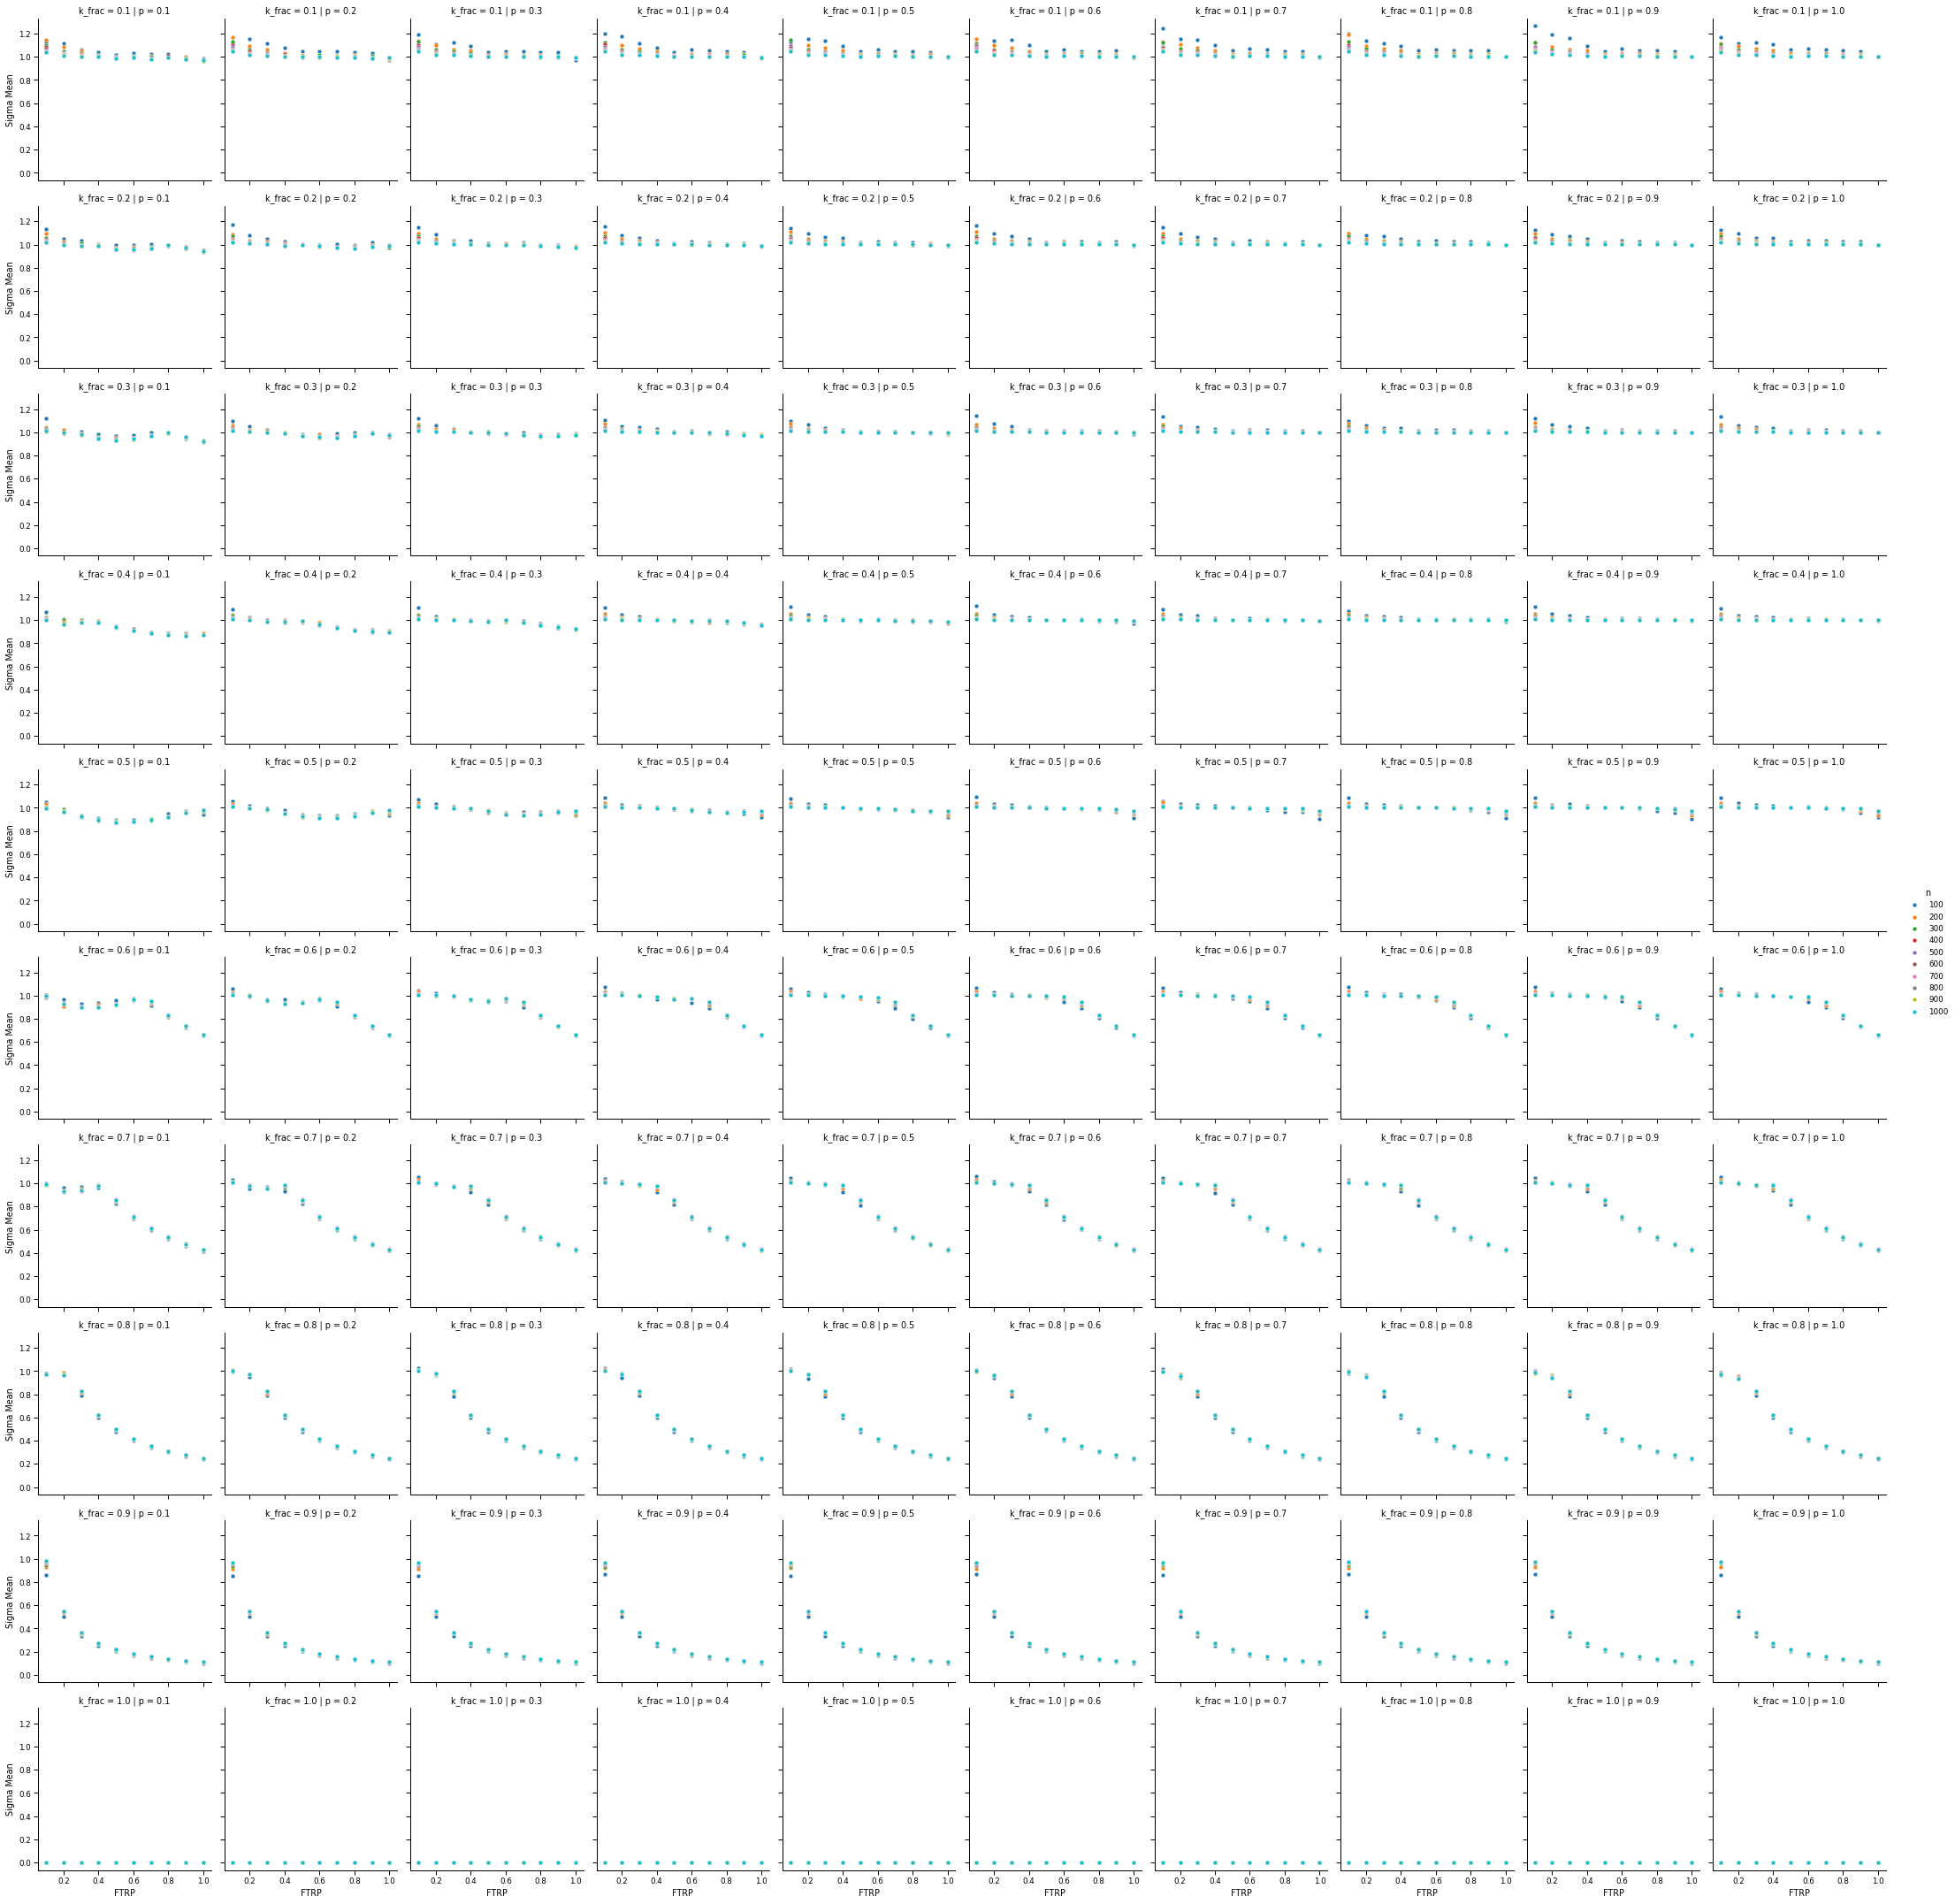

In [17]:
# SIGMA MEAN
g = sns.FacetGrid(ws_df, col='p', row='k_frac', hue="n")
g.map(sns.scatterplot, "r", "sigma_mean")
g.set_axis_labels("FTRP", "Sigma Mean")
g.add_legend()
plt.savefig('images/ws/sigma_mean.pdf', dpi=300, transparent=False);

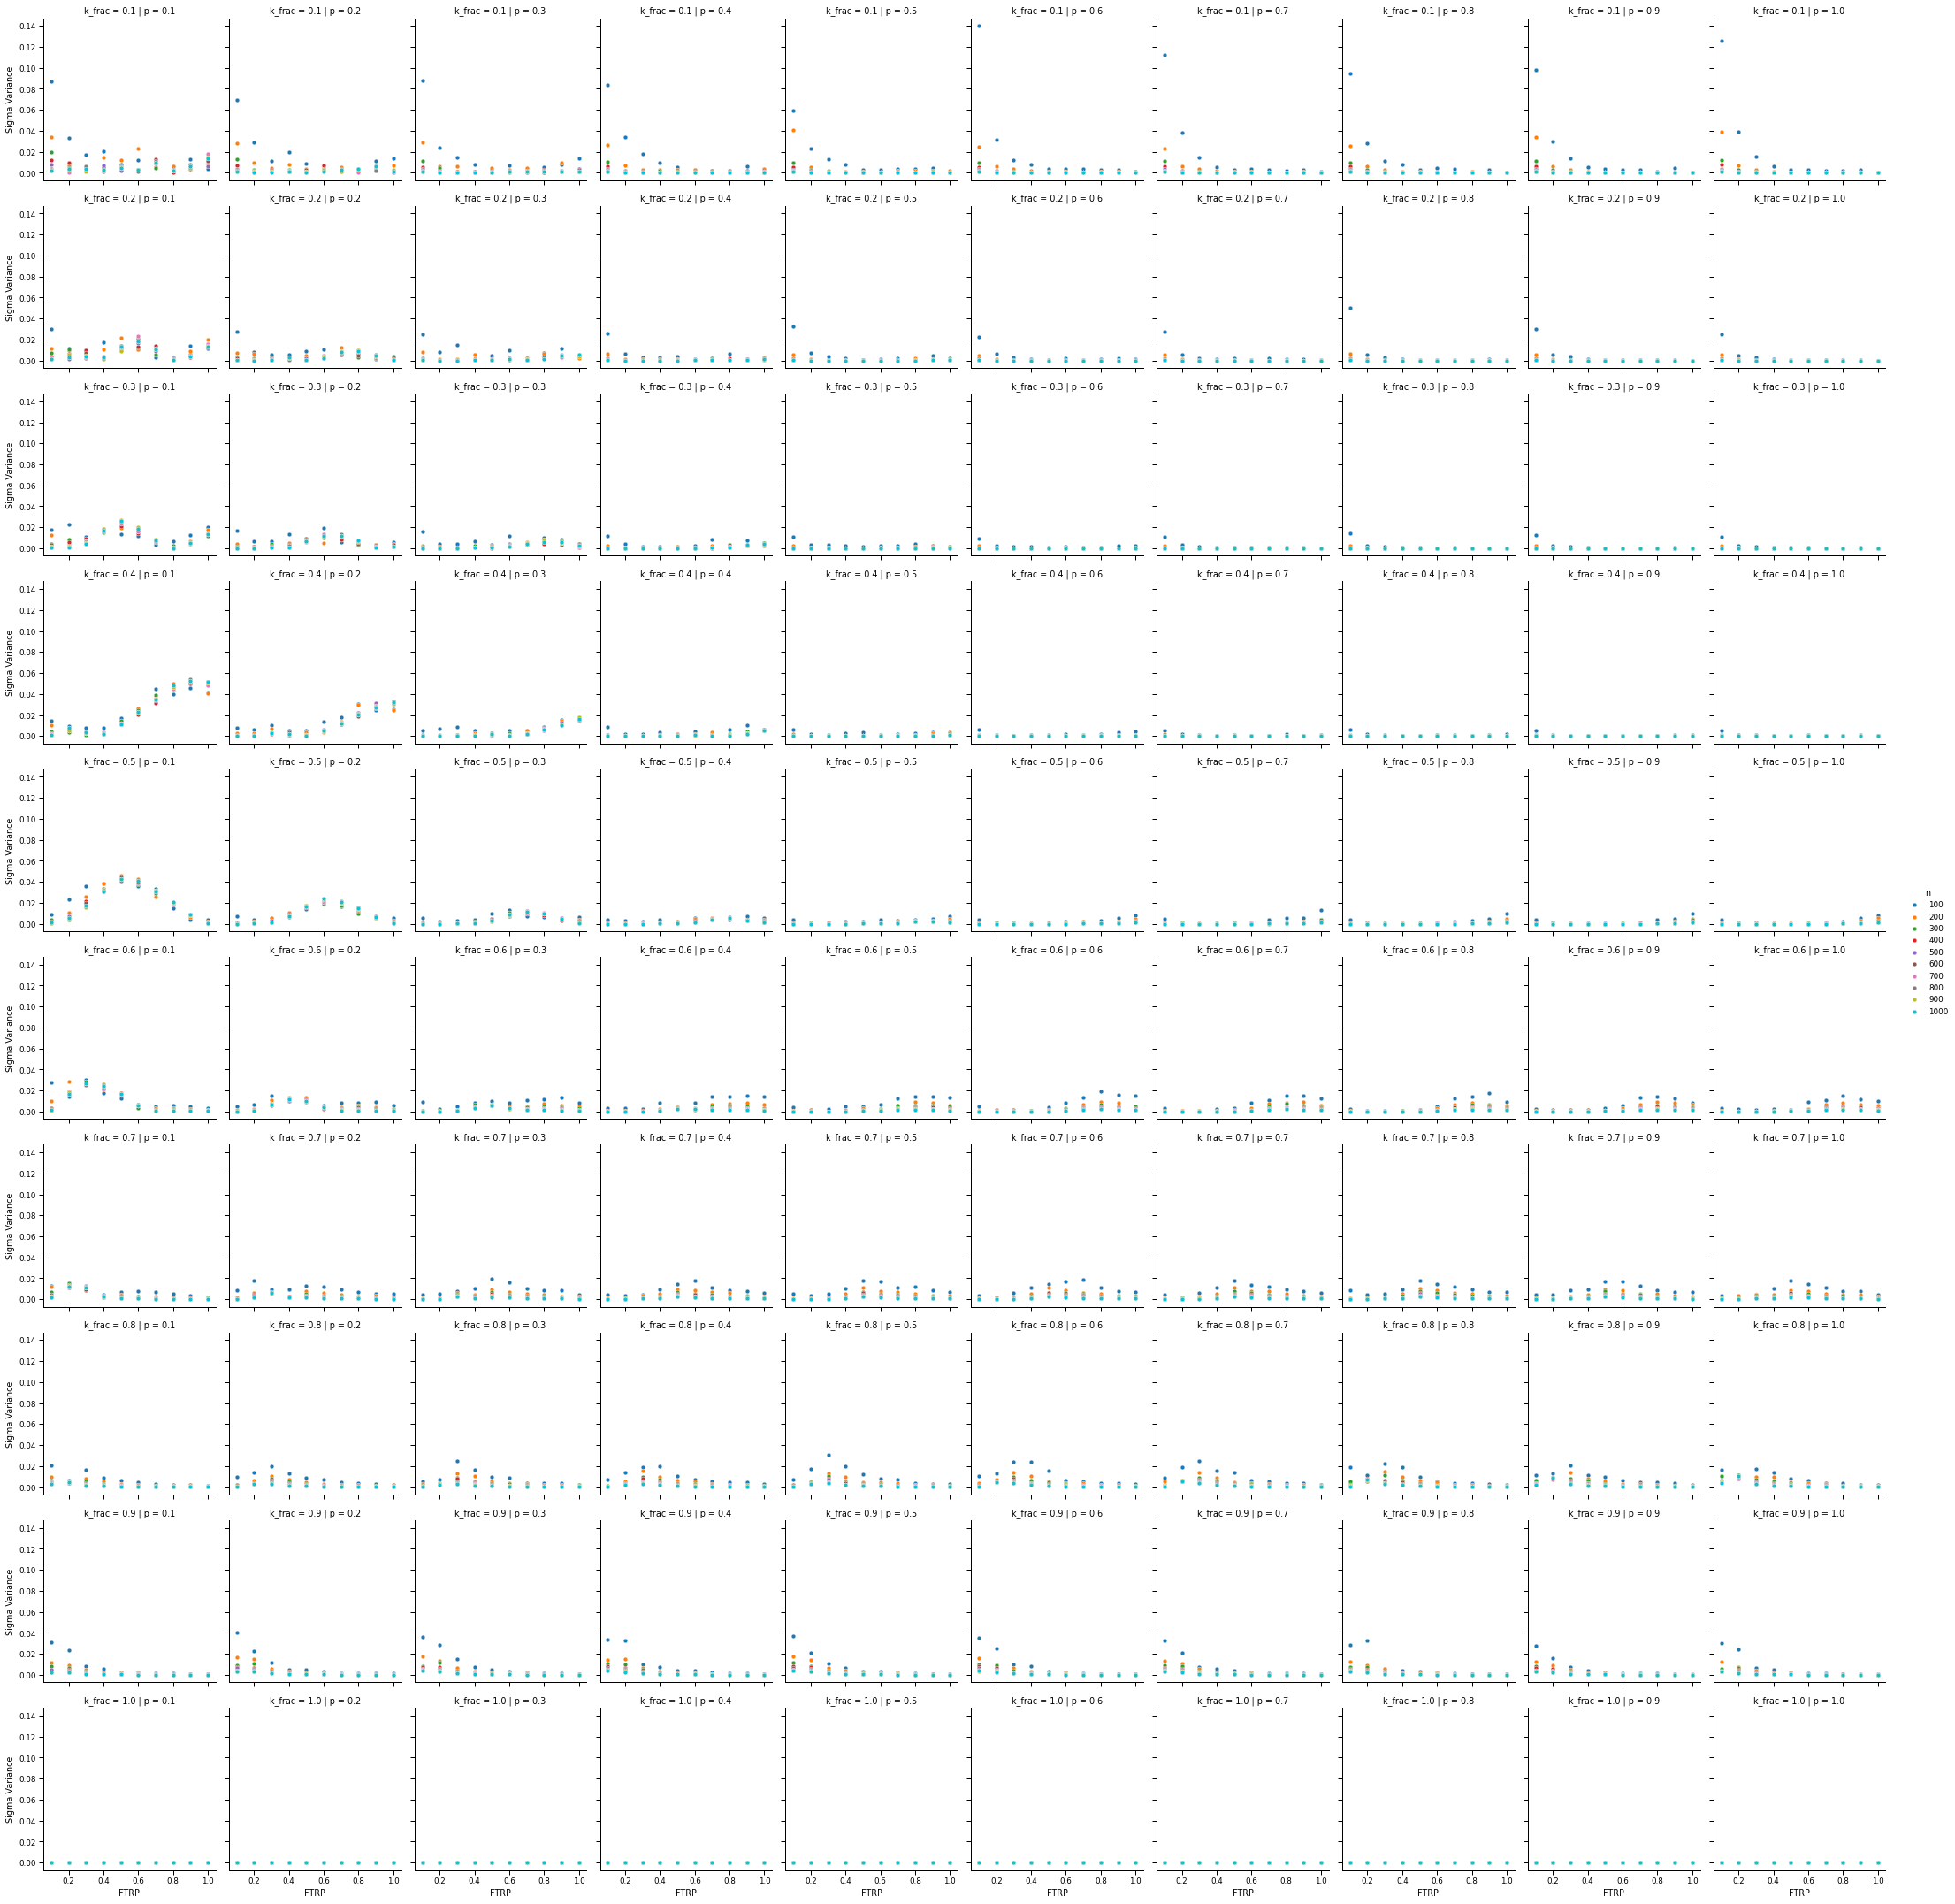

In [18]:
# SIGMA VARIANCE
g = sns.FacetGrid(ws_df, col='p', row='k_frac', hue="n")
g.map(sns.scatterplot, "r", "sigma_variance")
g.set_axis_labels("FTRP", "Sigma Variance")
g.add_legend()
plt.savefig('images/ws/sigma_variance.pdf', dpi=300, transparent=False);

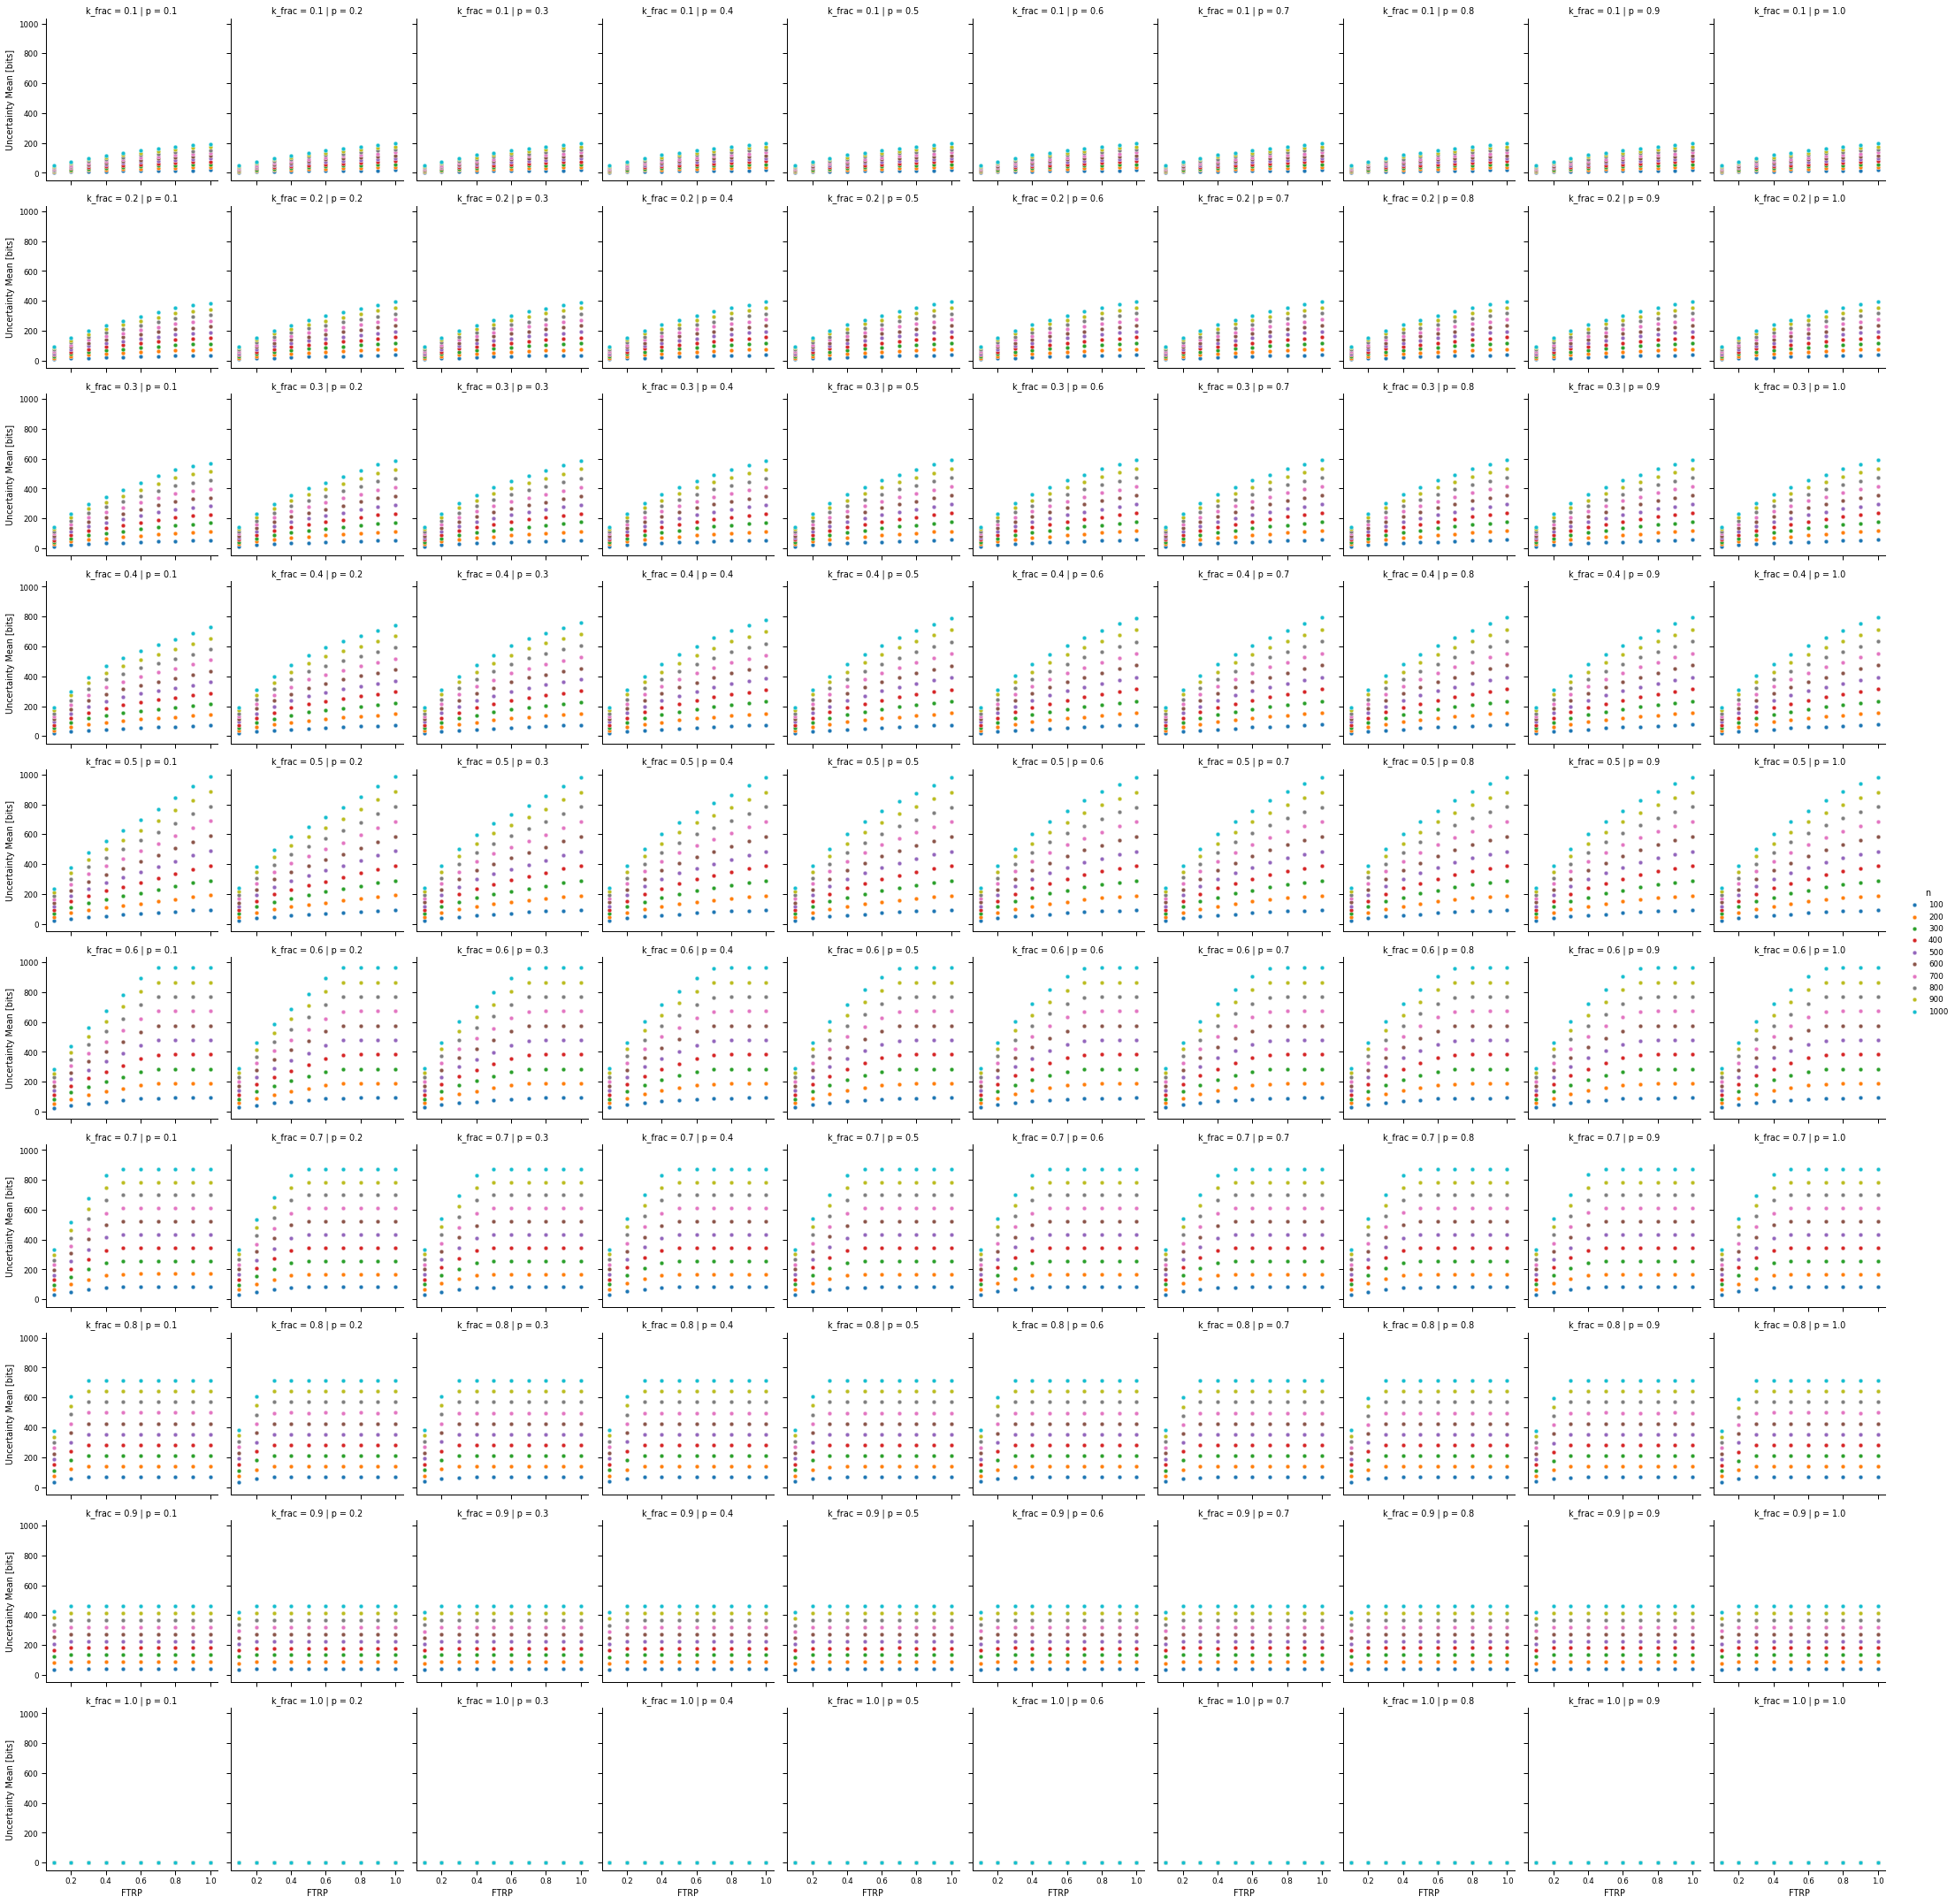

In [19]:
# UNCERTAINTY MEAN
g = sns.FacetGrid(ws_df, col='p', row='k_frac', hue="n")
g.map(sns.scatterplot, "r", "uncertainty_mean")
g.set_axis_labels("FTRP", "Uncertainty Mean [bits]")
g.add_legend()
plt.savefig('images/ws/uncertainty_mean.pdf', dpi=300, transparent=False);

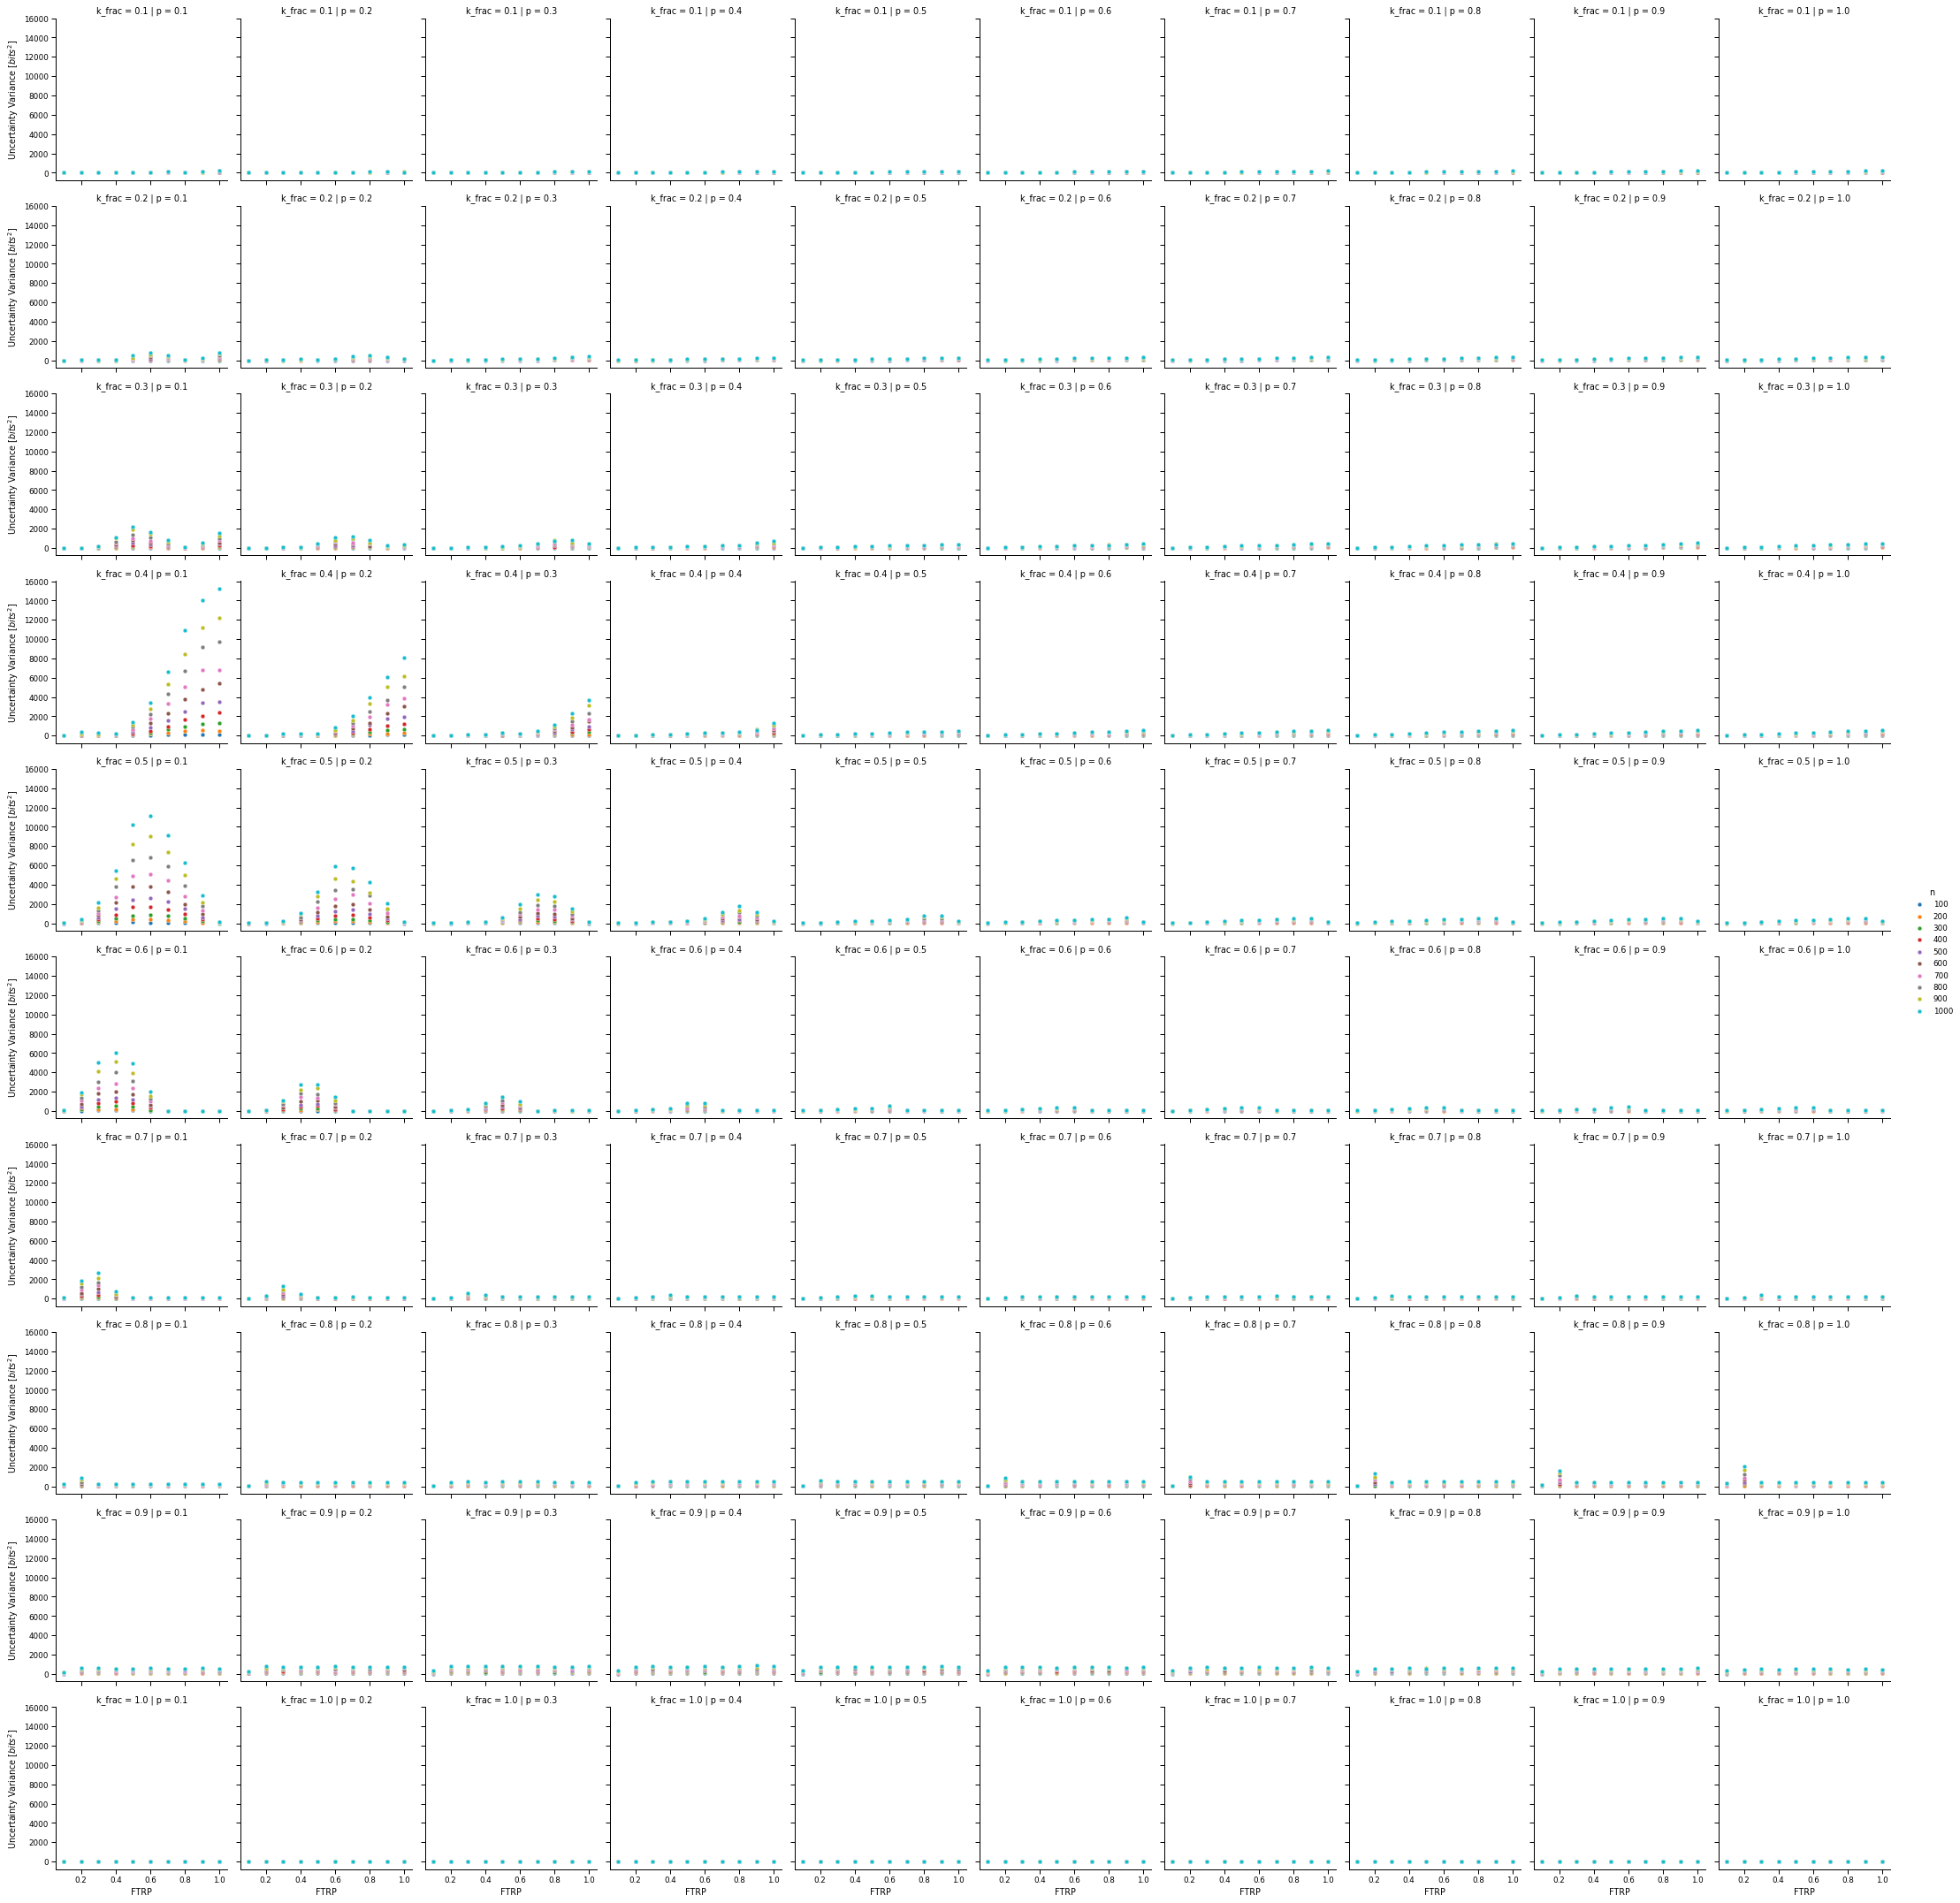

In [20]:
# UNCERTAINTY VARIANCE
g = sns.FacetGrid(ws_df, col='p', row='k_frac', hue="n")
g.map(sns.scatterplot, "r", "uncertainty_variance")
g.set_axis_labels("FTRP", r"Uncertainty Variance [$bits^2$]")
g.add_legend()
plt.savefig('images/ws/uncertainty_variance.pdf', dpi=300, transparent=False);

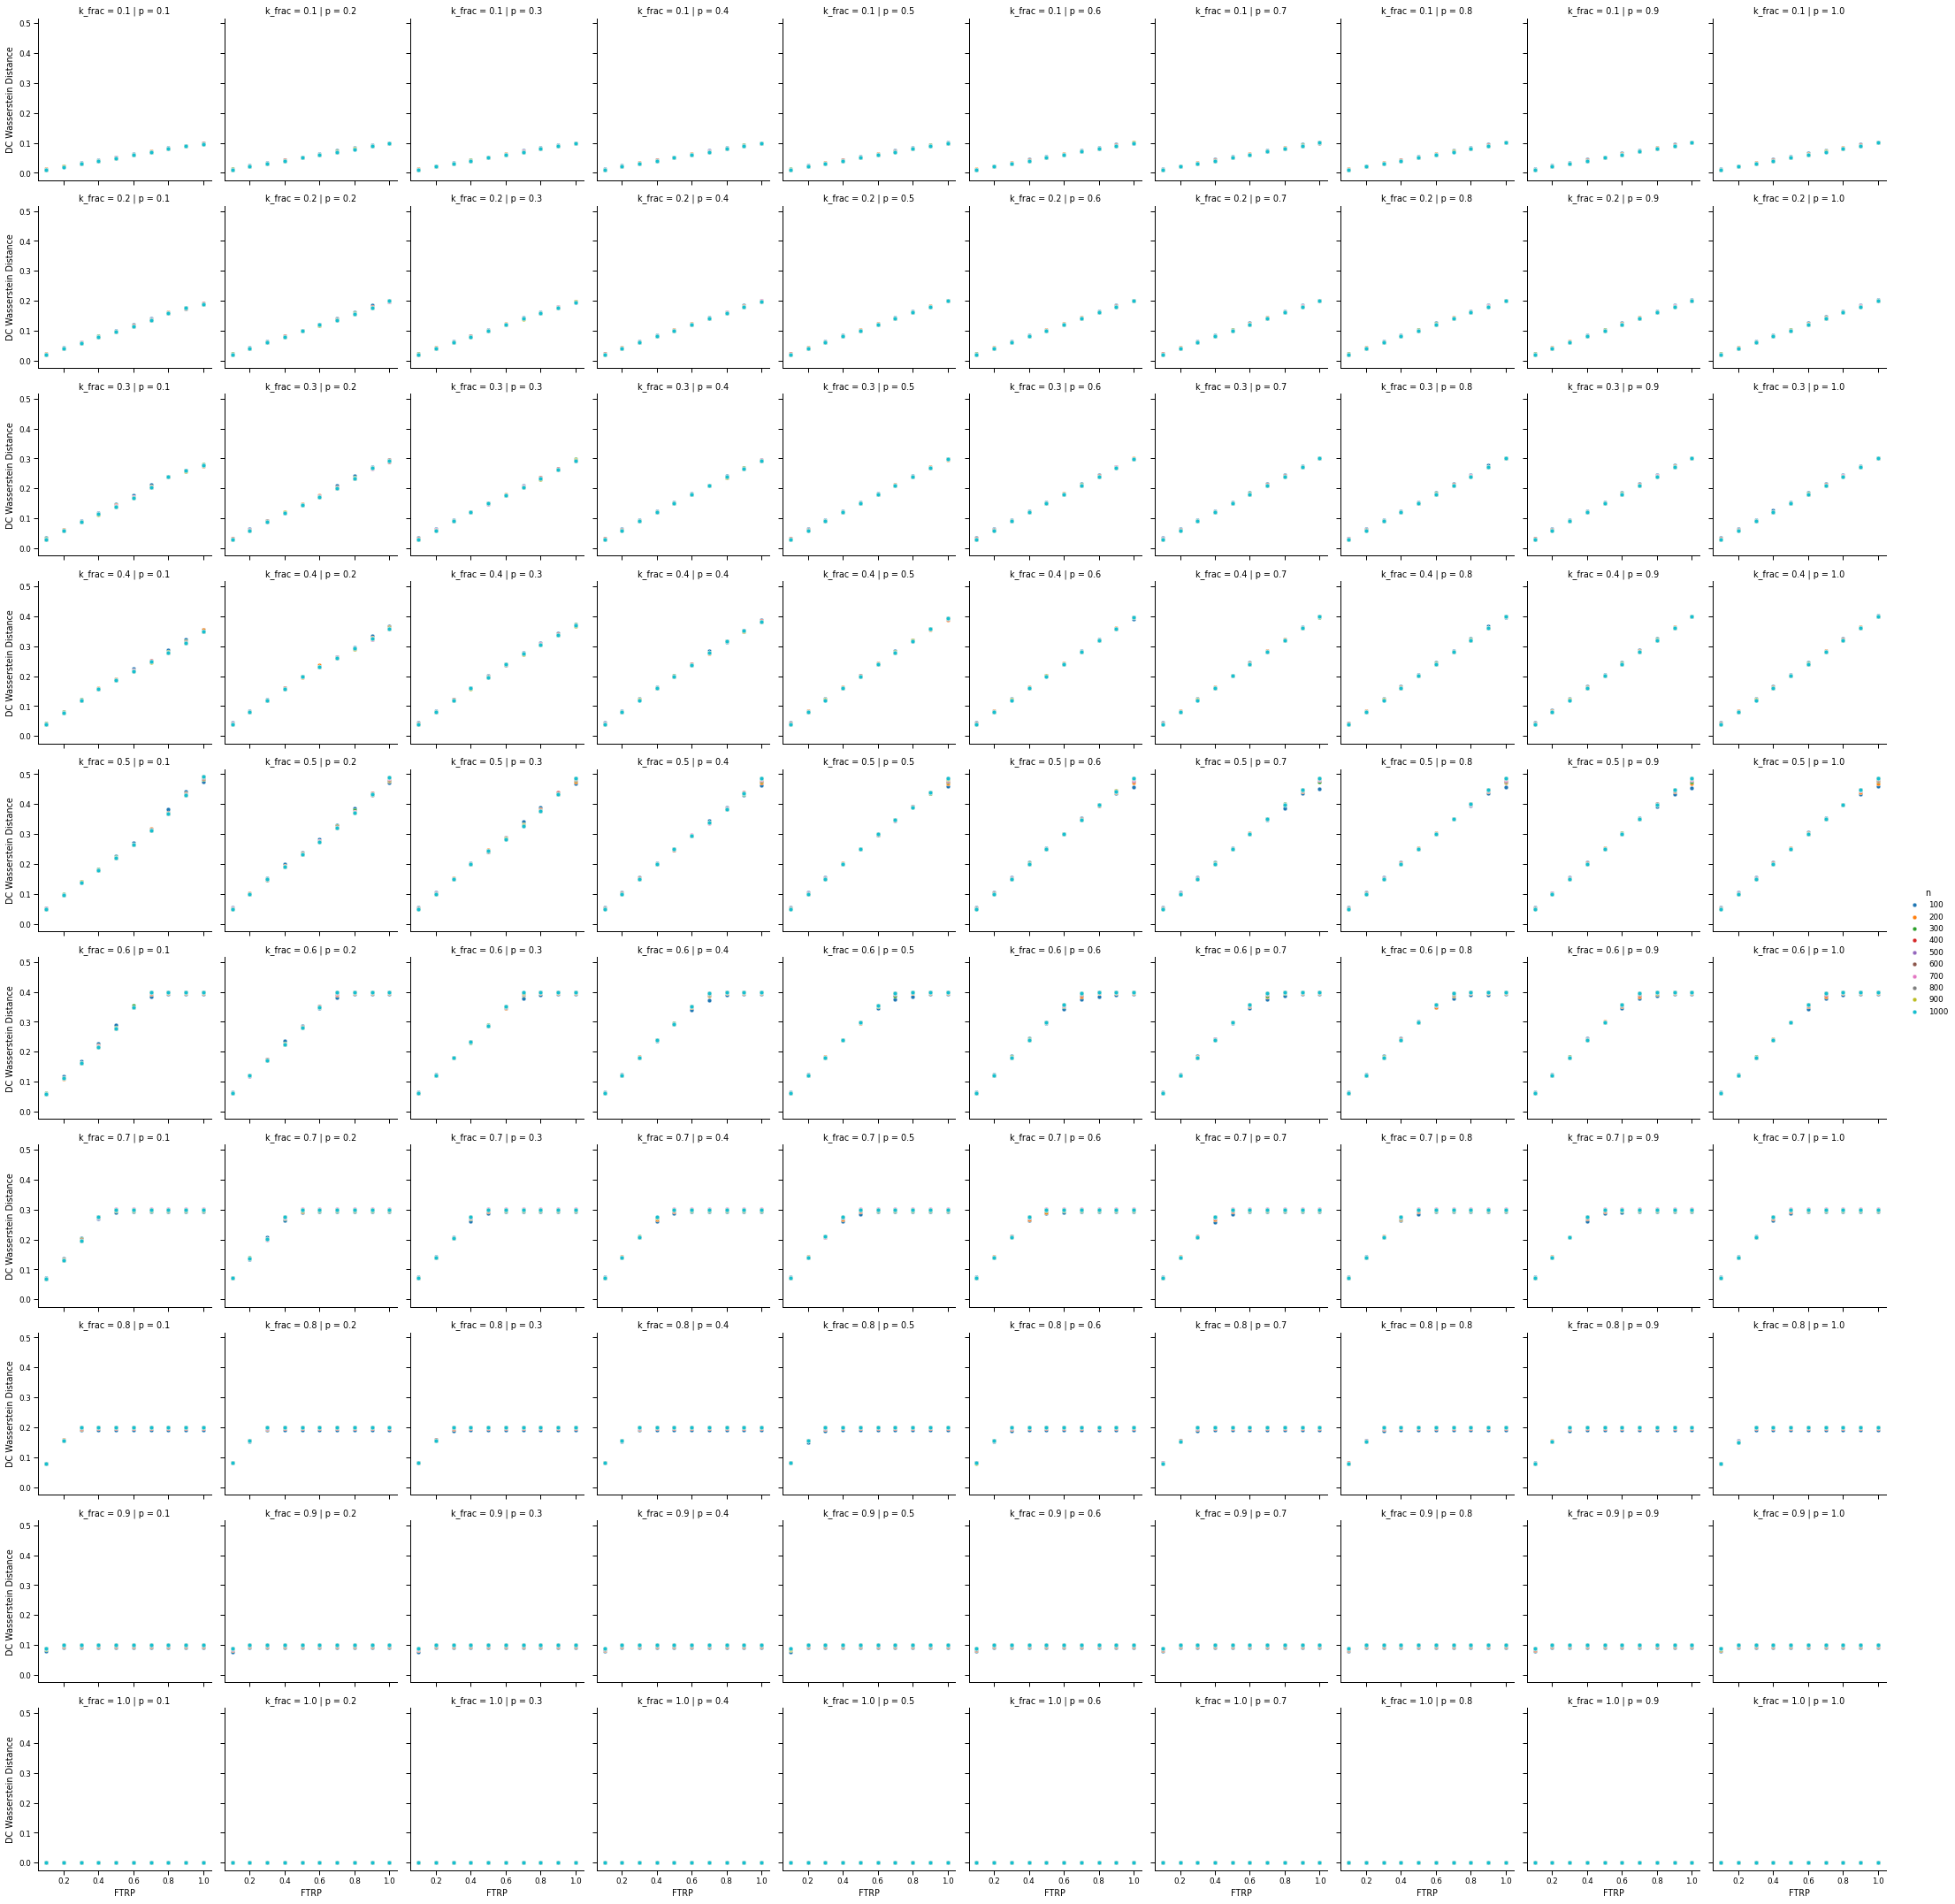

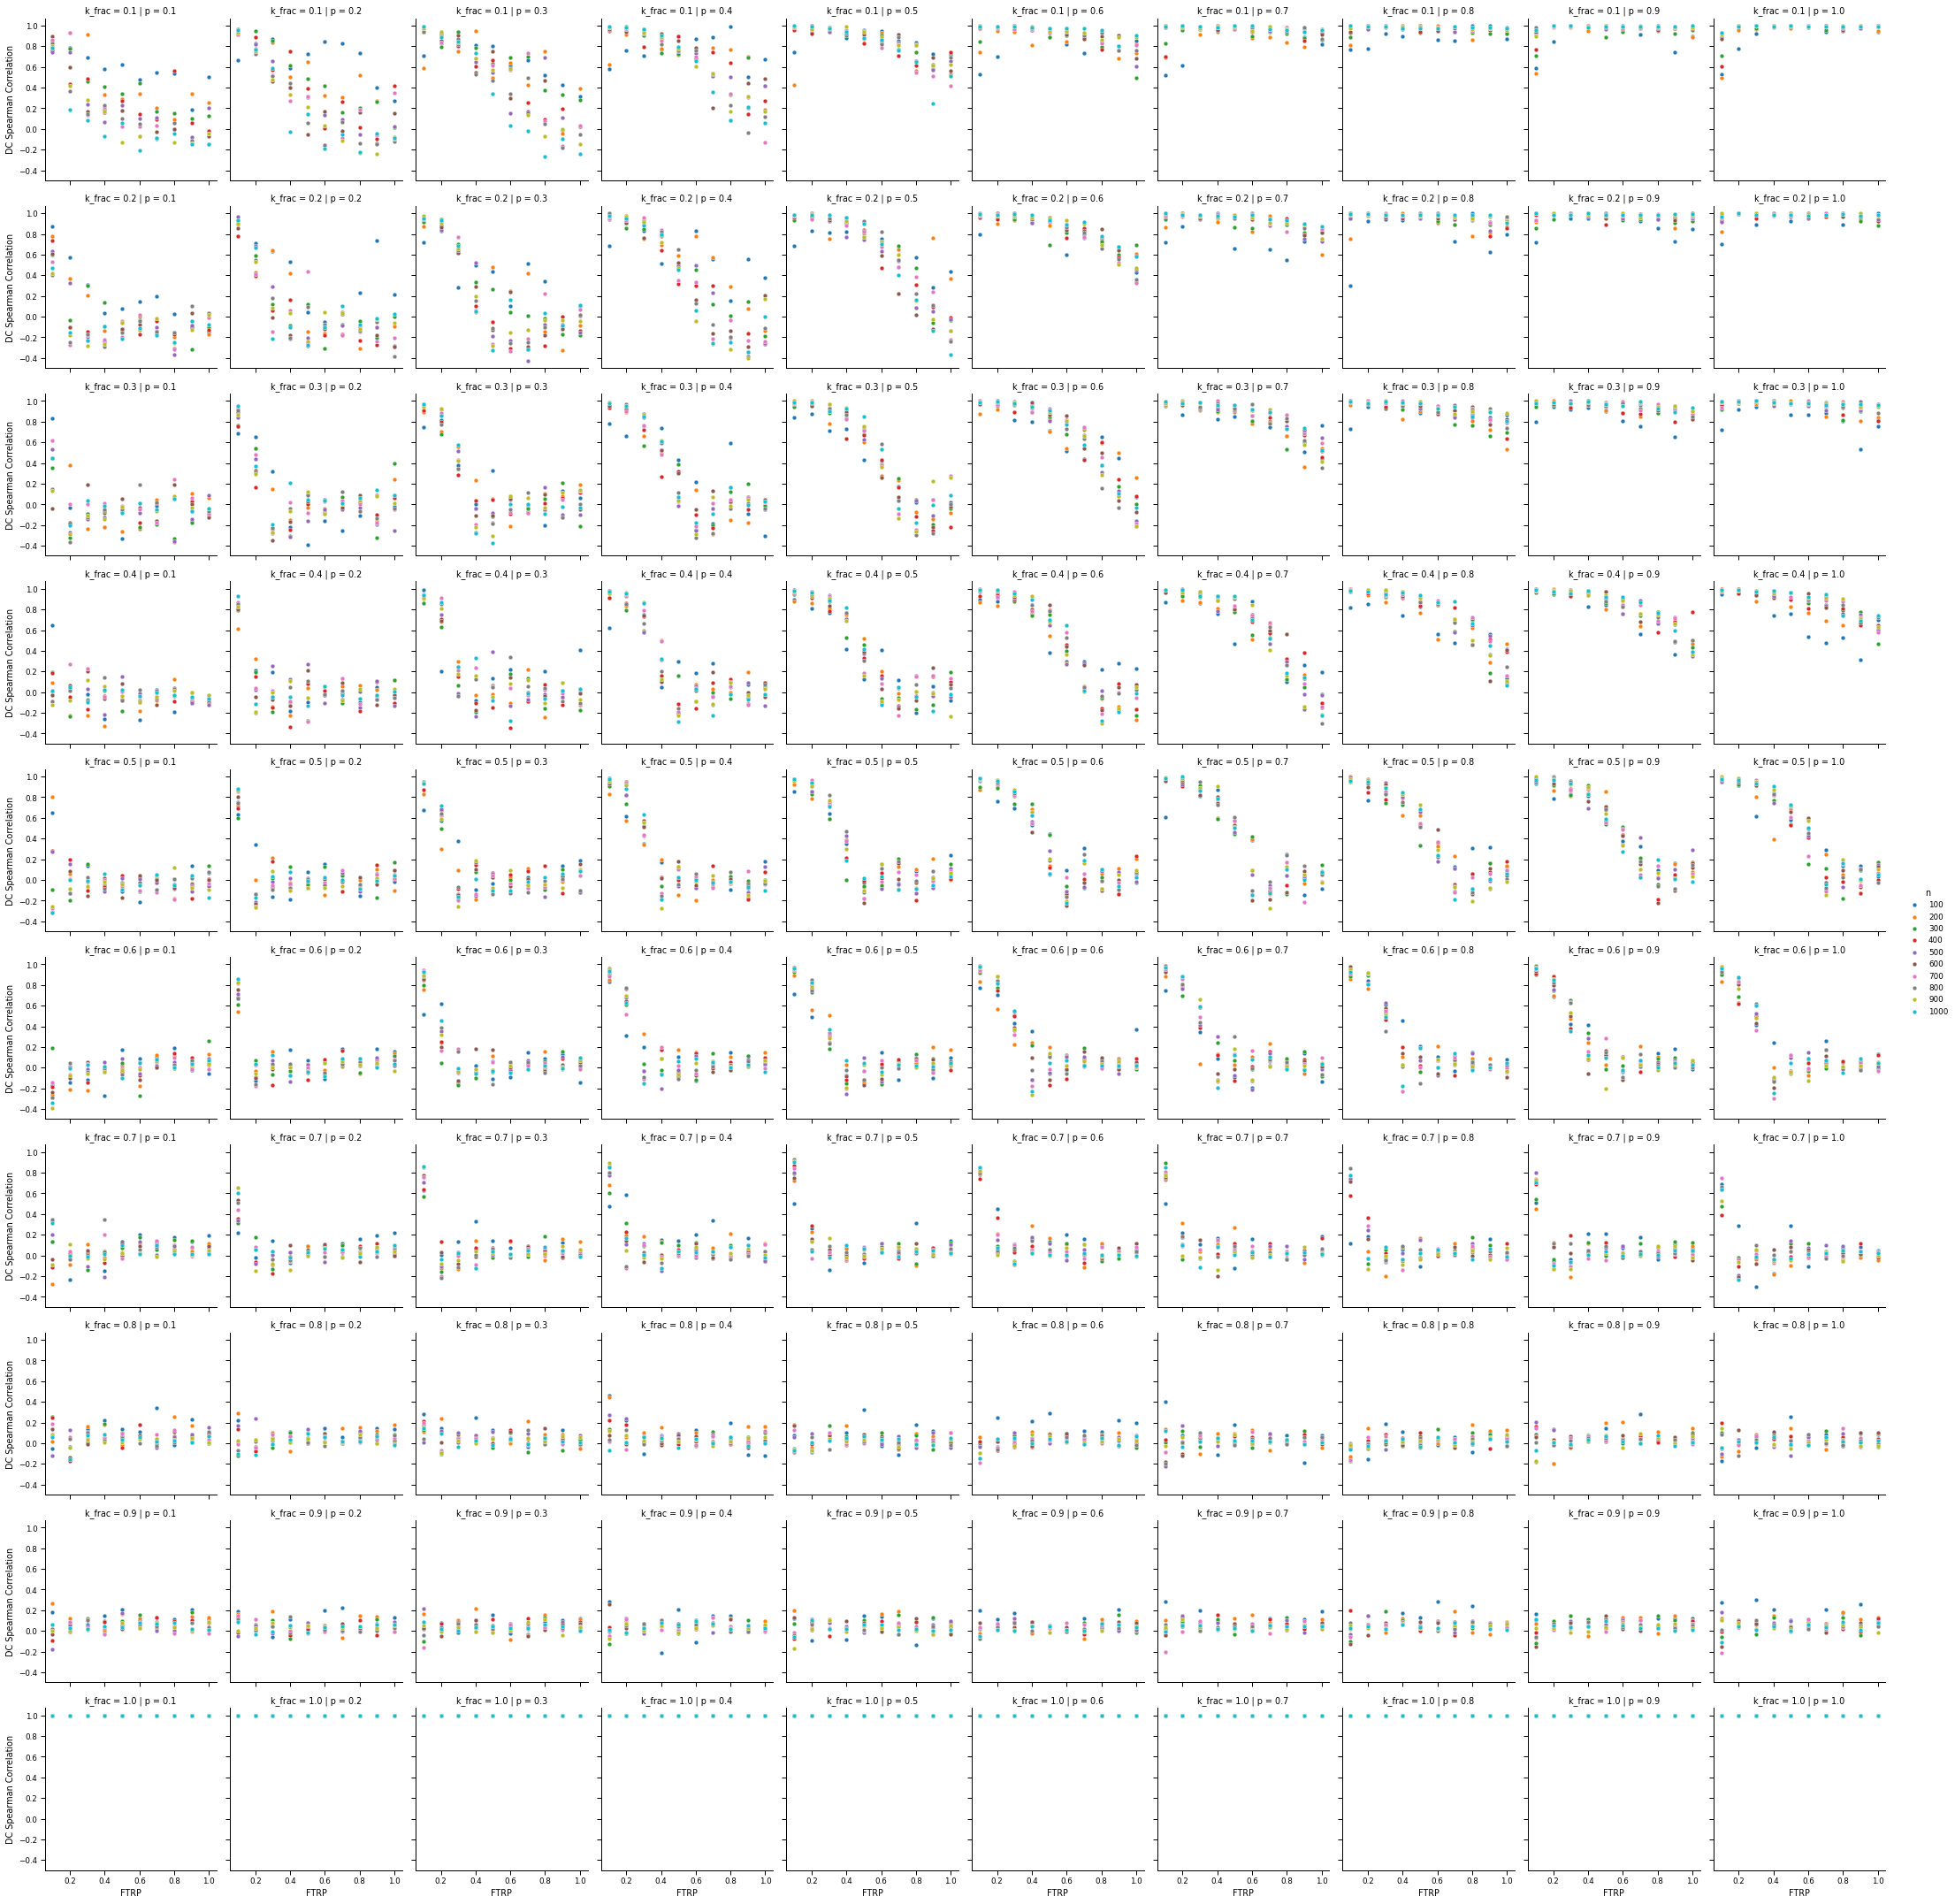

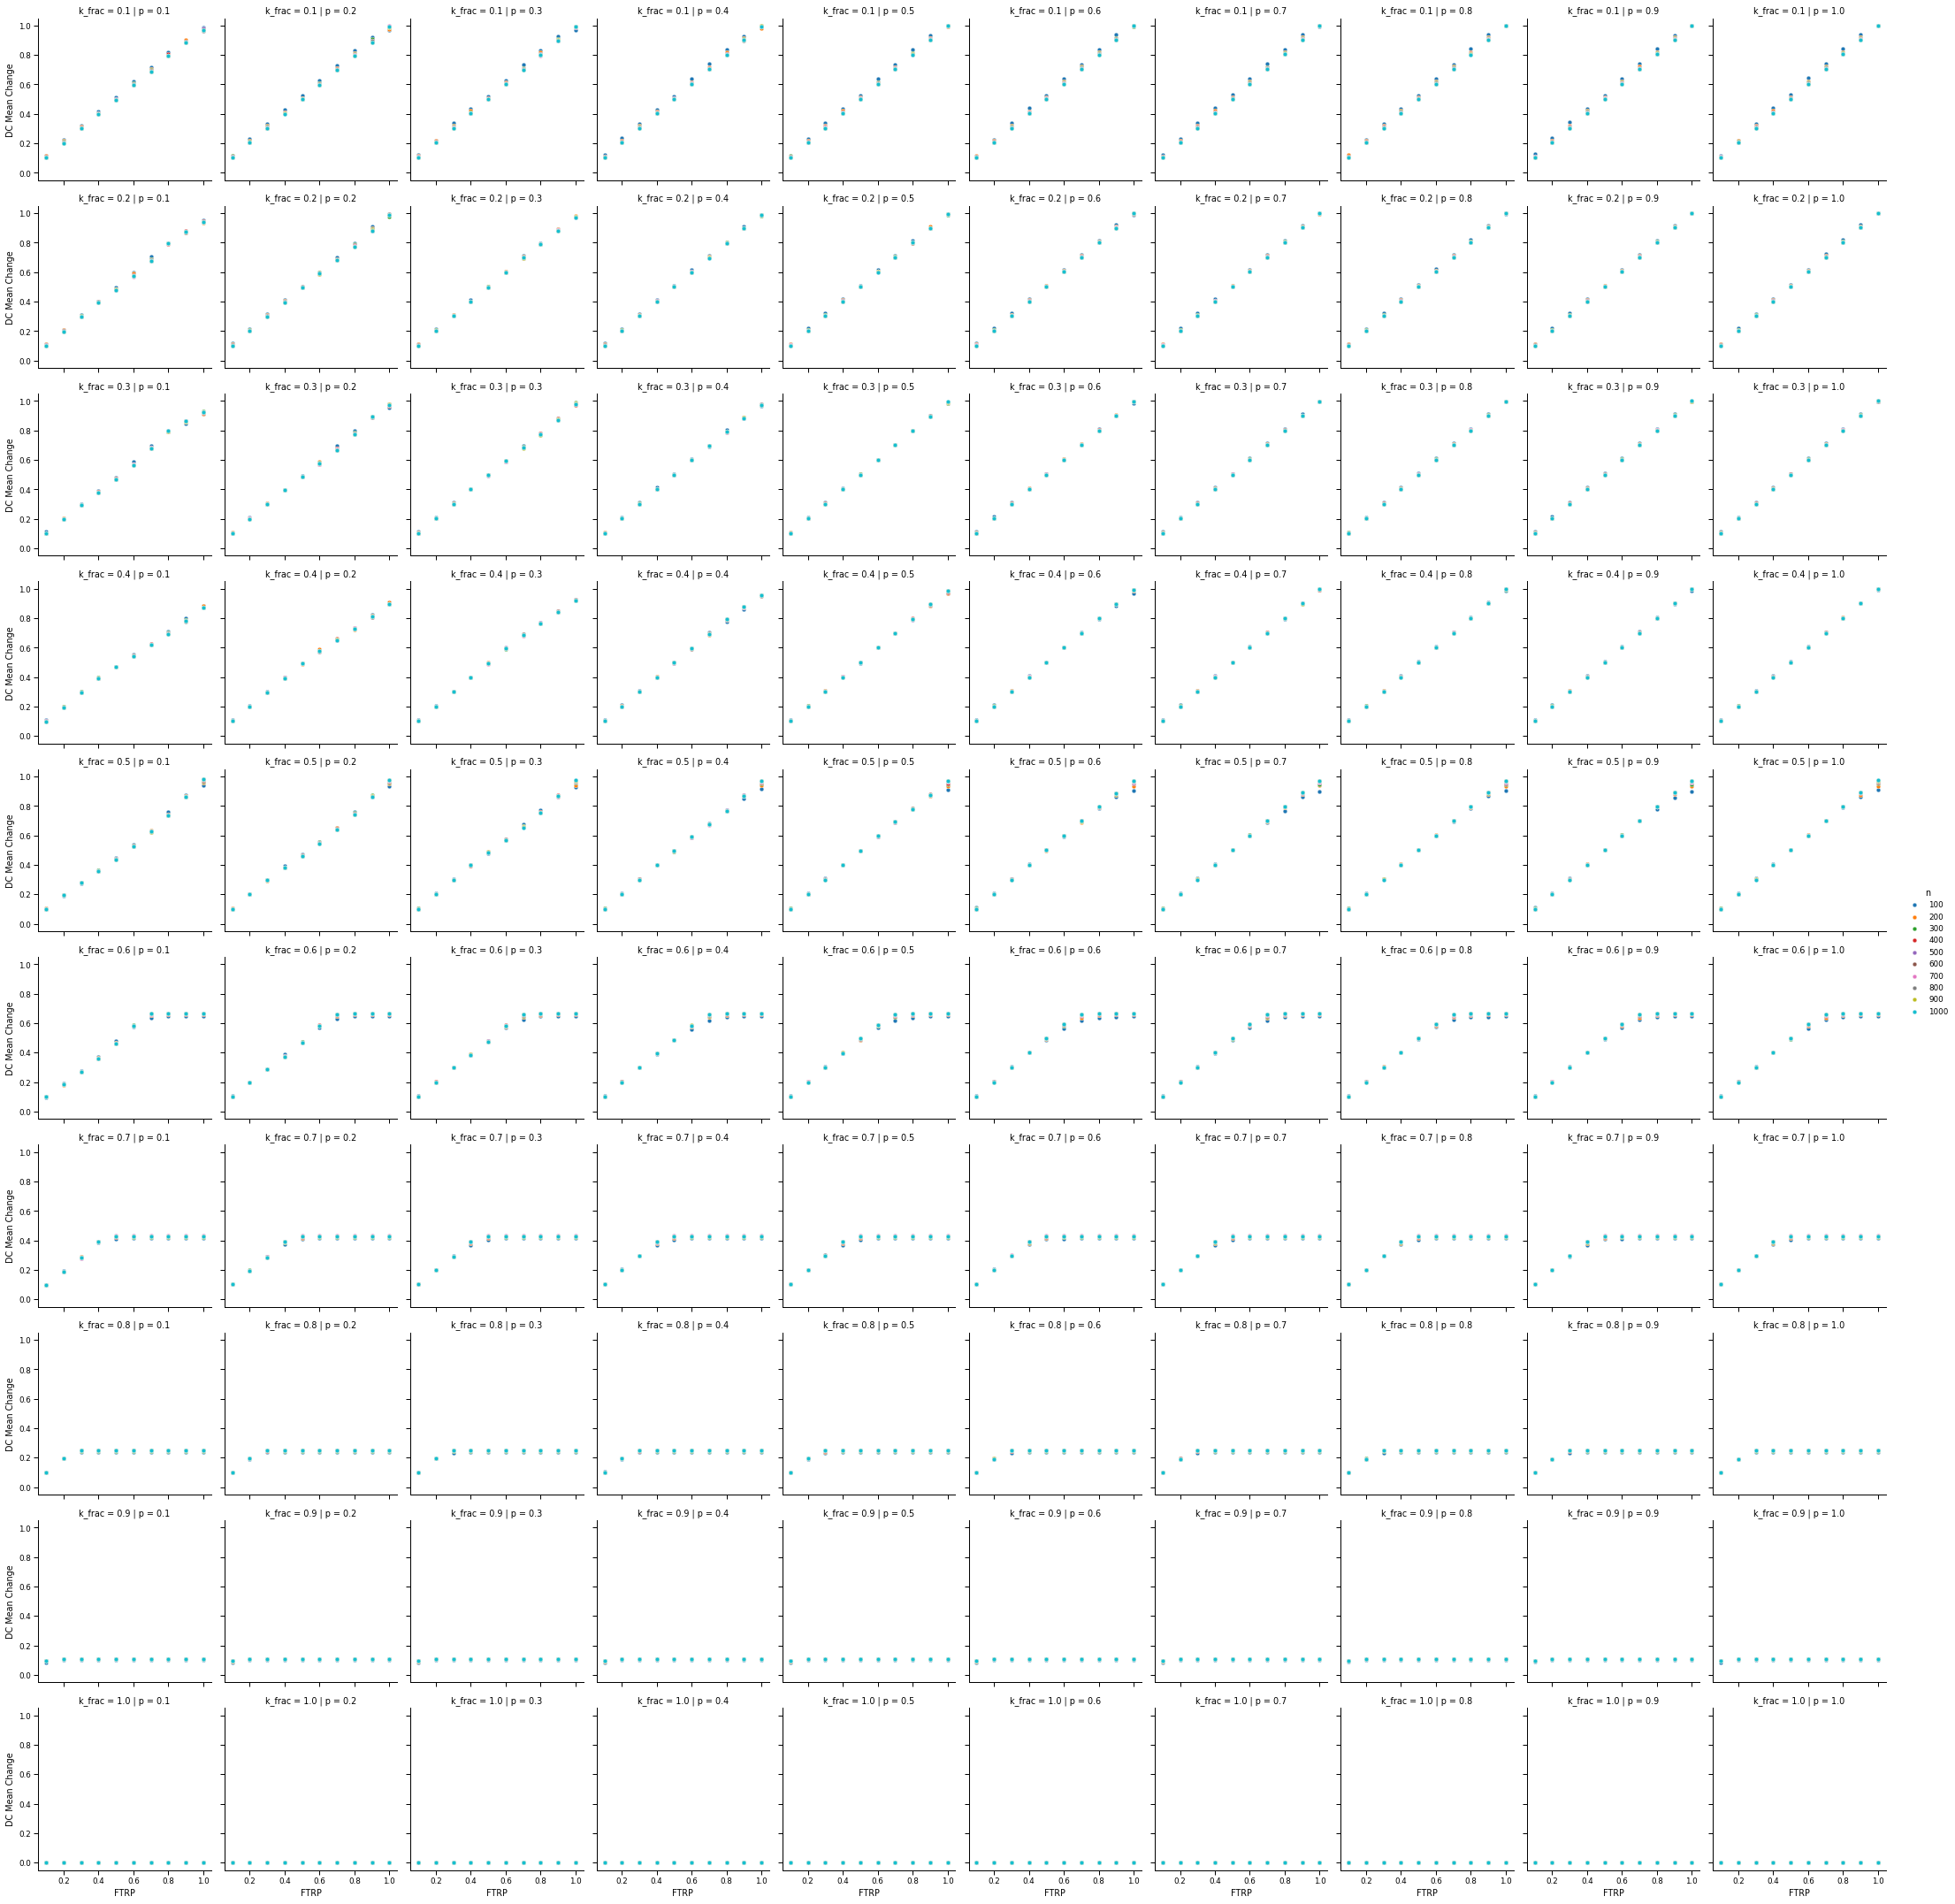

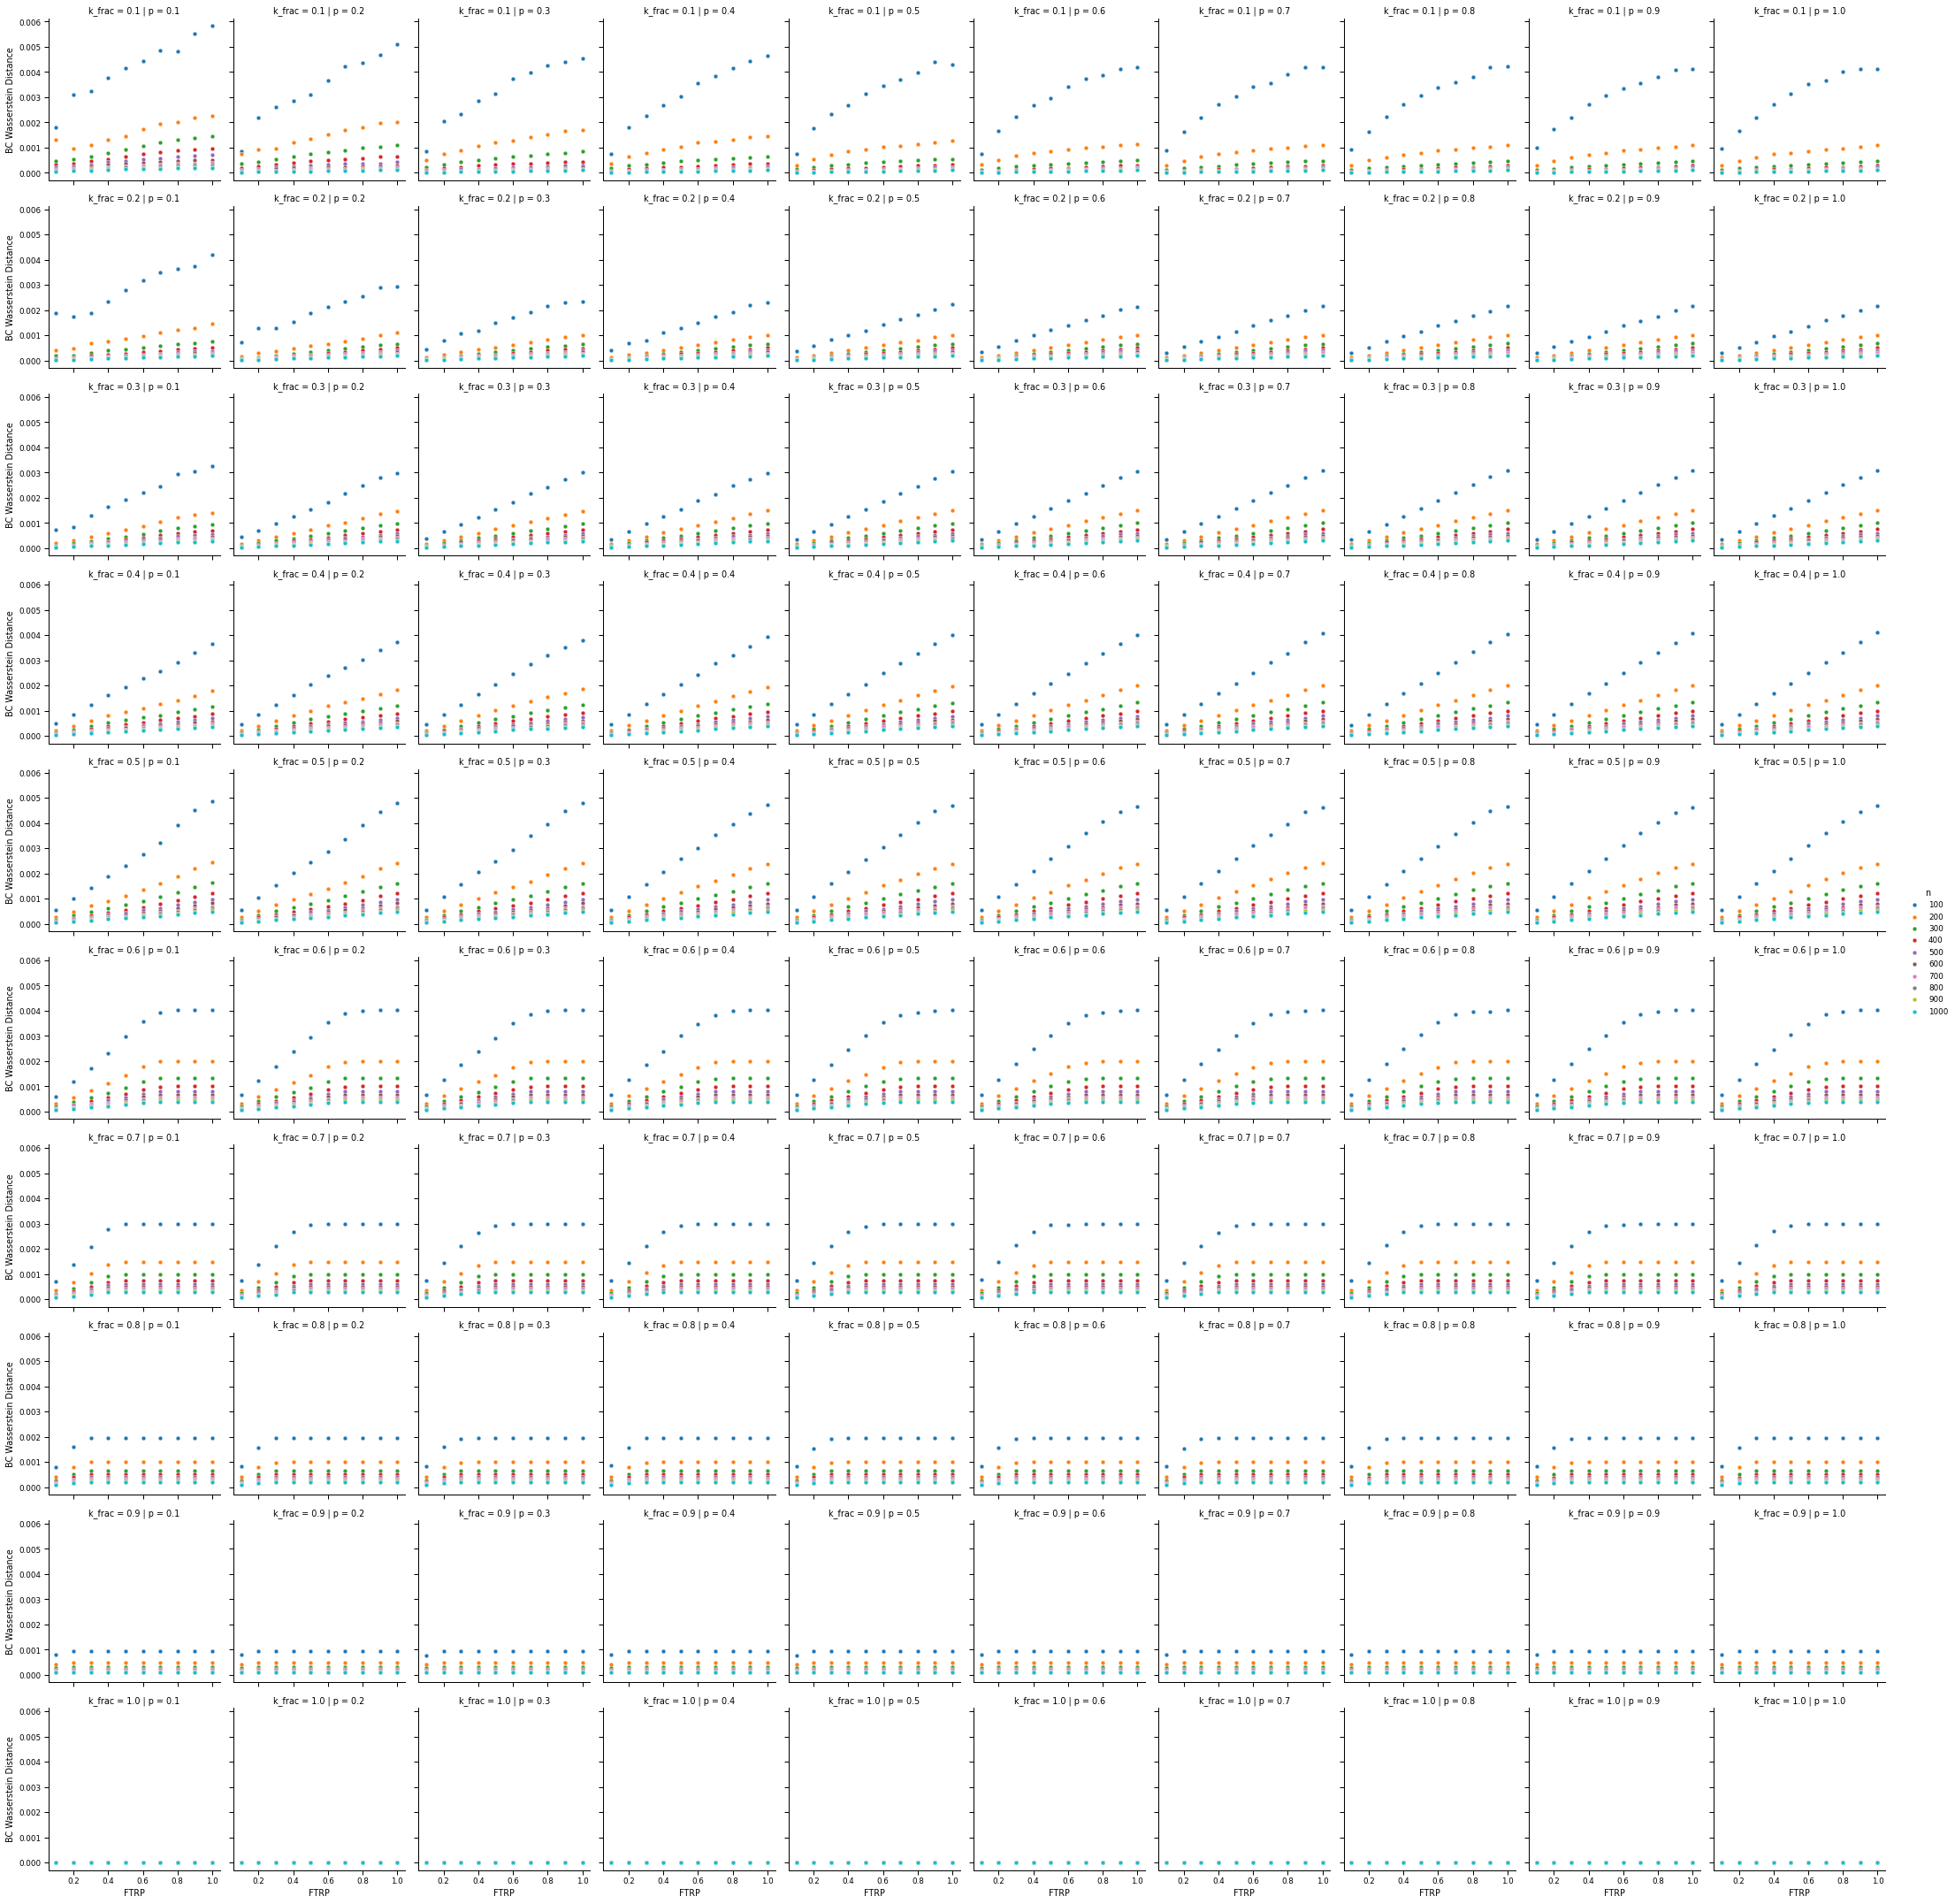

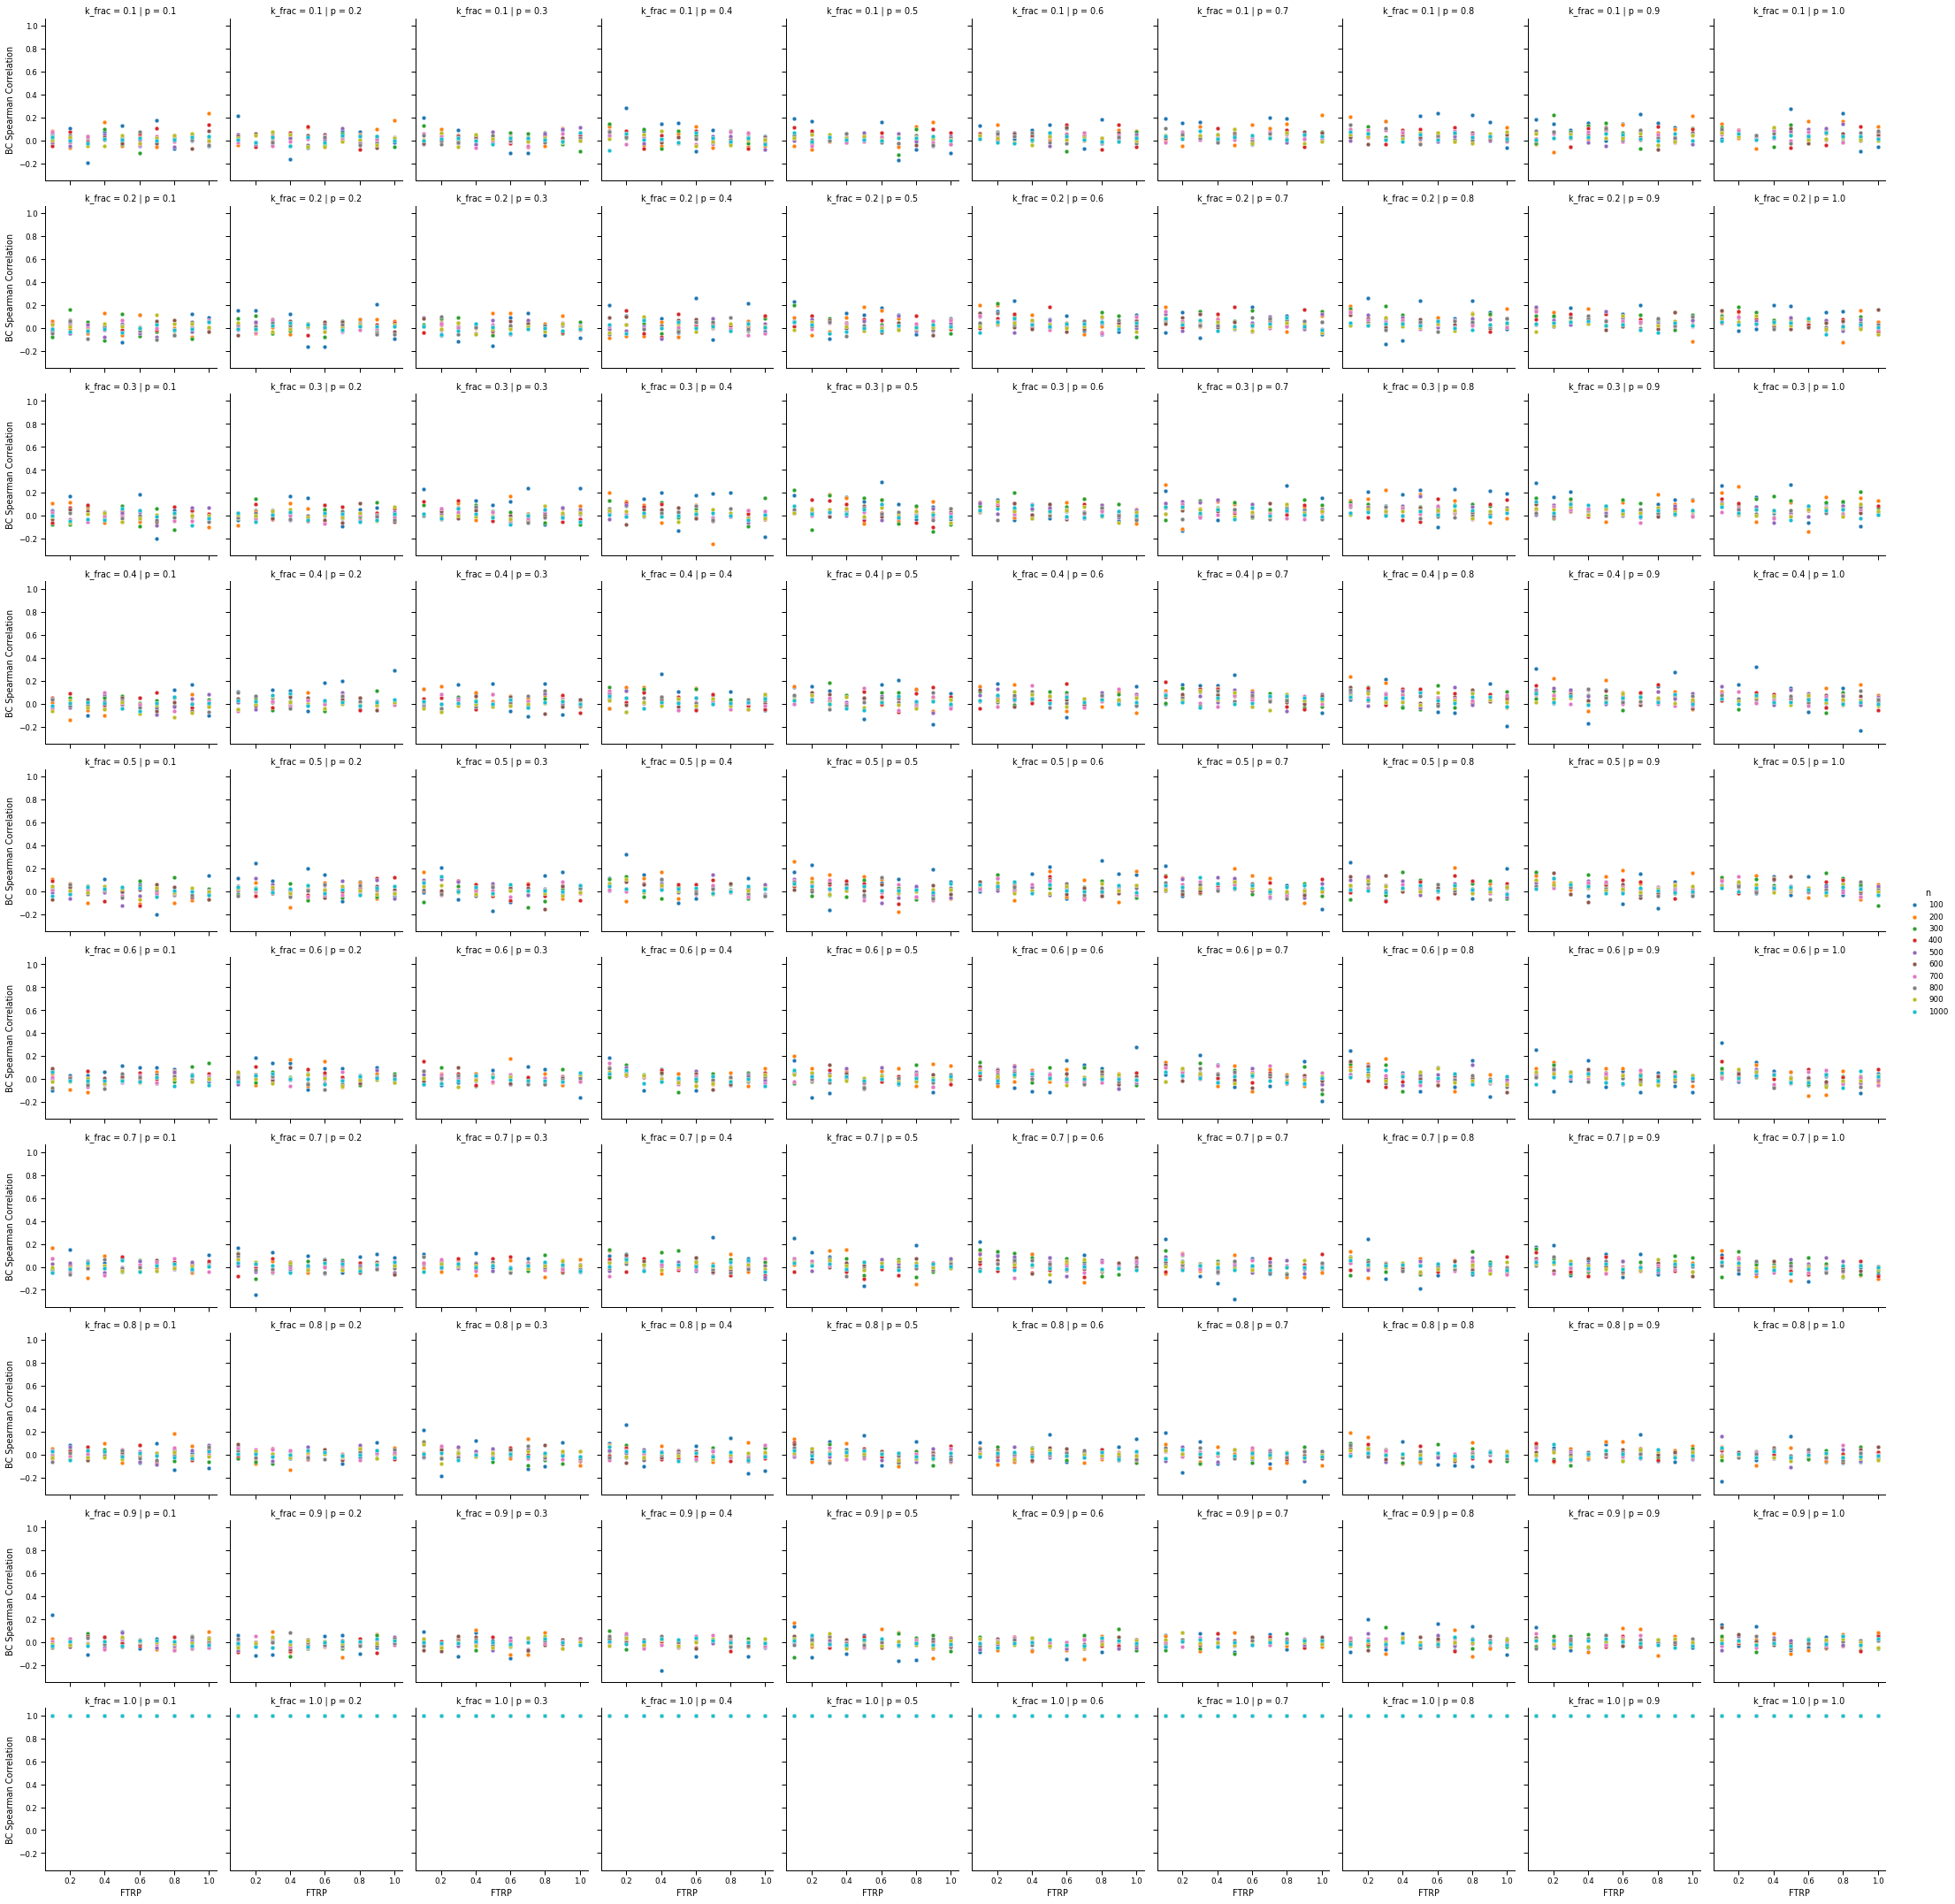

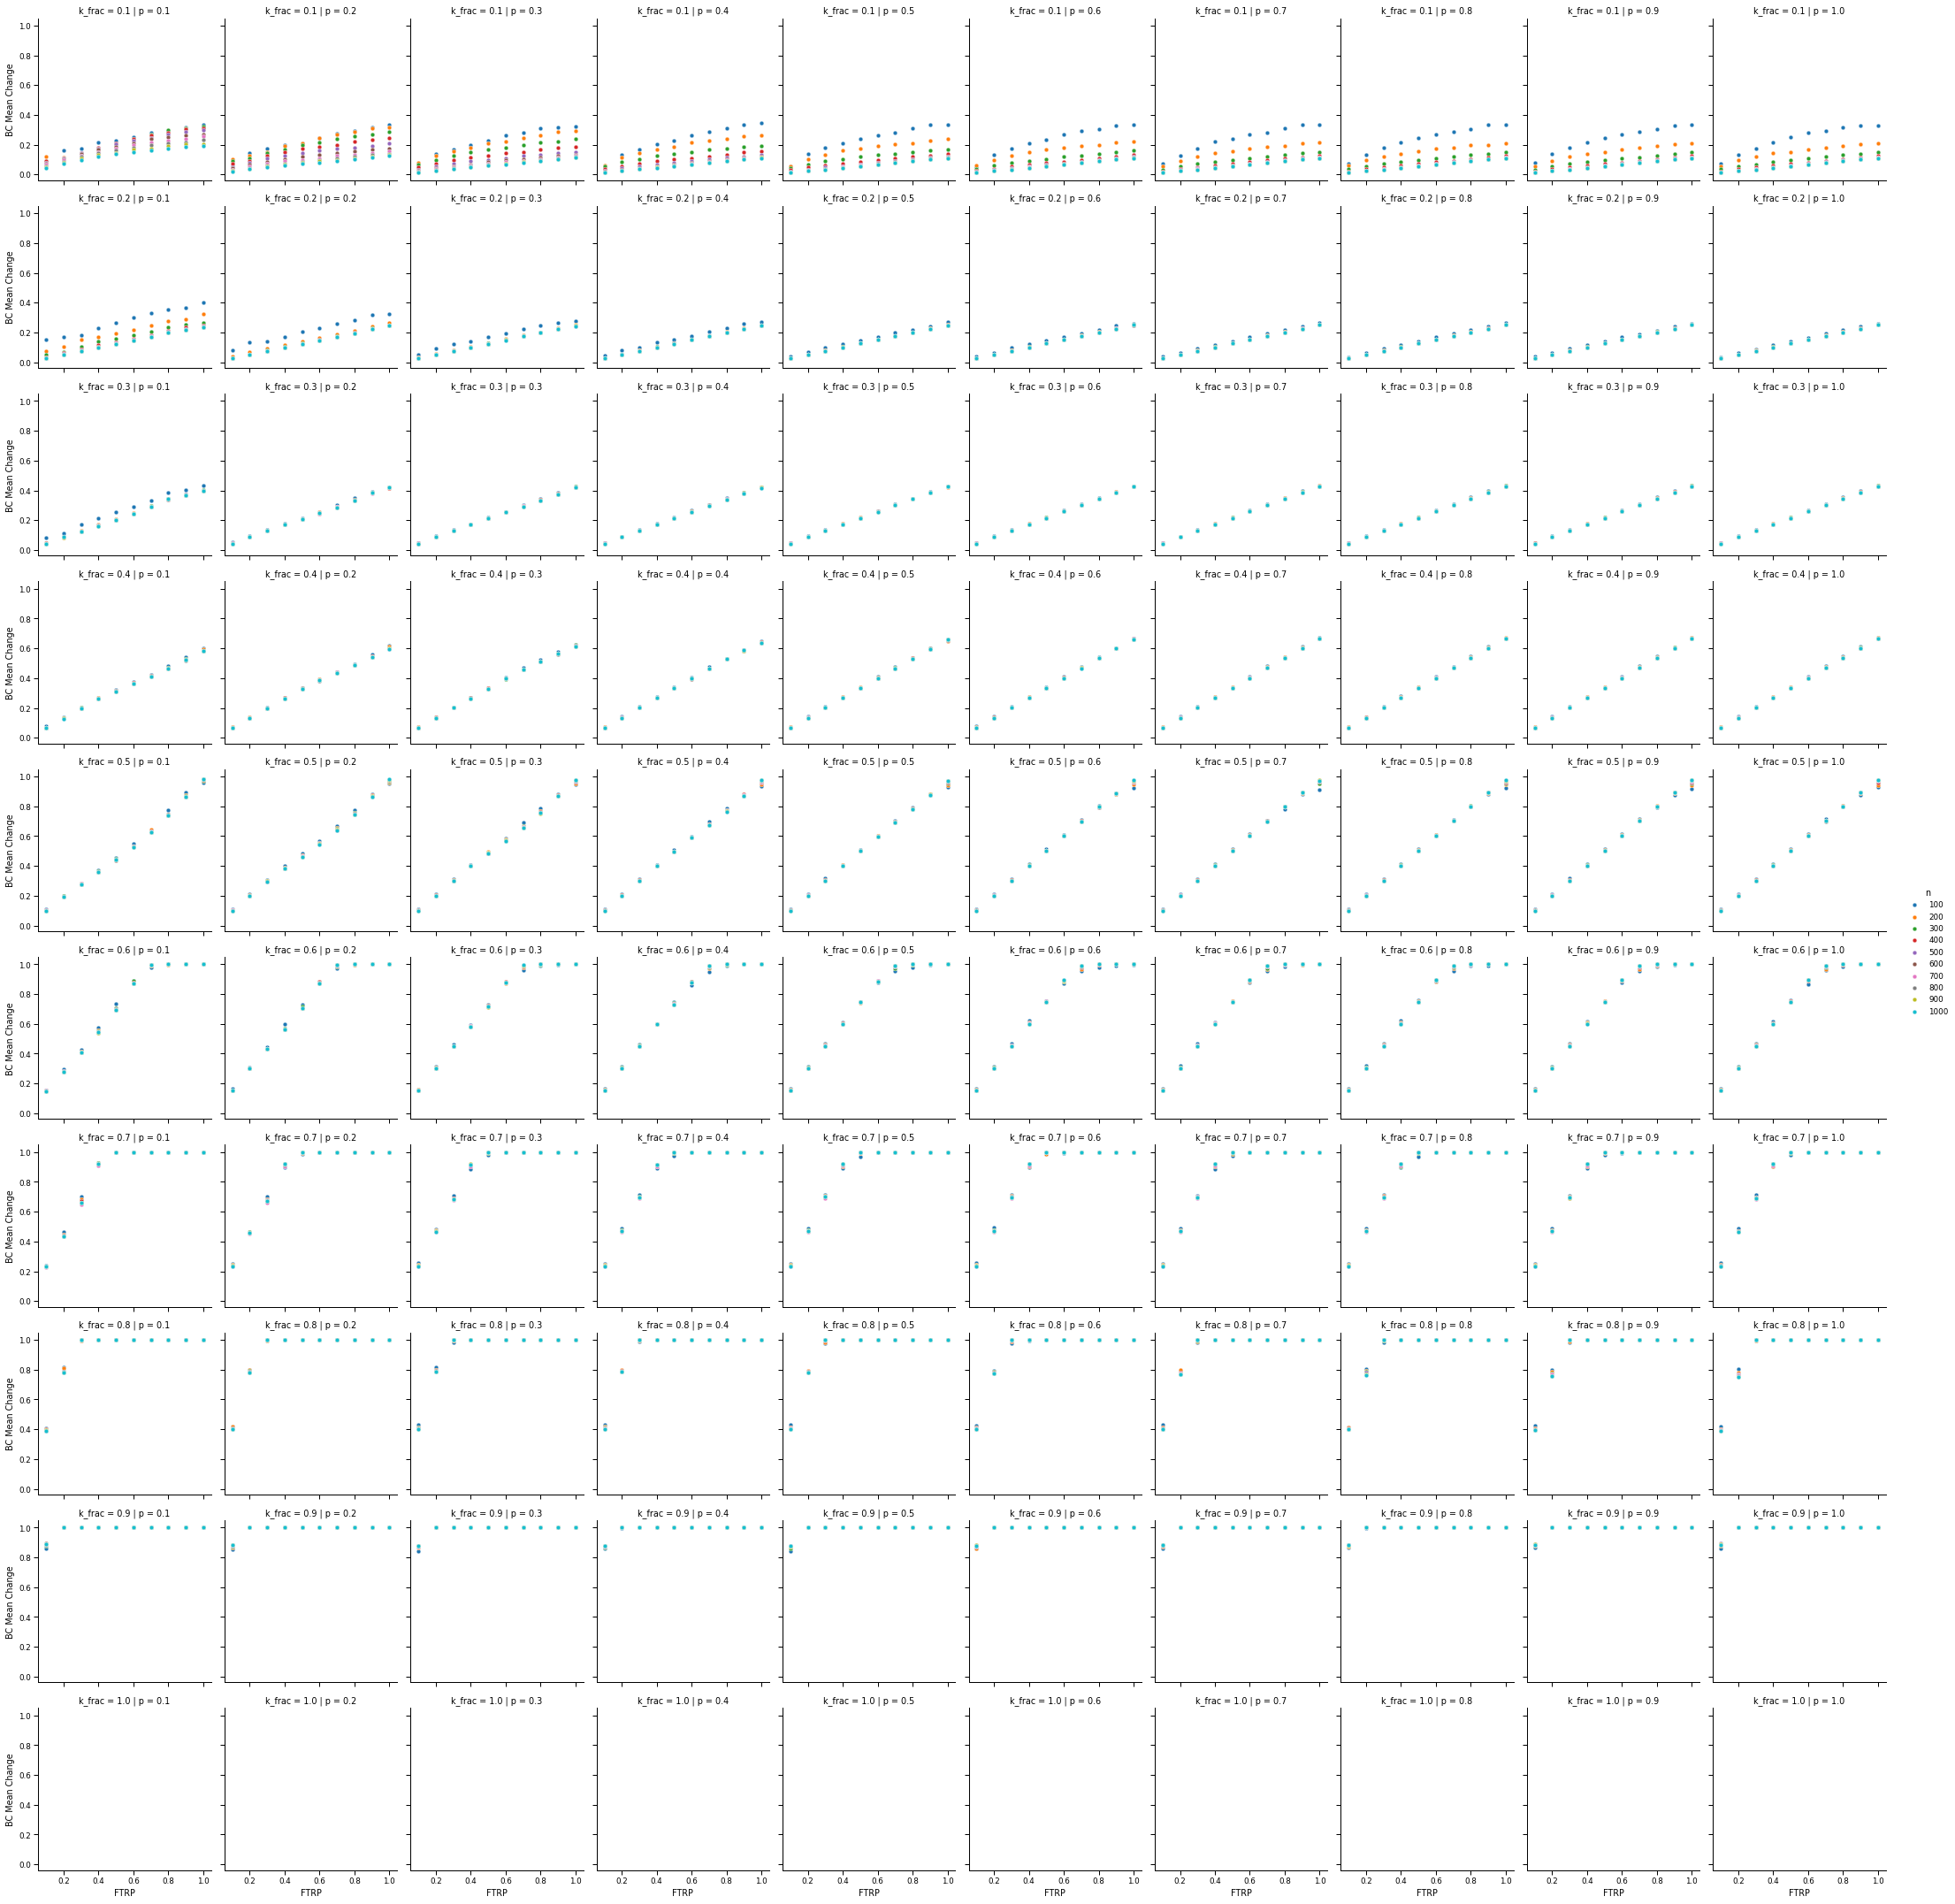

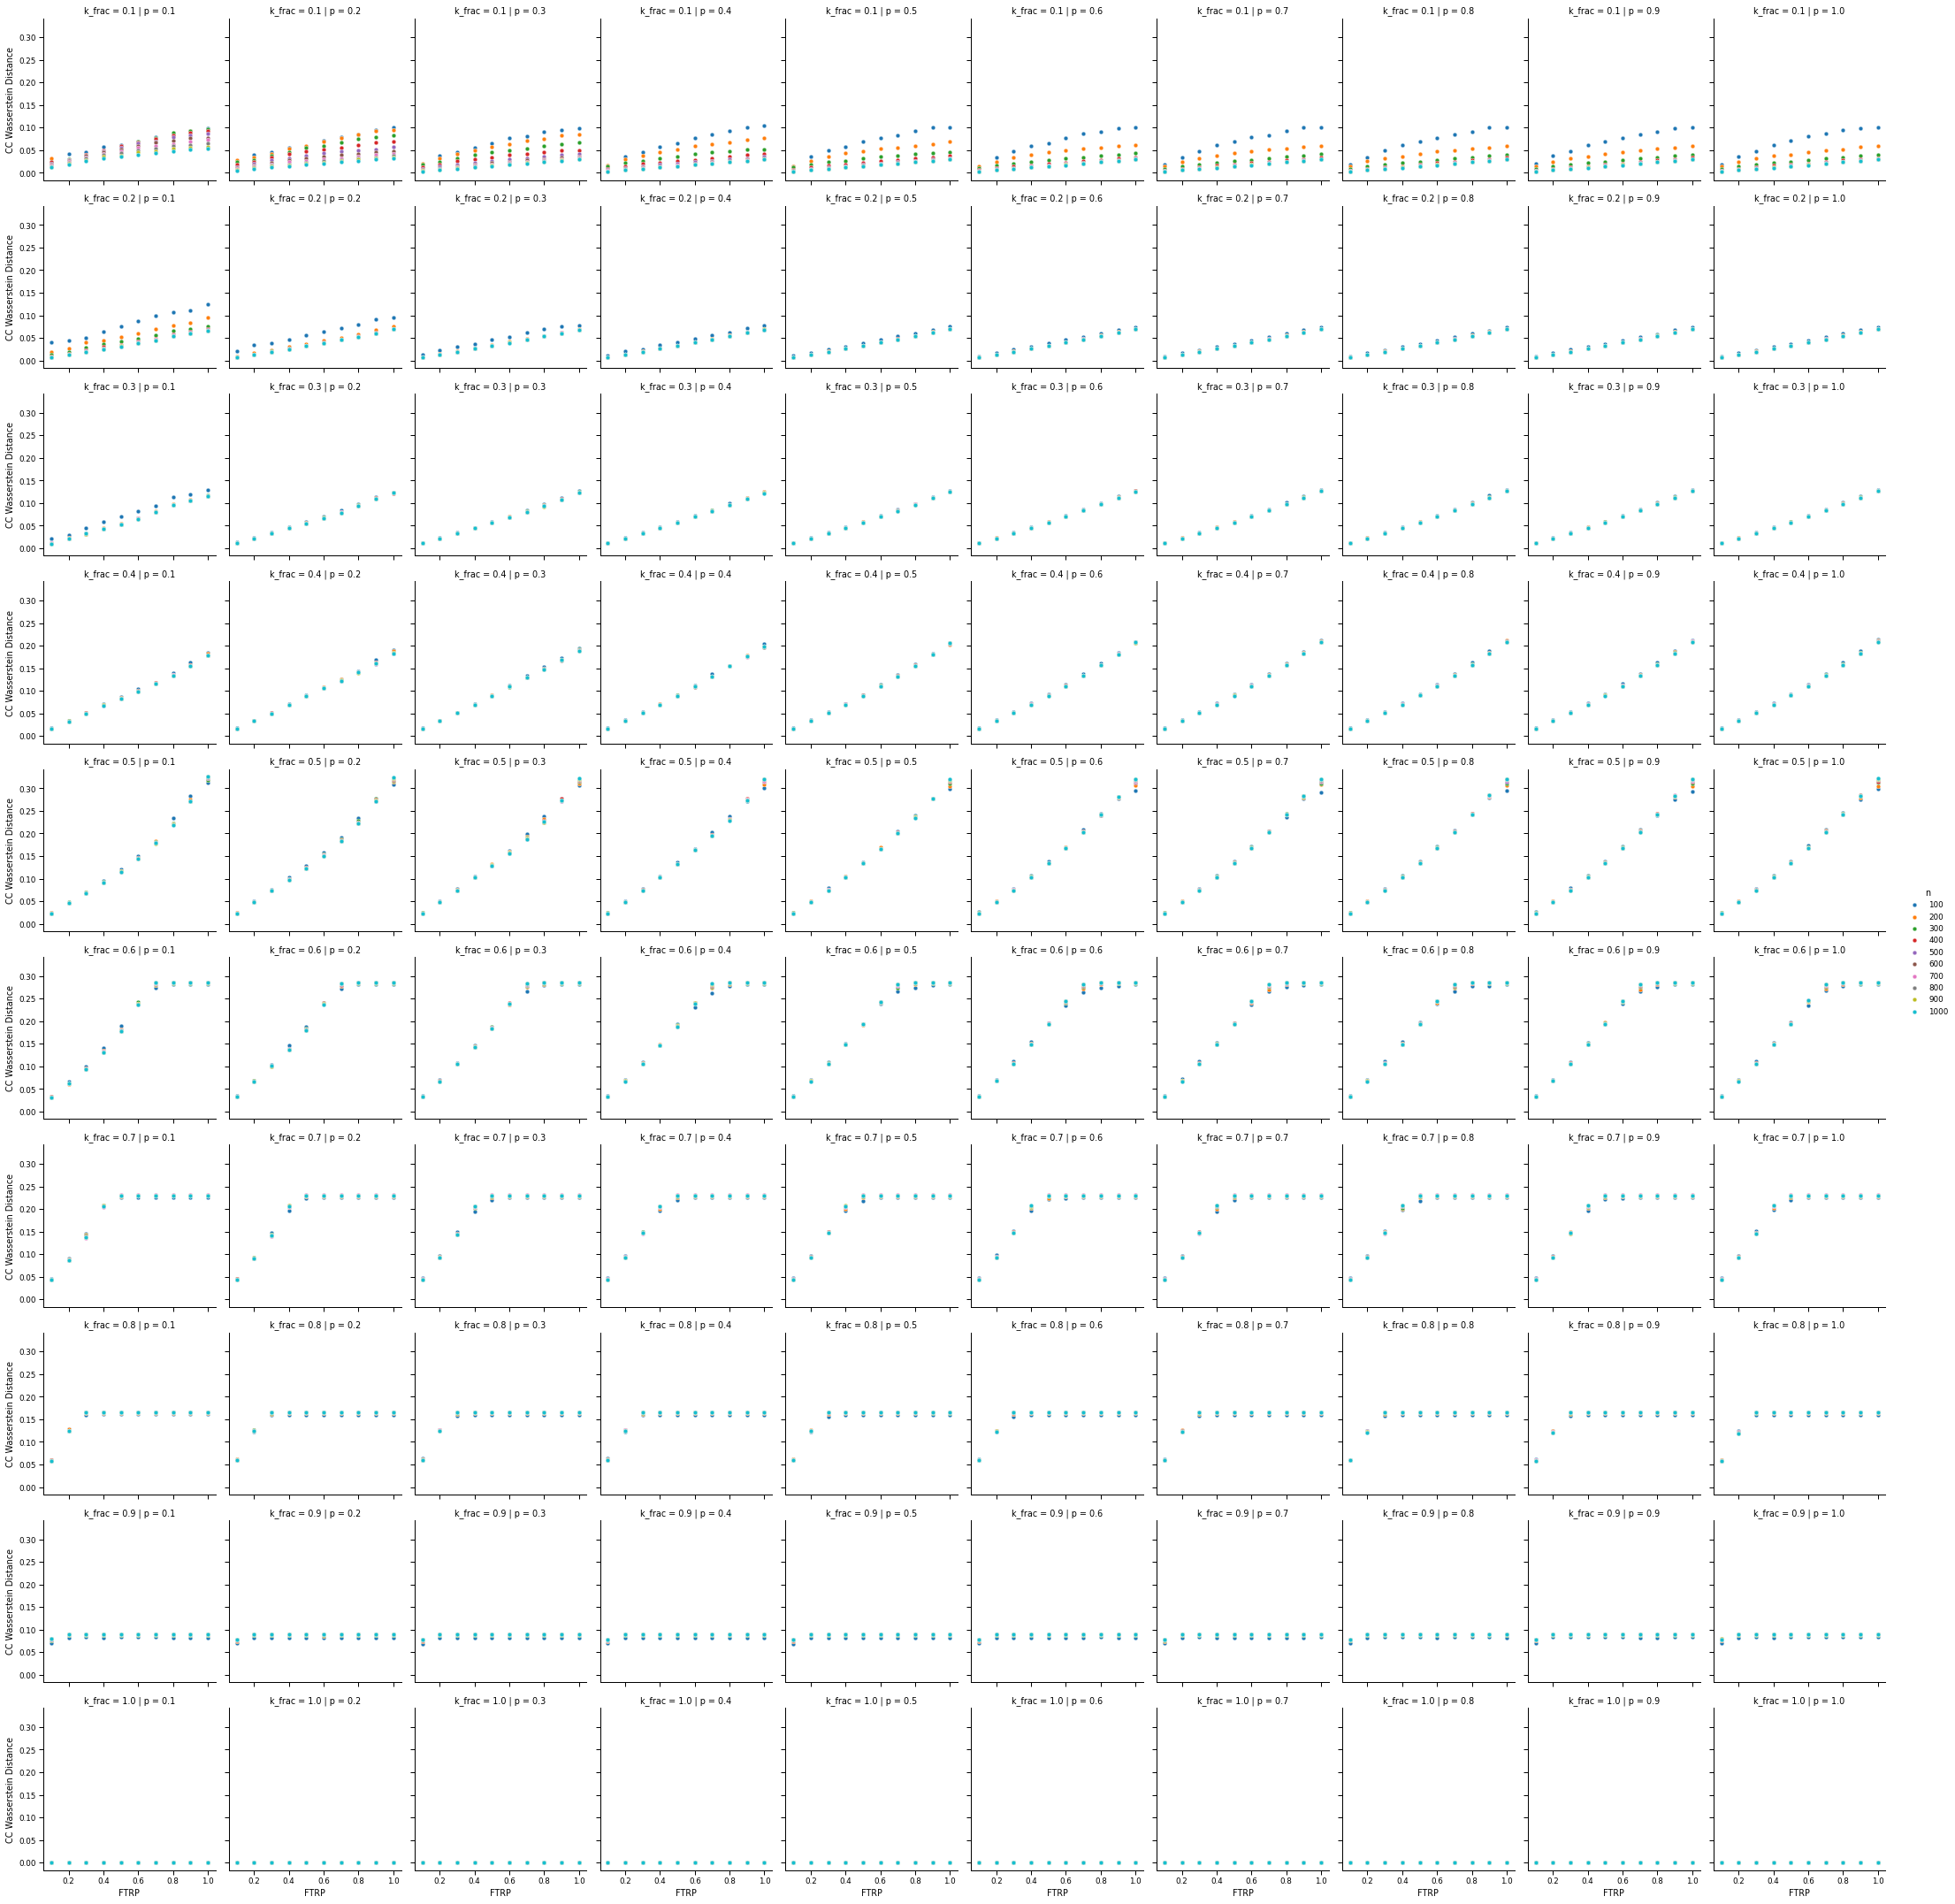

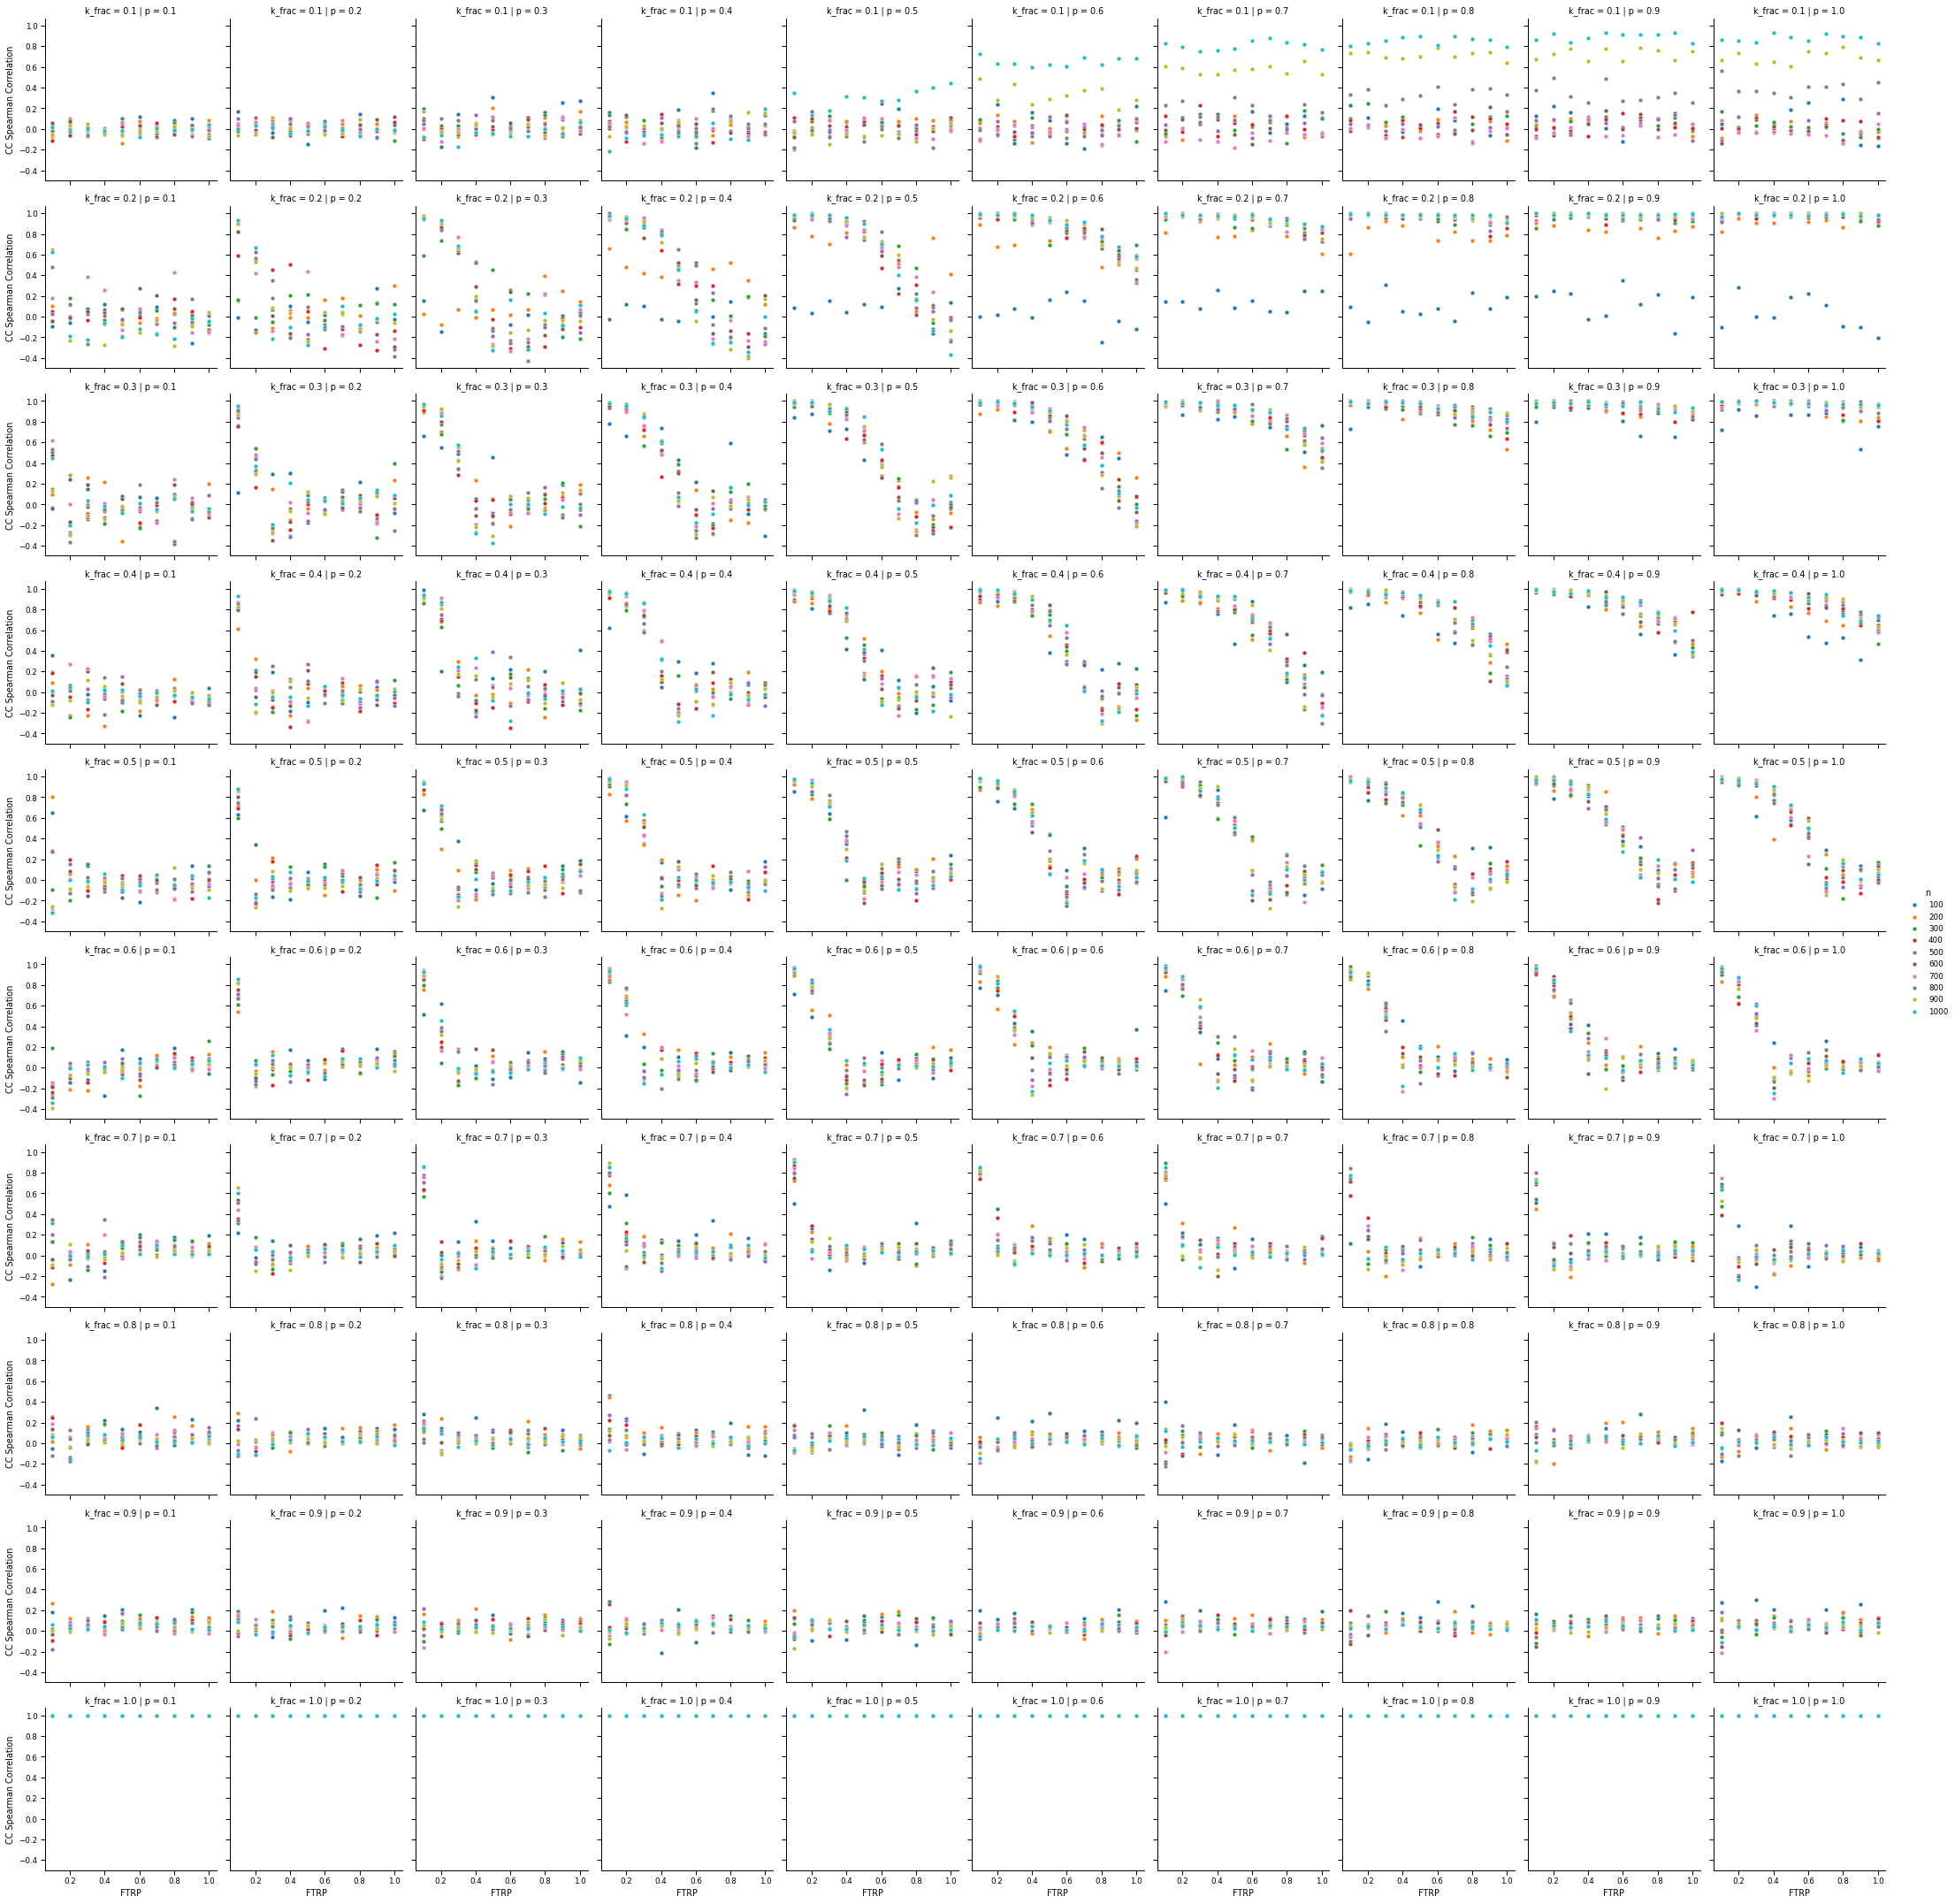

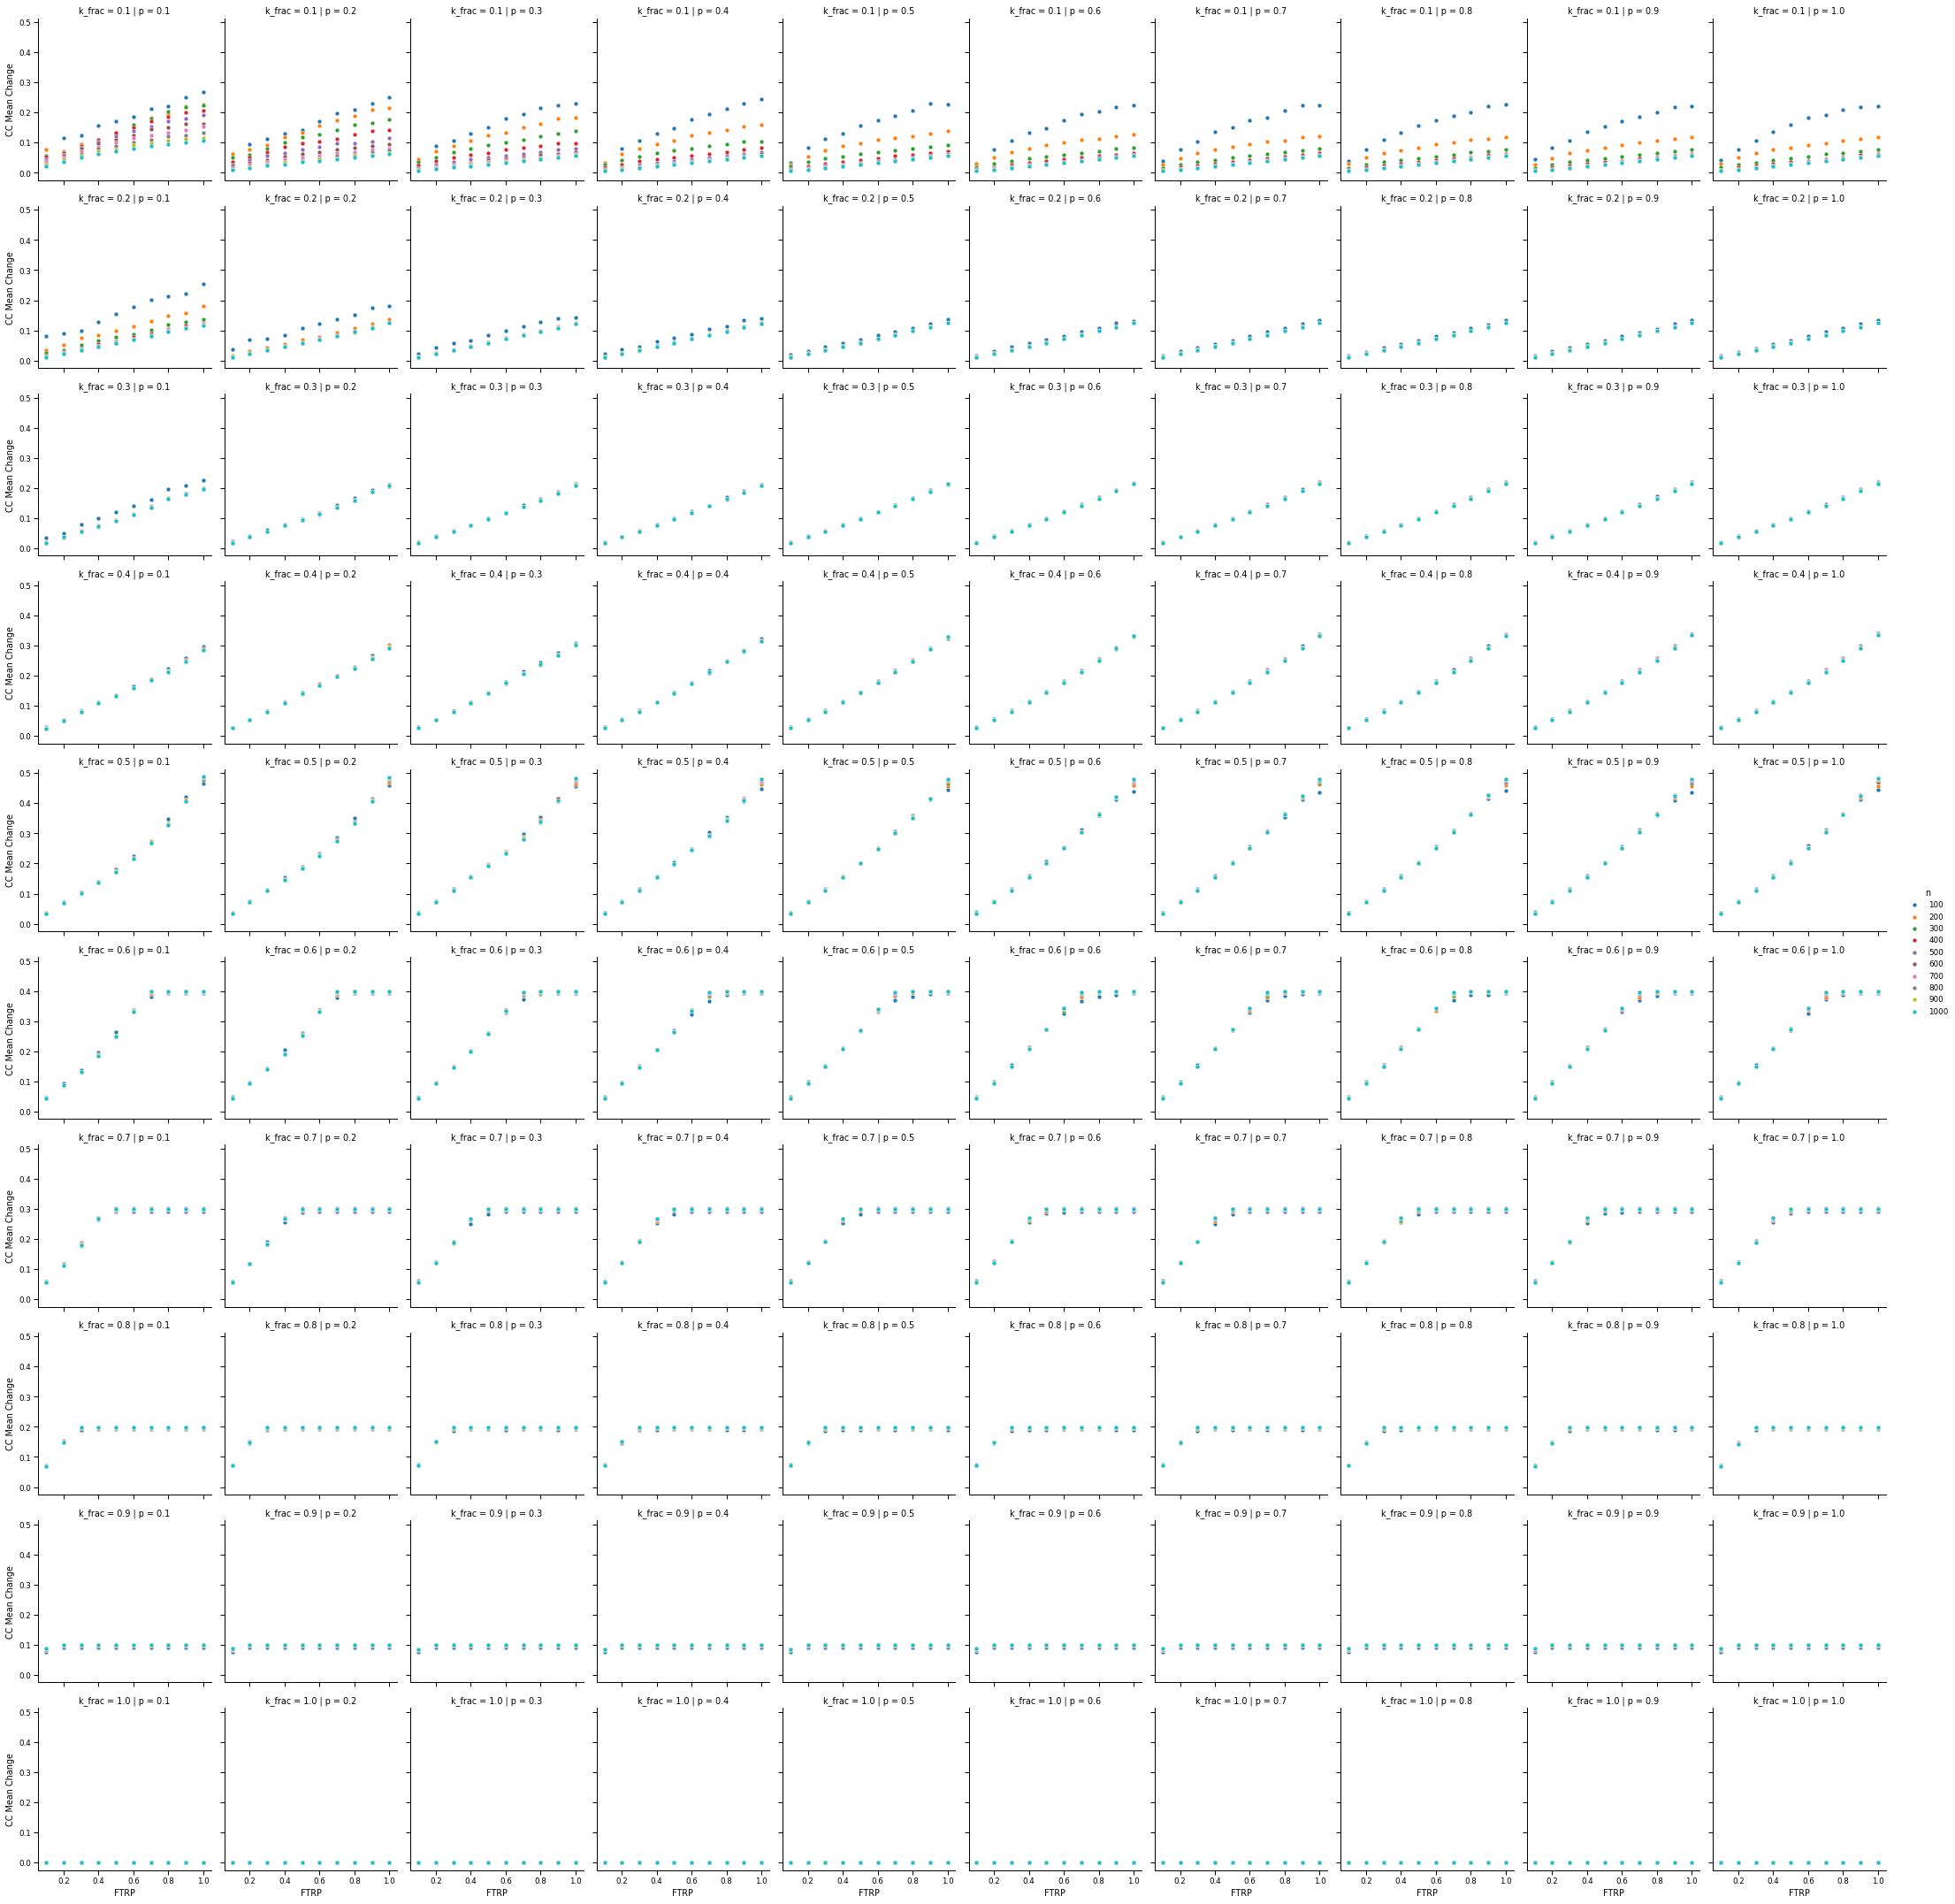

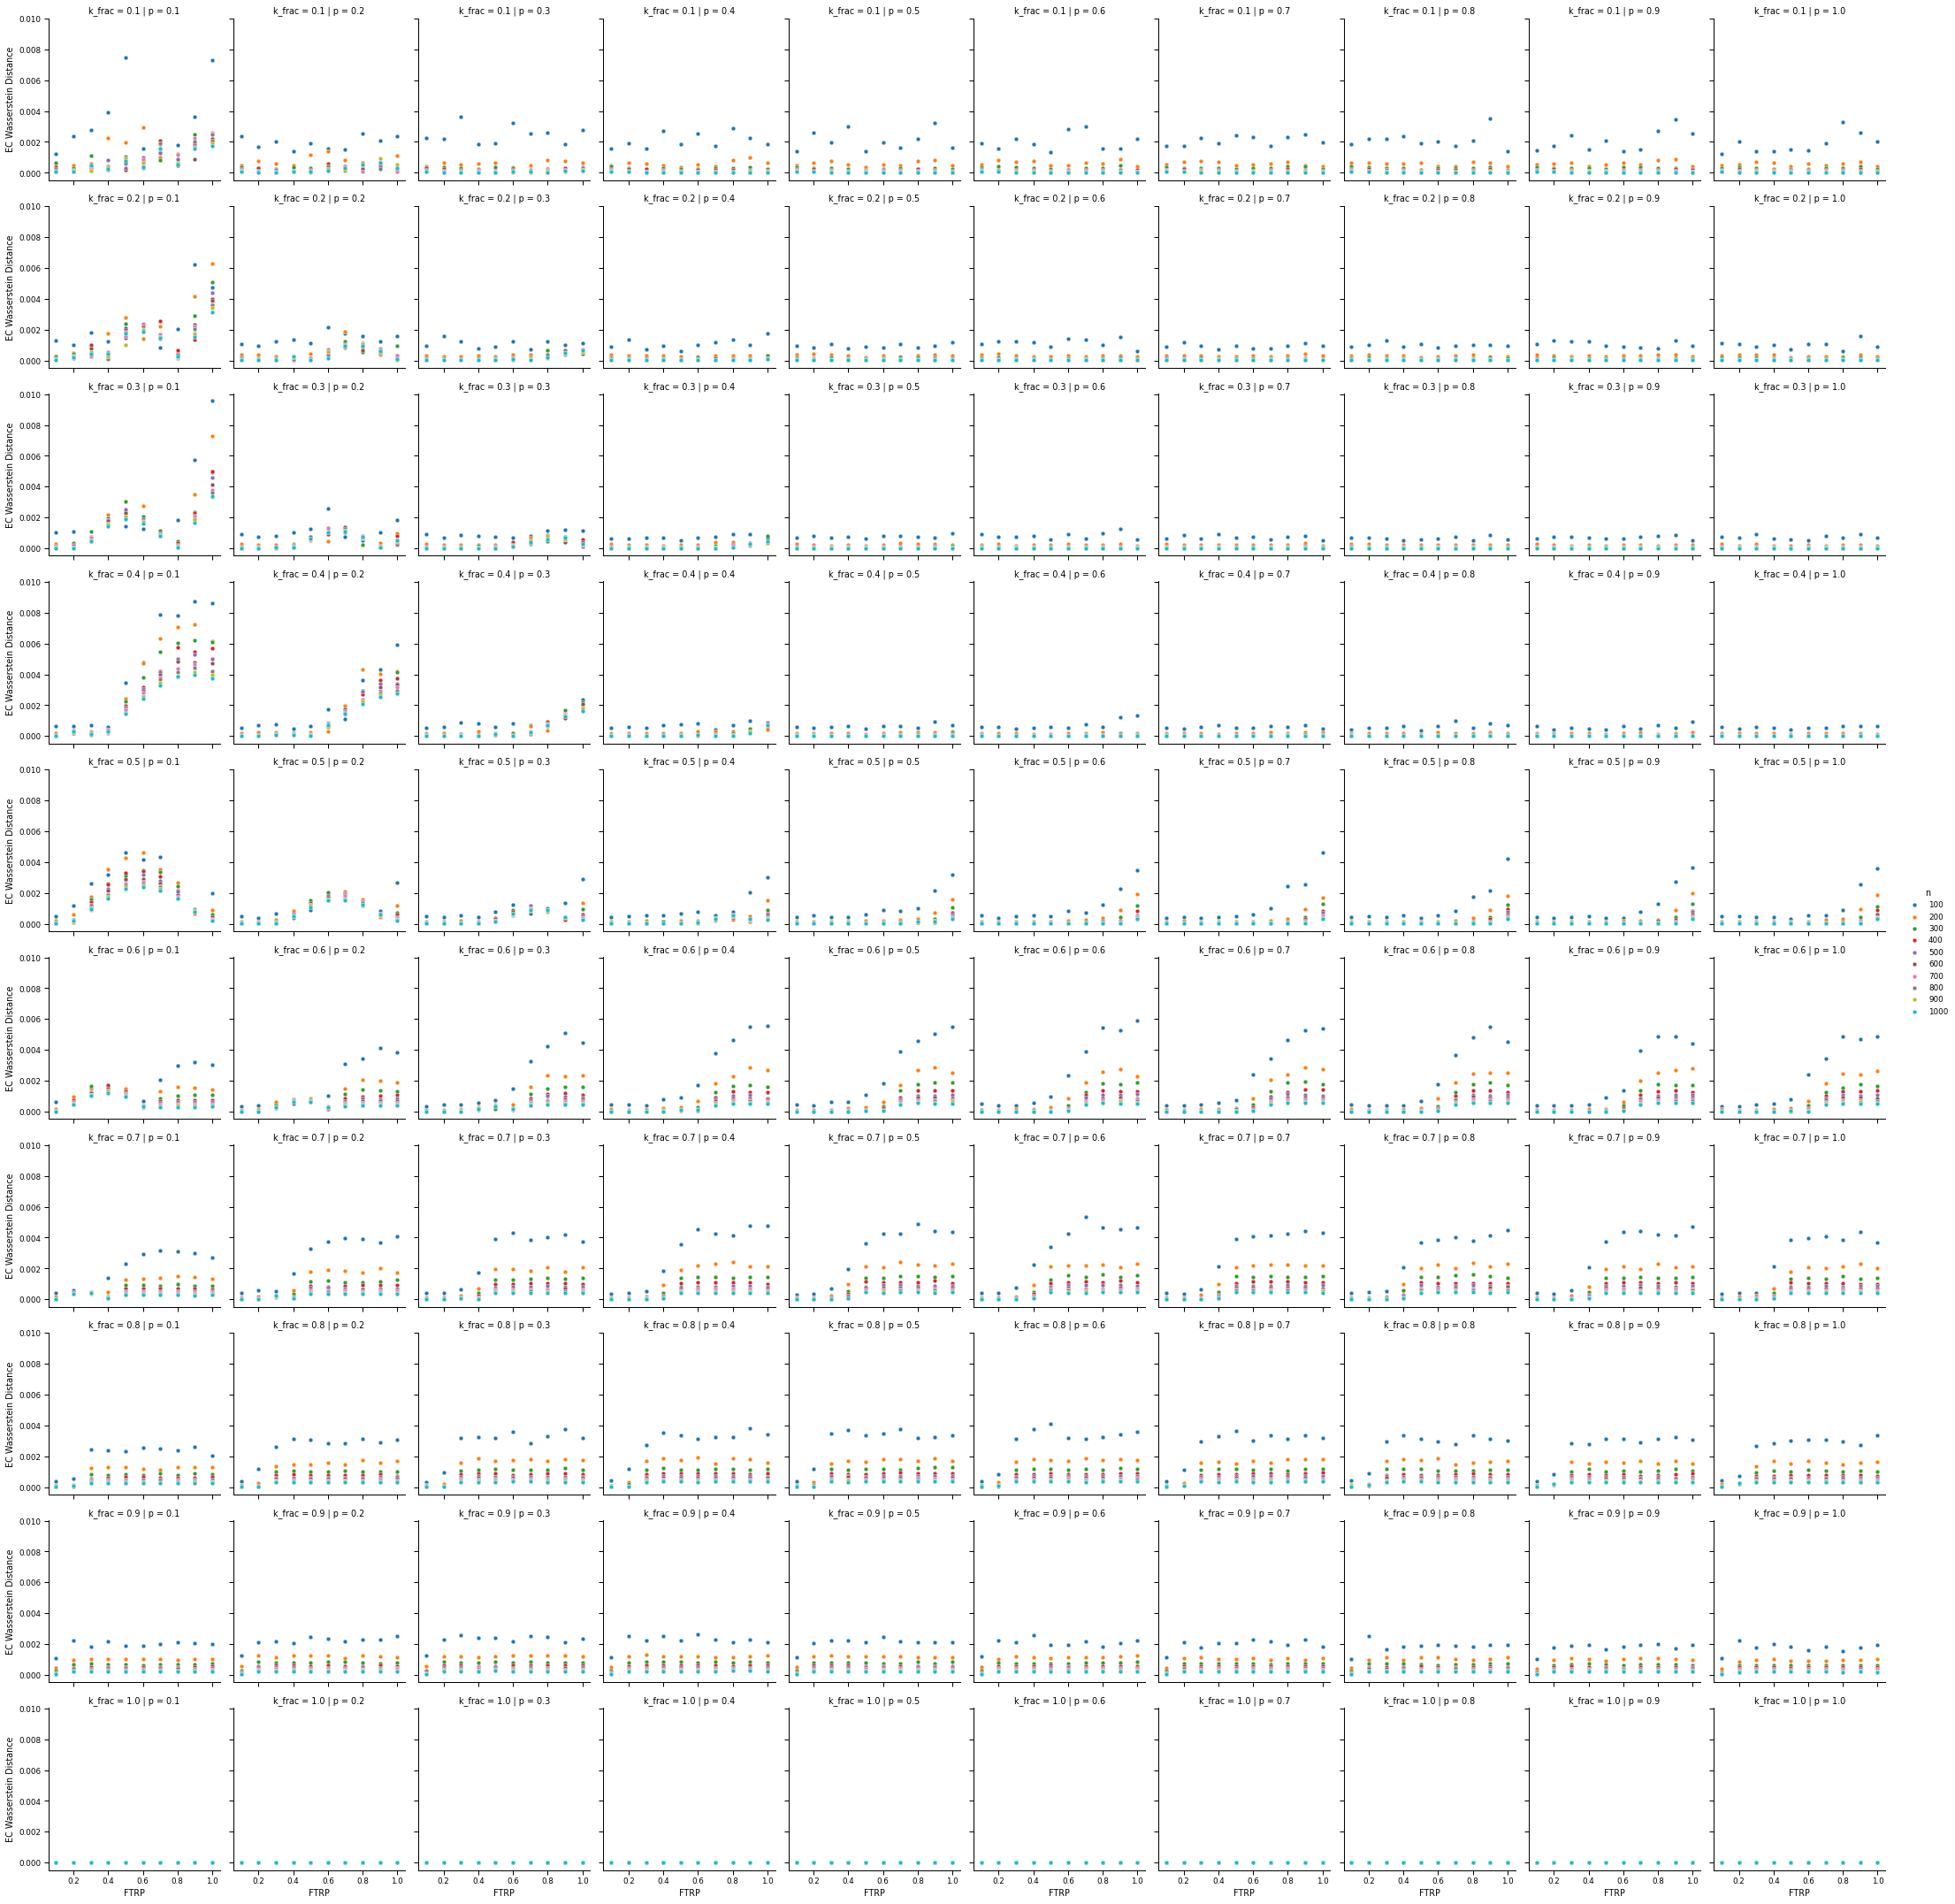

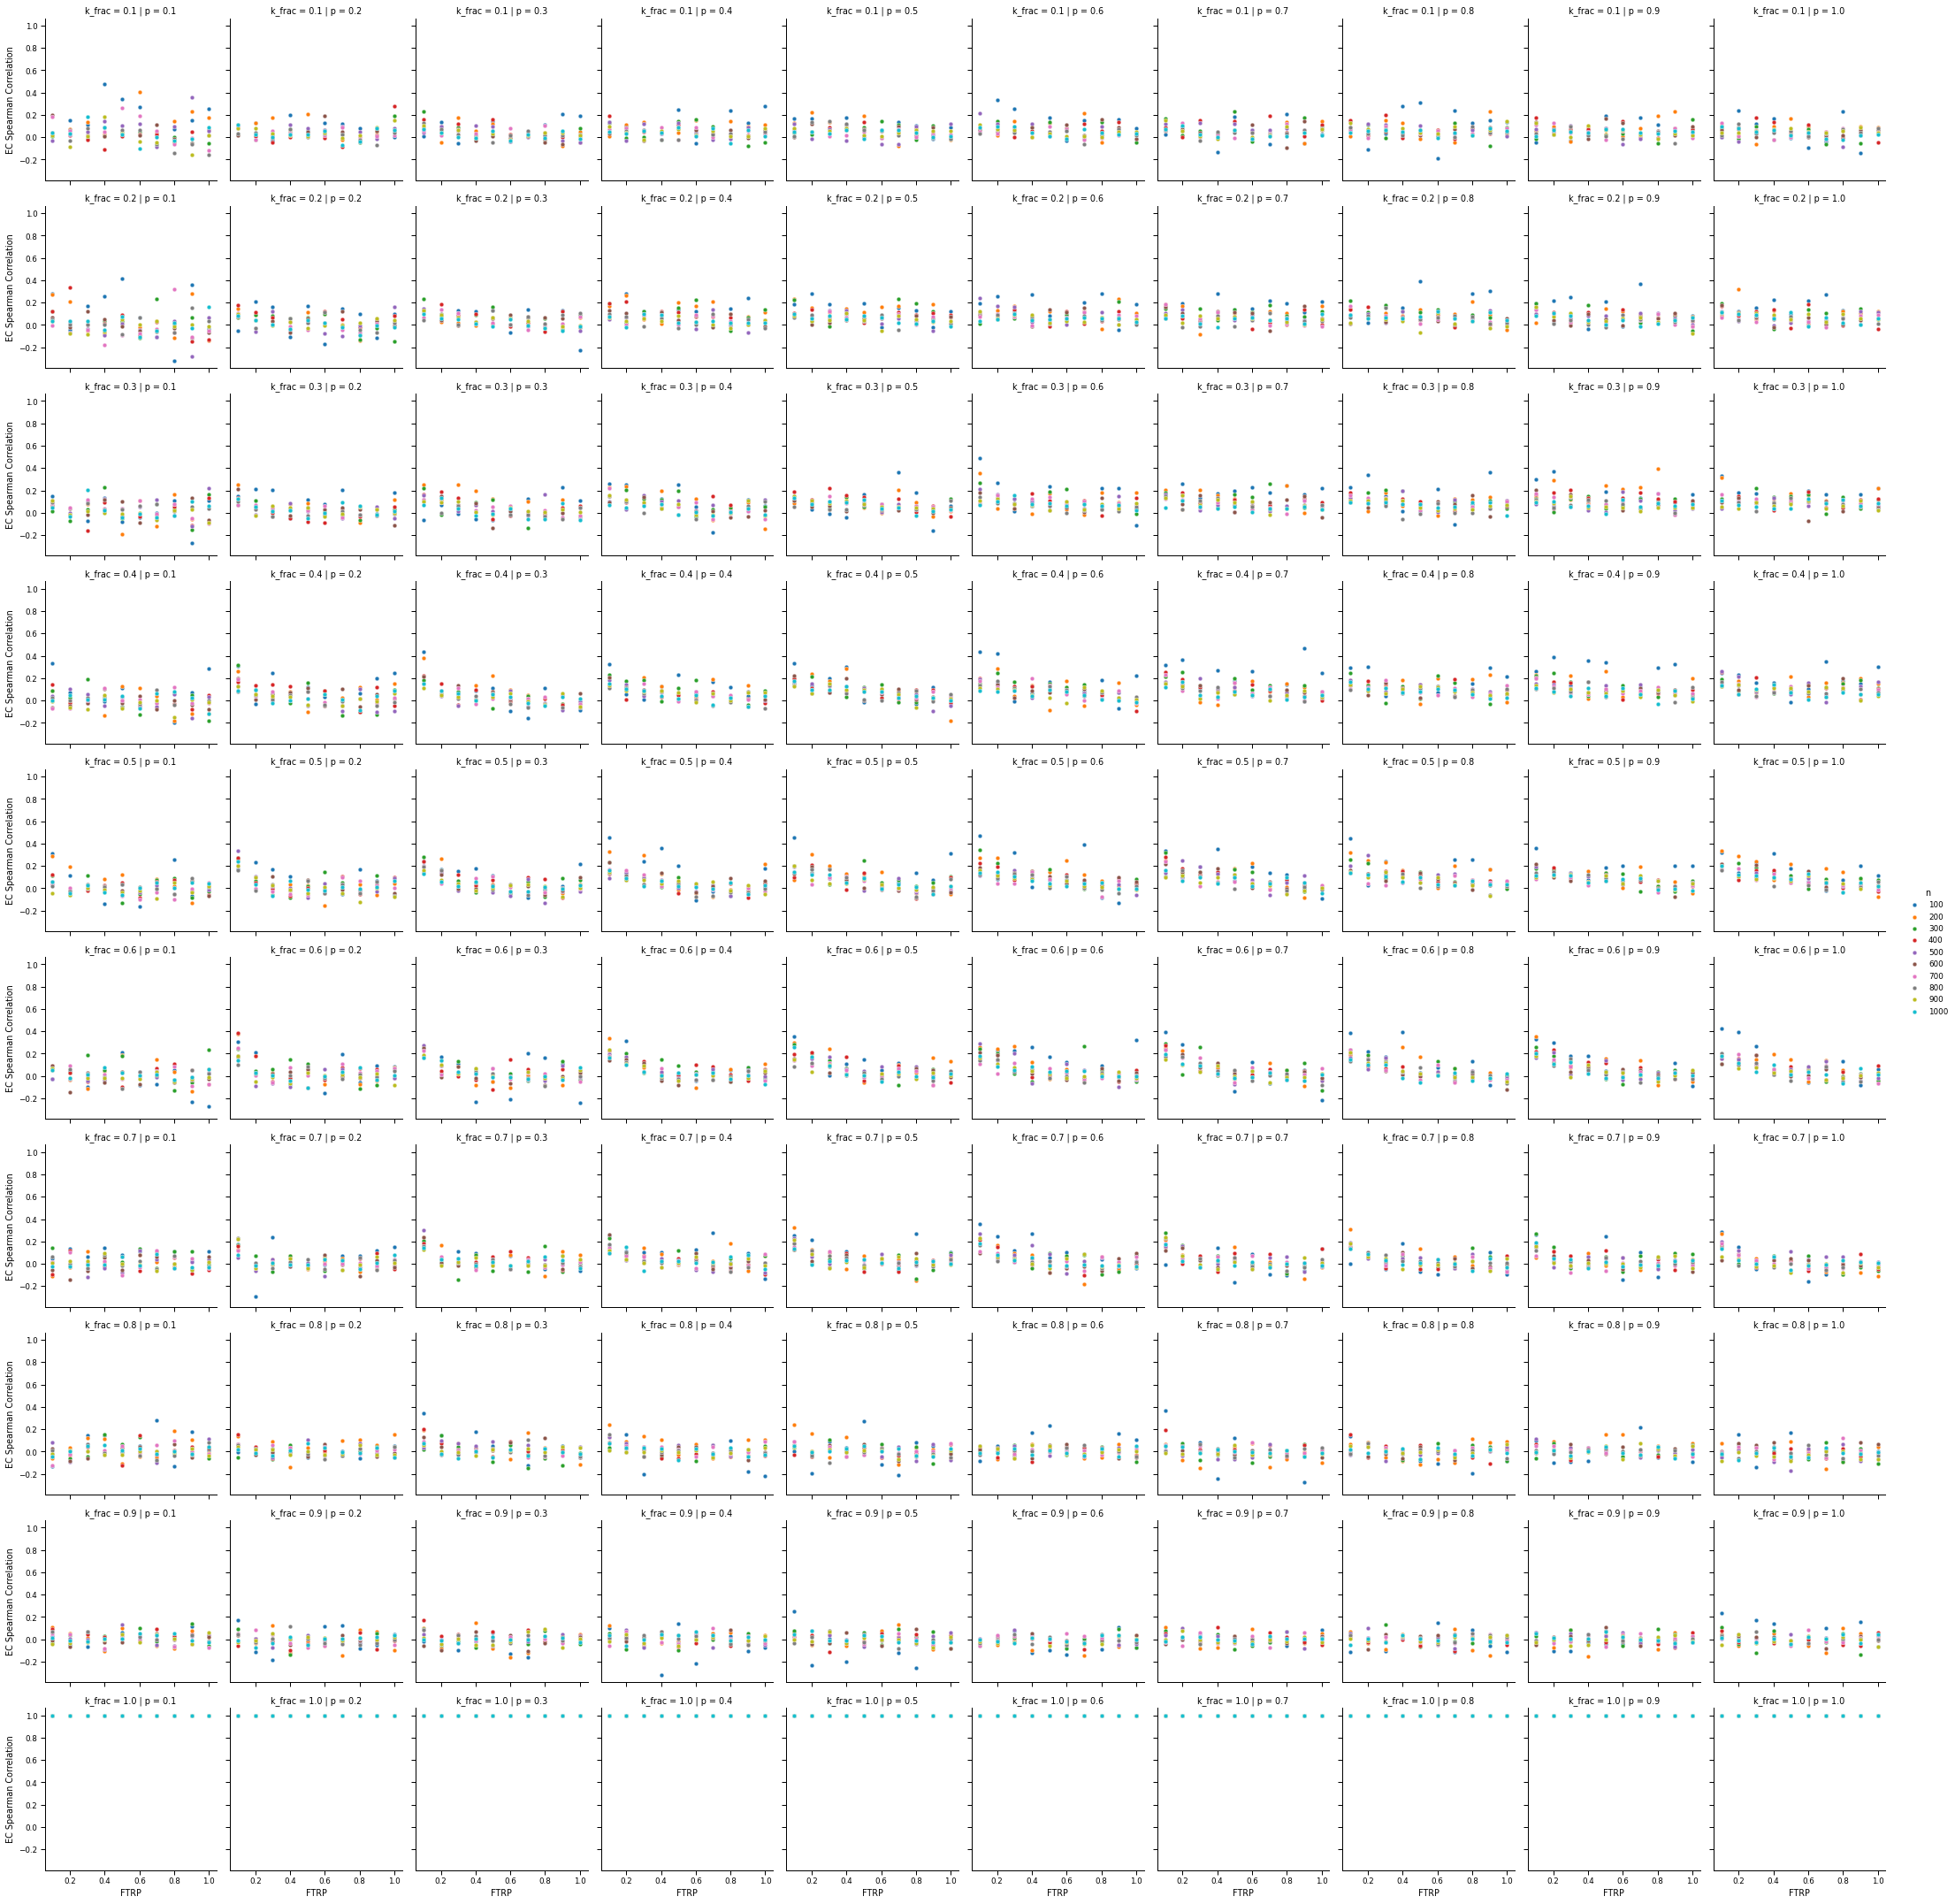

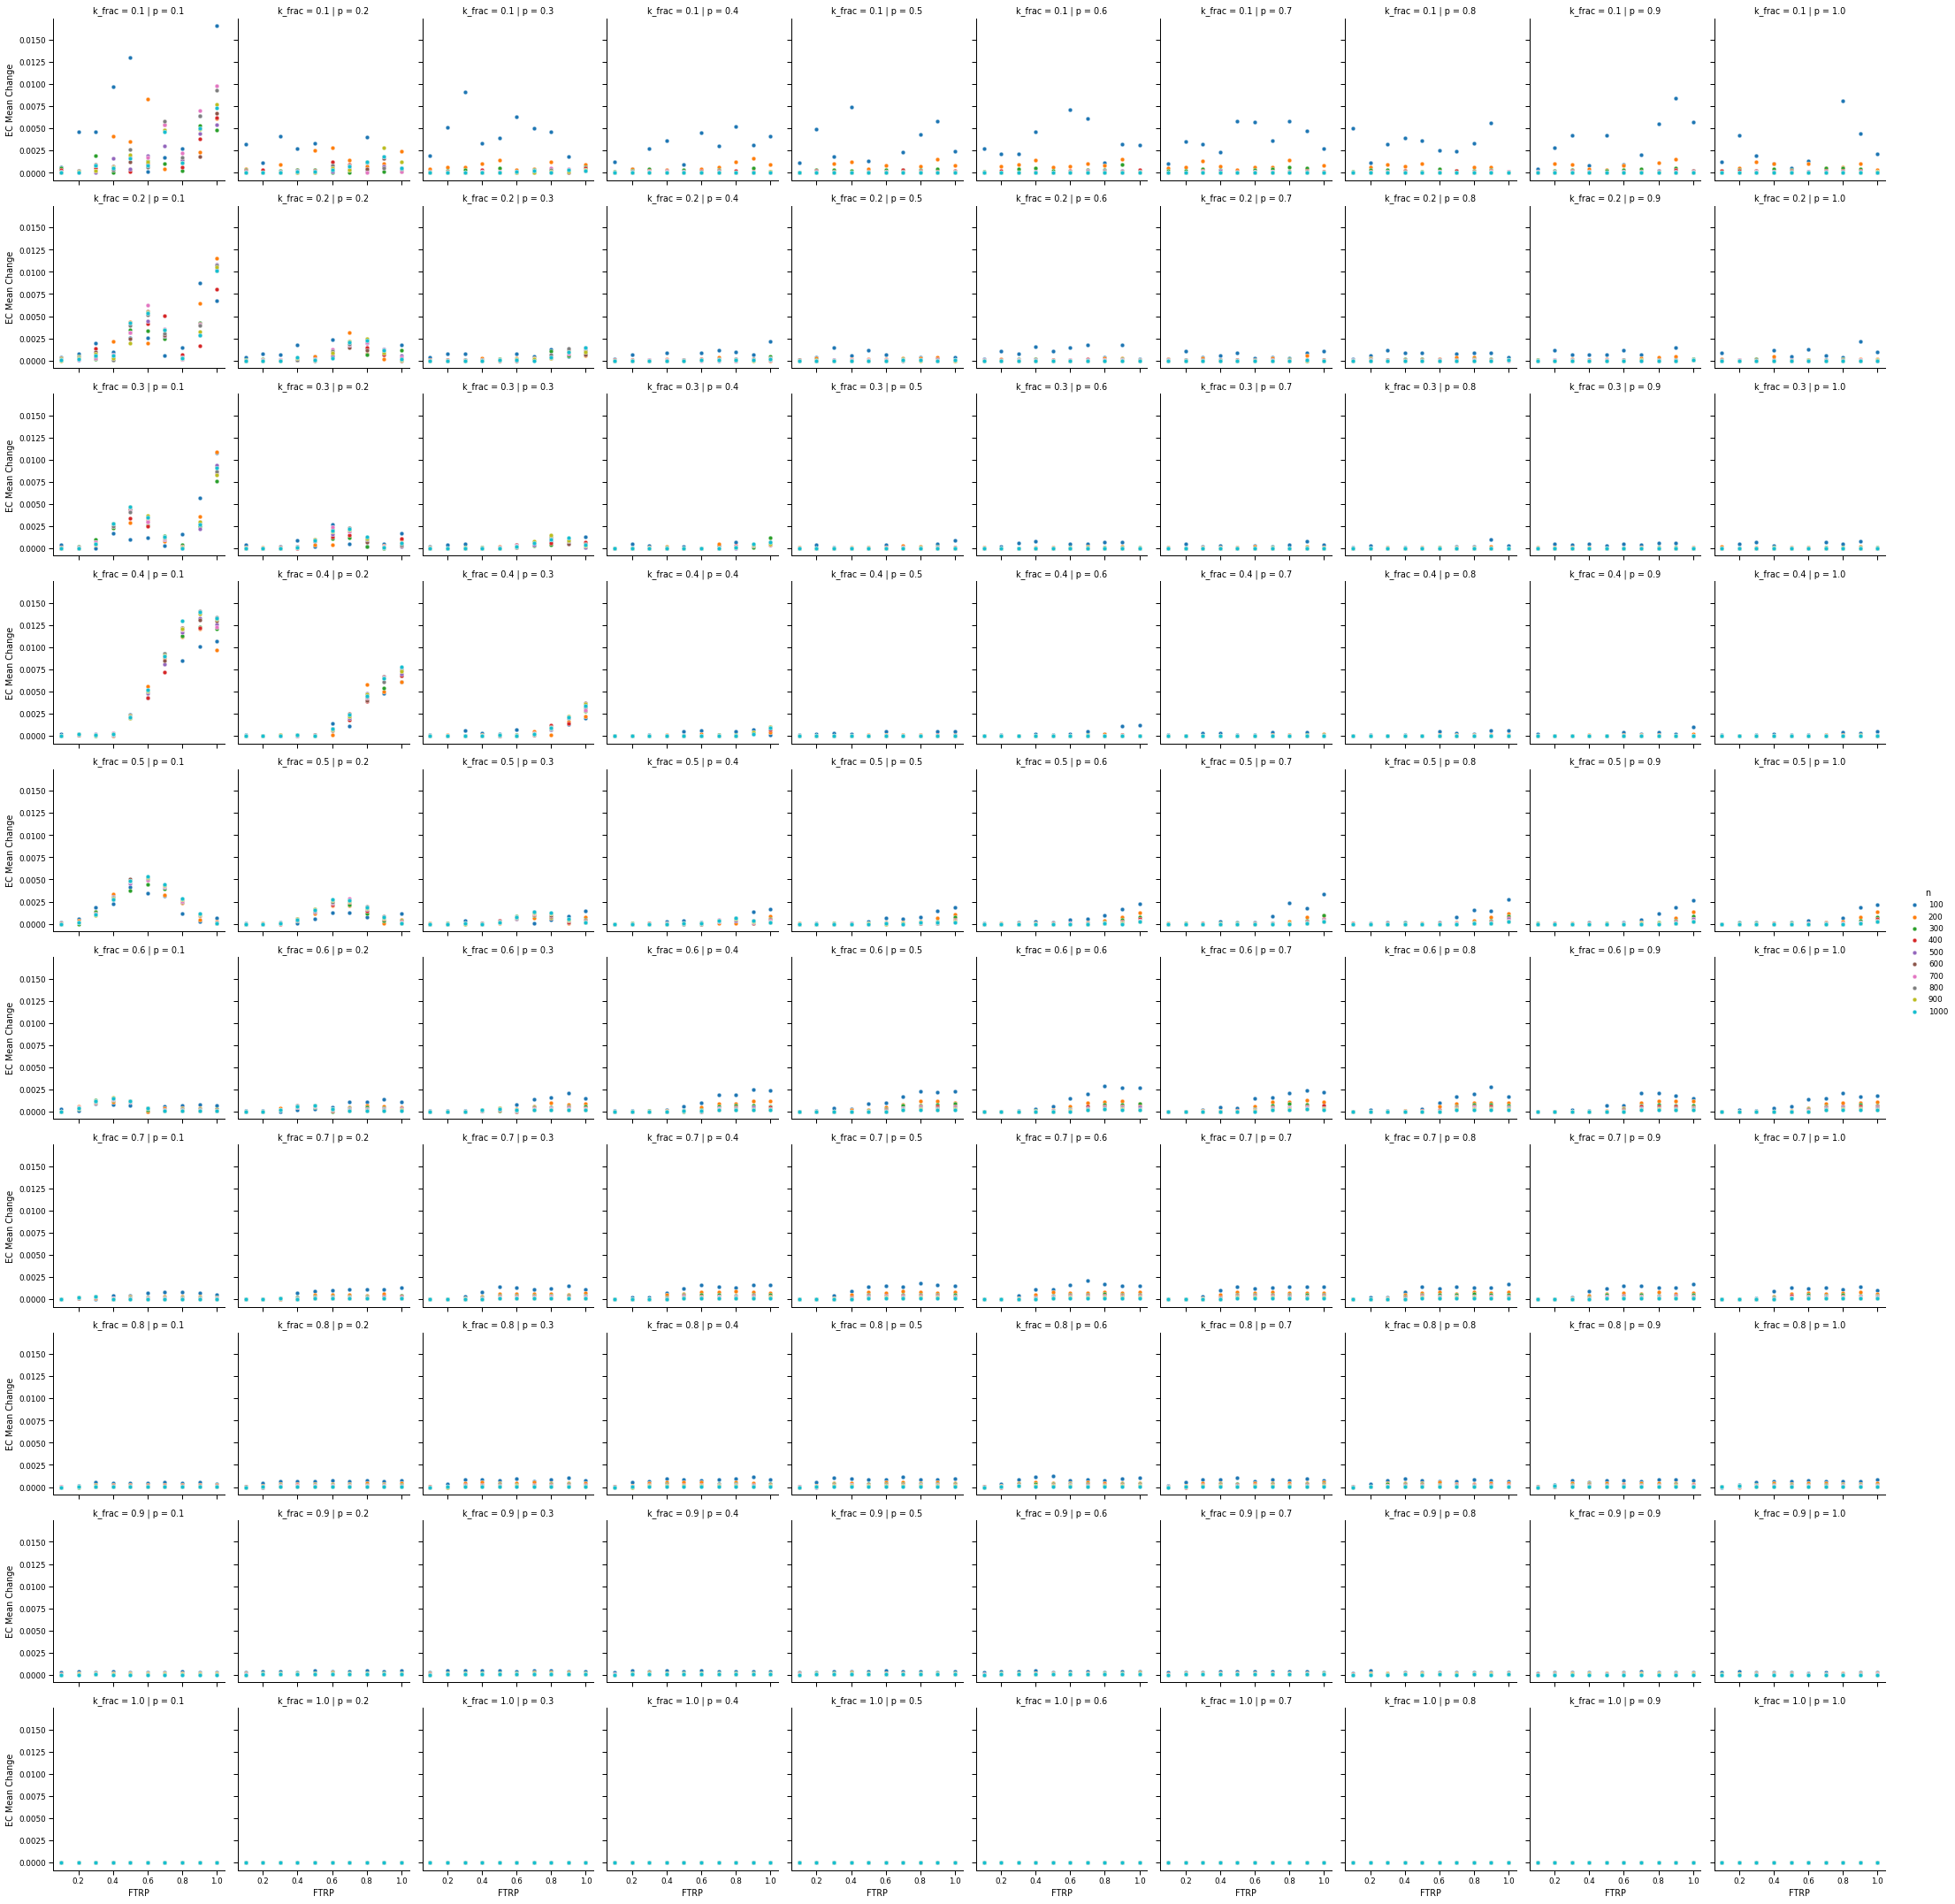

In [21]:
for metric in metrics:

    # Wasserstein distance
    g = sns.FacetGrid(ws_df, col='p', row="k_frac", hue="n")
    g.map(sns.scatterplot, "r", f"{metric}_distance")
    g.set_axis_labels("FTRP", f"{metric.upper()} Wasserstein Distance")
    g.add_legend()
    plt.savefig(f'images/ws/{metric}_distance.pdf', dpi=300, transparent=False)

    # Spearman Rank correlation
    g = sns.FacetGrid(ws_df, col='p', row="k_frac", hue="n")
    g.map(sns.scatterplot, "r", f"{metric}_correlation")
    g.set_axis_labels("FTRP", f"{metric.upper()} Spearman Correlation")
    g.add_legend()
    plt.savefig(f'images/ws/{metric}_correlation.pdf', dpi=300, transparent=False)

    # Mean change
    g = sns.FacetGrid(ws_df, col='p', row="k_frac", hue="n")
    g.map(sns.scatterplot, "r", f"{metric}_mean_change")
    g.set_axis_labels("FTRP", f"{metric.upper()} Mean Change")
    g.add_legend()
    plt.savefig(f'images/ws/{metric}_mean_change.pdf', dpi=300, transparent=False)

# Barabási Albert

In [22]:
path = "../results/BA.csv"
ba_df = pd.read_csv(path)
ba_df.head()

exp_name  sigma_mean  sigma_variance  uncertainty_mean  \
0  BA_100_0.1_0.1    1.123640        0.092635          7.498748   
1  BA_100_0.1_0.2    1.117905        0.013191         12.839354   
2  BA_100_0.1_0.3    1.080946        0.005930         16.709965   
3  BA_100_0.1_0.4    1.059383        0.002829         19.939063   
4  BA_100_0.1_0.5    1.020371        0.001893         22.338039   

   uncertainty_variance  dc_distance  dc_correlation  dc_mean_change  \
0             18.047533     0.020000        0.849469        0.110000   
1             55.252868     0.040202        0.997168        0.221111   
2             88.620151     0.058586        0.928905        0.322222   
3            130.330461     0.076566        1.000000        0.421111   
4            141.301368     0.091717        0.999892        0.504444   

   bc_distance  bc_correlation  bc_mean_change  cc_distance  cc_correlation  \
0     0.000447        0.624902        0.043571     0.011120        0.759424   
1     0.000802        0.570945        0.080527     0.021251        0.732805   
2     0.001096        0.668275        0.117716     0.031607        0.744314   
3     0.001176        0.641332        0.131902     0.036539        0.718416   
4     0.001327        0.604488        0.149469     0.041688        0.622478   

   cc_mean_change  ec_distance  ec_correlation  ec_mean_change  
0        0.020519     0.001645        0.901494        0.004957  
1        0.039280     0.003061        0.797120        0.015414  
2        0.058700     0.002745        0.786547        0.011342  
3        0.067486     0.003659        0.847465        0.017315  
4        0.076996     0.003018        0.734569        0.014721

In [23]:
ba_df[['model', 'n', 'm_frac', 'r']] = ba_df.exp_name.str.split('_', expand=True)
ba_df = ba_df.drop(['exp_name', 'model'], axis=1)
ba_df.head(1)

sigma_mean  sigma_variance  uncertainty_mean  uncertainty_variance  \
0     1.12364        0.092635          7.498748             18.047533   

   dc_distance  dc_correlation  dc_mean_change  bc_distance  bc_correlation  \
0         0.02        0.849469            0.11     0.000447        0.624902   

   bc_mean_change  cc_distance  cc_correlation  cc_mean_change  ec_distance  \
0        0.043571      0.01112        0.759424        0.020519     0.001645   

   ec_correlation  ec_mean_change    n m_frac    r  
0        0.901494        0.004957  100    0.1  0.1

In [24]:
ba_df.n = ba_df.n.astype(int)
ba_df.m_frac = ba_df.m_frac.astype(float)
ba_df.r = ba_df.r.astype(float)
ba_df.dtypes

sigma_mean              float64
sigma_variance          float64
uncertainty_mean        float64
uncertainty_variance    float64
dc_distance             float64
dc_correlation          float64
dc_mean_change          float64
bc_distance             float64
bc_correlation          float64
bc_mean_change          float64
cc_distance             float64
cc_correlation          float64
cc_mean_change          float64
ec_distance             float64
ec_correlation          float64
ec_mean_change          float64
n                         int64
m_frac                  float64
r                       float64
dtype: object

In [25]:
count_missing_values(ba_df)


missing_observations percentage
sigma_mean                              0       0.0%
sigma_variance                          0       0.0%
uncertainty_mean                        0       0.0%
uncertainty_variance                    0       0.0%
dc_distance                             0       0.0%
dc_correlation                          0       0.0%
dc_mean_change                          0       0.0%
bc_distance                             0       0.0%
bc_correlation                          0       0.0%
bc_mean_change                          0       0.0%
cc_distance                             0       0.0%
cc_correlation                          0       0.0%
cc_mean_change                          0       0.0%
ec_distance                             0       0.0%
ec_correlation                          0       0.0%
ec_mean_change                          0       0.0%
n                                       0       0.0%
m_frac                                  0       0.0%
r                                       0       0.0%

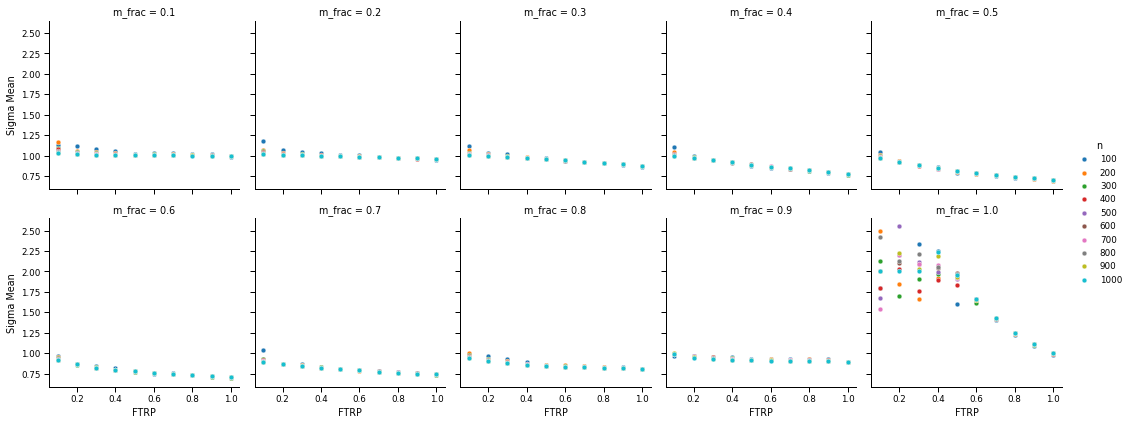

In [26]:

# SIGMA MEAN
g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "sigma_mean")
g.set_axis_labels("FTRP", "Sigma Mean")
g.add_legend()
plt.savefig('images/ba/sigma_mean.pdf', dpi=300, transparent=False);

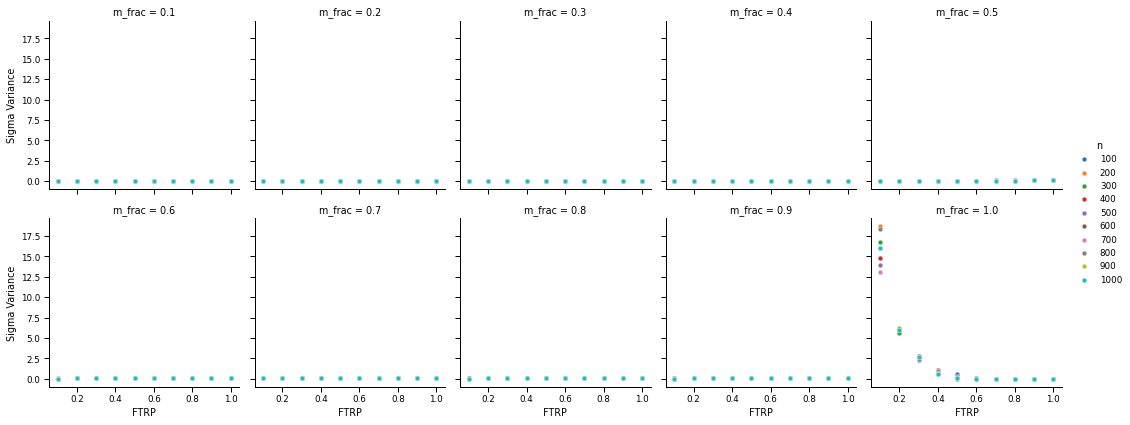

In [27]:
# SIGMA VARIANCE
g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "sigma_variance")
g.set_axis_labels("FTRP", "Sigma Variance")
g.add_legend()
plt.savefig('images/ba/sigma_variance.pdf', dpi=300, transparent=False);


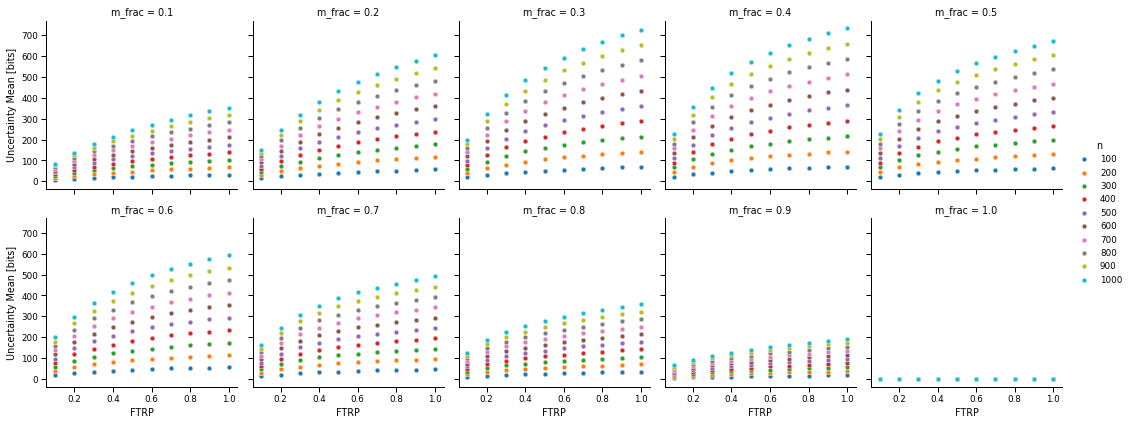

In [28]:
# UNCERTAINTY MEAN
g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "uncertainty_mean")
g.set_axis_labels("FTRP", "Uncertainty Mean [bits]")
g.add_legend()
plt.savefig('images/ba/uncertainty_mean.pdf', dpi=300, transparent=False);

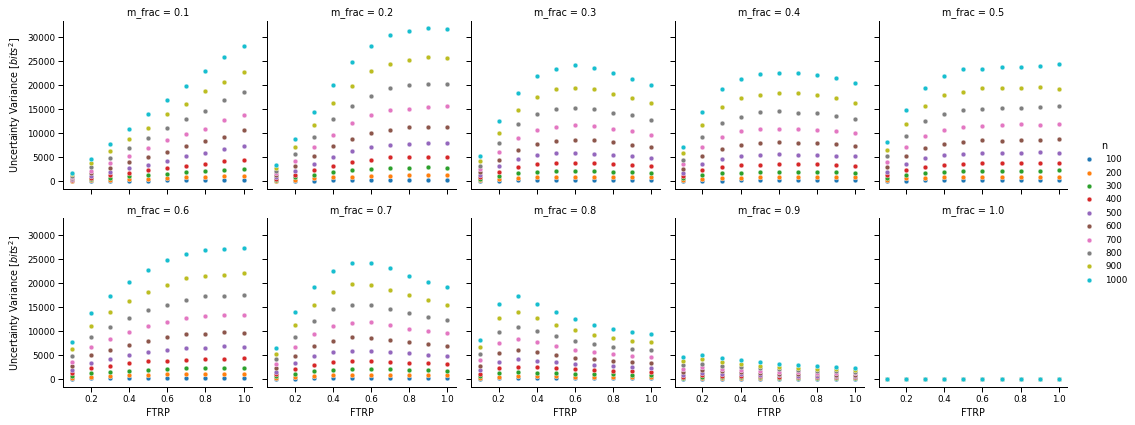

In [29]:
# UNCERTAINTY VARIANCE
g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
g.map(sns.scatterplot, "r", "uncertainty_variance")
g.set_axis_labels("FTRP", r"Uncertainty Variance [$bits^2$]")
g.add_legend()
plt.savefig('images/ba/uncertainty_variance.pdf', dpi=300, transparent=False);

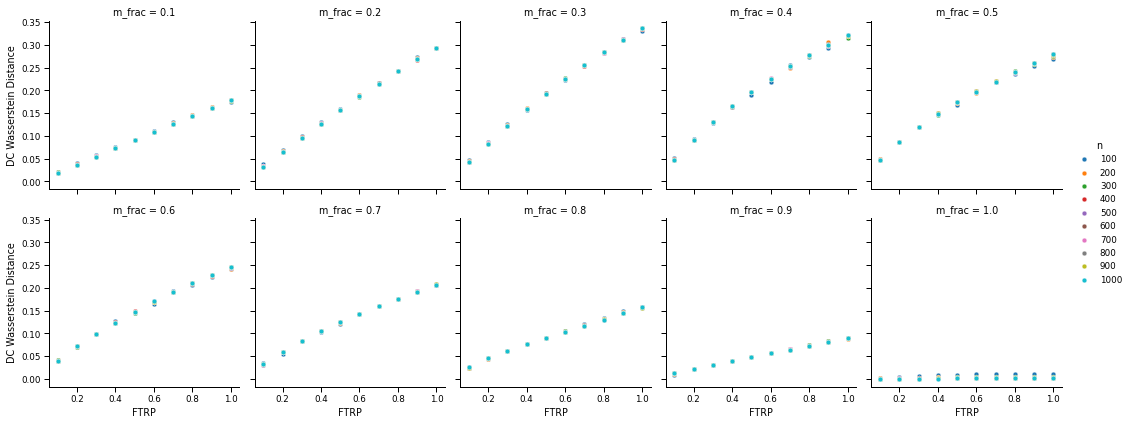

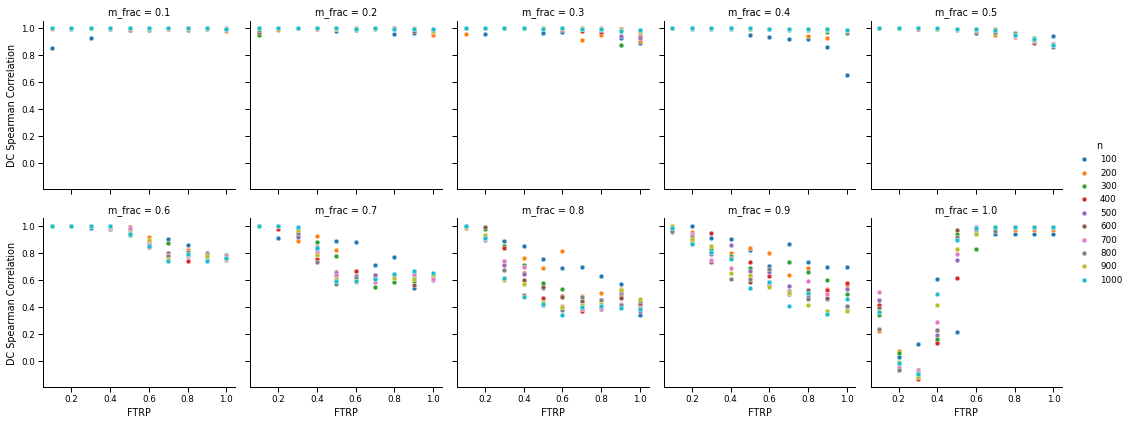

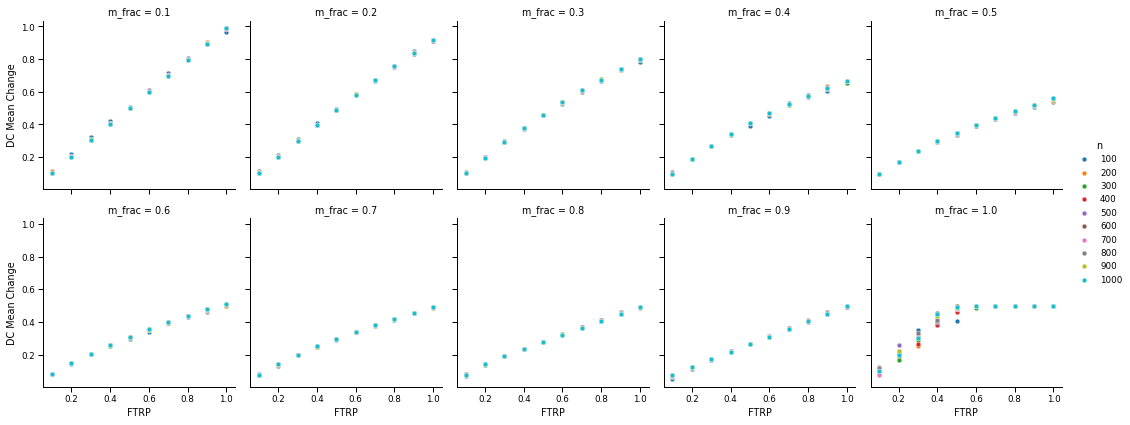

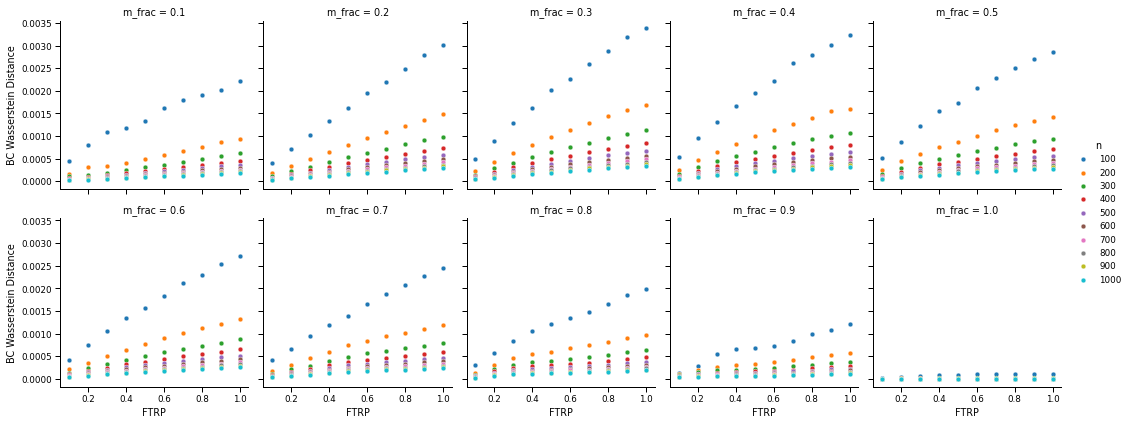

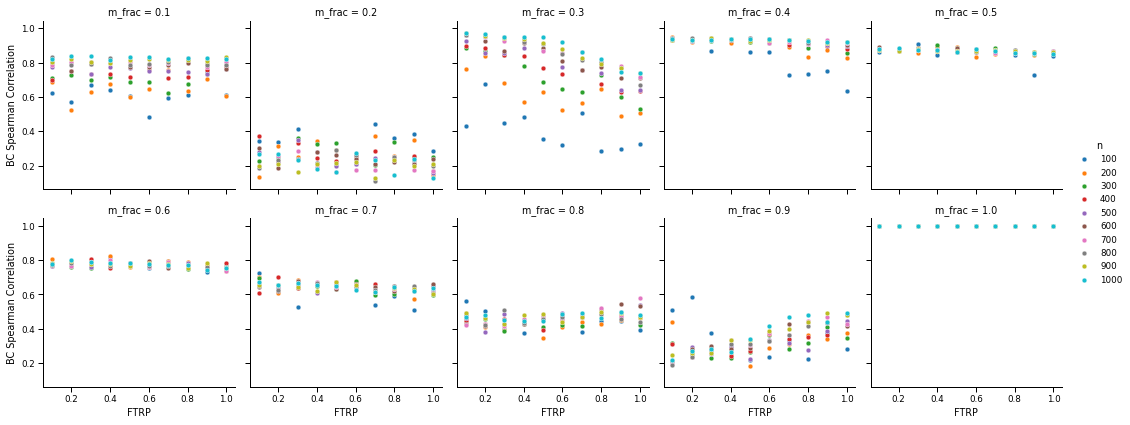

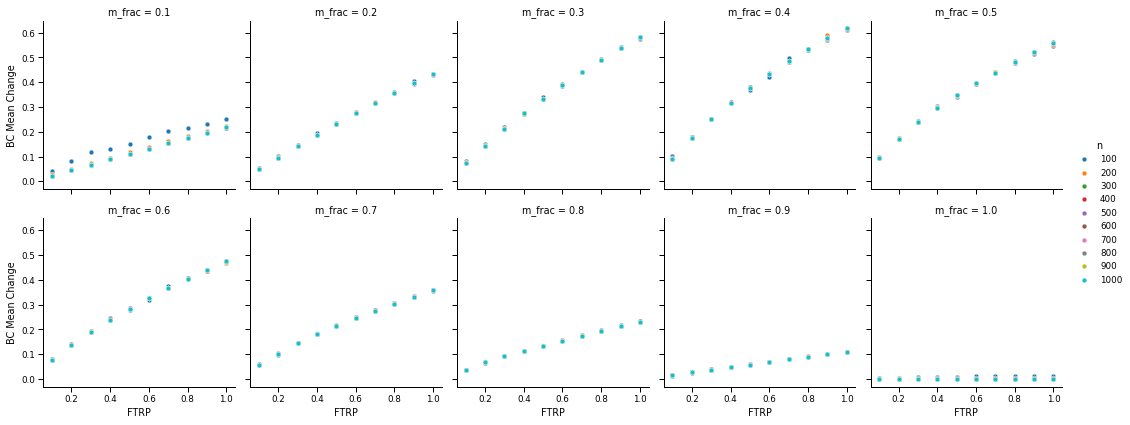

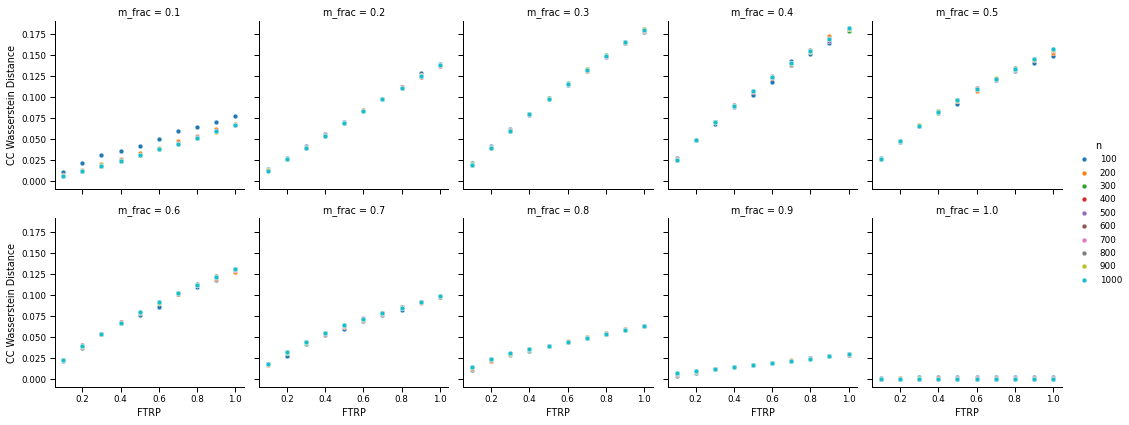

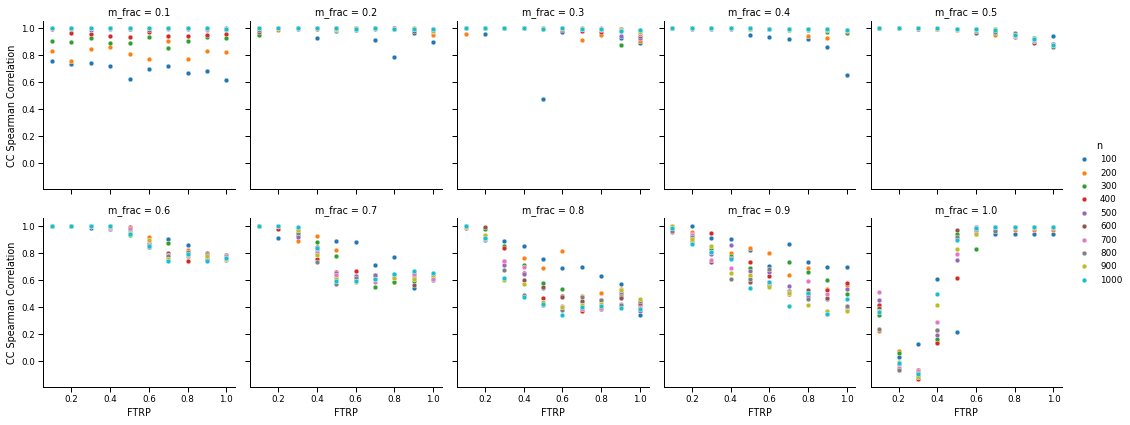

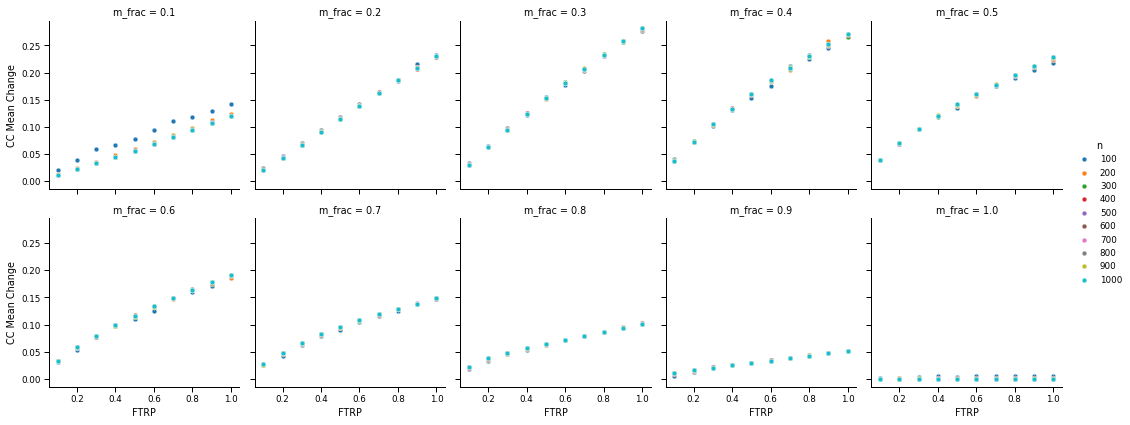

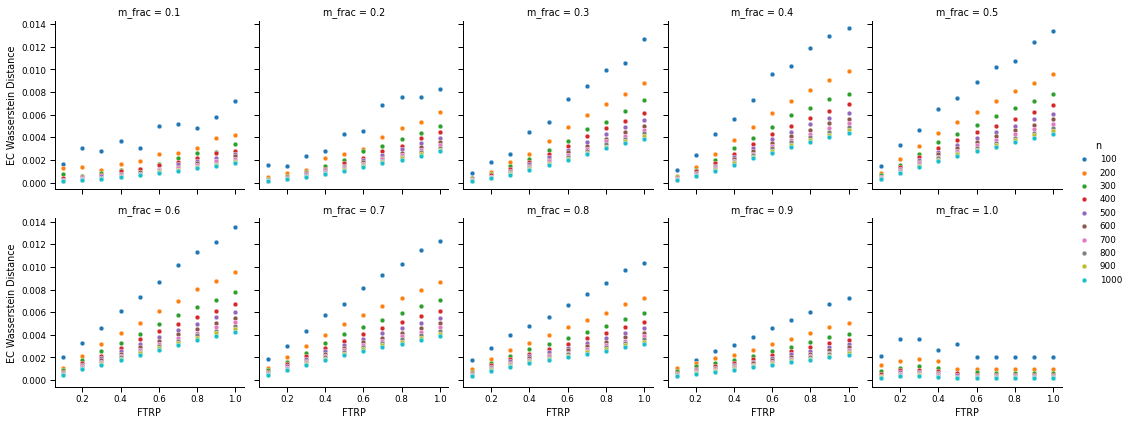

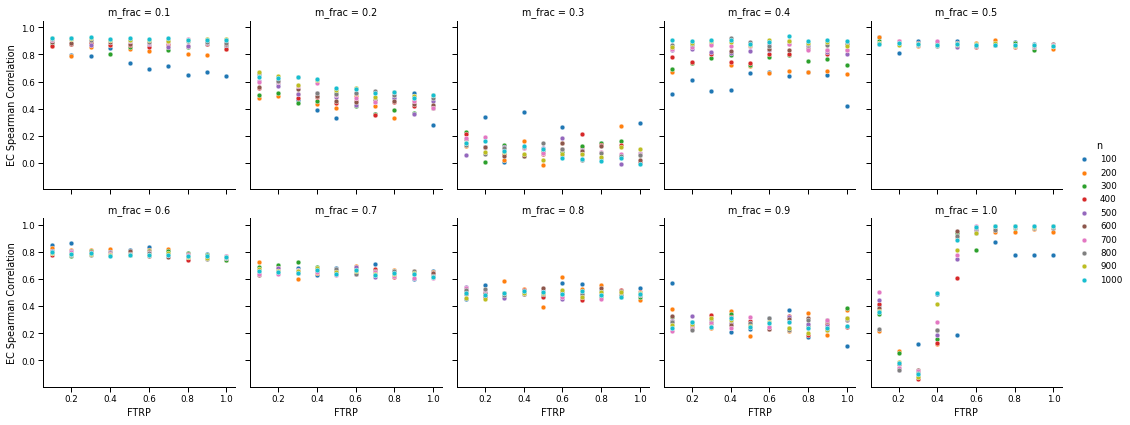

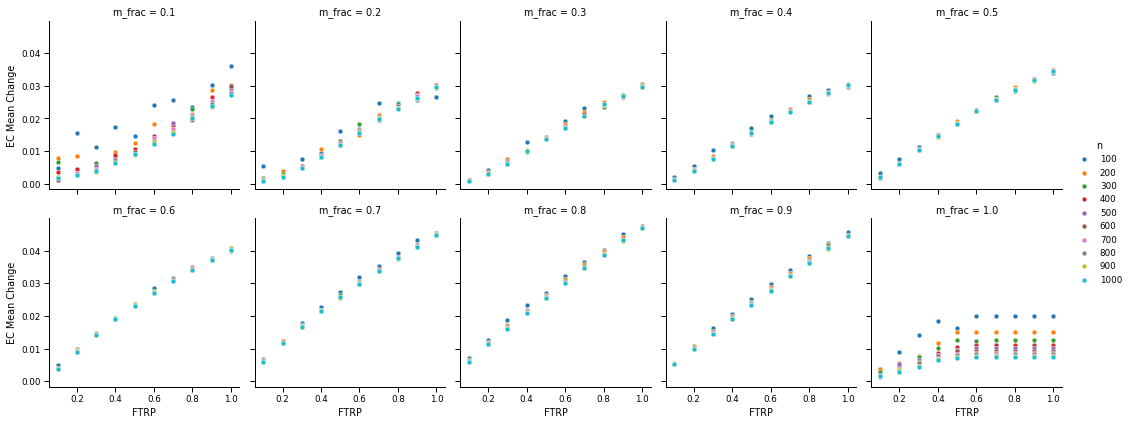

In [30]:
for metric in metrics:

    # Wasserstein distance
    g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
    g.map(sns.scatterplot, "r", f"{metric}_distance")
    g.set_axis_labels("FTRP", f"{metric.upper()} Wasserstein Distance")
    g.add_legend()
    plt.savefig(f'images/ba/{metric}_distance.pdf', dpi=300, transparent=False)

    # Spearman Rank correlation
    g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
    g.map(sns.scatterplot, "r", f"{metric}_correlation")
    g.set_axis_labels("FTRP", f"{metric.upper()} Spearman Correlation")
    g.add_legend()
    plt.savefig(f'images/ba/{metric}_correlation.pdf', dpi=300, transparent=False)

    # Mean change
    g = sns.FacetGrid(ba_df, col='m_frac', hue="n", col_wrap=5)
    g.map(sns.scatterplot, "r", f"{metric}_mean_change")
    g.set_axis_labels("FTRP", f"{metric.upper()} Mean Change")
    g.add_legend()
    plt.savefig(f'images/ba/{metric}_mean_change.pdf', dpi=300, transparent=False)
